<a href="https://colab.research.google.com/github/Meidyt/TugasClusteringDataAnalitik/blob/main/Updated_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **CLUSTERING** 
Merupakan salah satu dari unsupervised learning, dimana data yang ada nantinya akan dikelompokkan oleh komputer tanpa melalui pelatihan data terlebih dahulu. Lalu apakah yang membedakan clustering (klastirifikasi) dengan Classification (Klasifikasi)? Bukankah klasifikasi juga mengelompokkan? Ya, klasifikasi dan klastirifikasi sama-sama mengelompokkan, namun yang membedakan keduanya adalah ada tidaknya label. Pada klasifikasi, data yang dikelompokkan langsung masuk ke label yang sudah ditentukan, sedangkan pada clustering (klasterifikasi) ini, data hanya dikelompokkan berdasarkan data "terdekat". Terdapat beberapa metode dalam clustering, pada tugas kali ini saya menggunakan K-Means Clustering.

TI-41-10
Anggota Kelompok


*   Meidy
*   Grace
*   Waffa
*   Ghifari



# Import Libraries

Mengimport libraries yang dibutuhkan untuk melakukan klasterisasi data. 

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

Mengimport dataset dari repositori untuk melakukan klasterisasi data. Dataset telah diupload di repositori agar tidak perlu mengupload ulang dataset dari gawai yang berbeda.

In [ ]:
#import dataset
df_customer=pd.read_csv('https://raw.githubusercontent.com/Meidyt/TugasClusteringDataAnalitik/main/Dataset.csv')
df_customer

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0    C10001    40.900749  ...          0.000000      12
1    C10002  3202.467416  ...          0.222222      12
2    C10003  2495.148862  ...          0.000000      12
3    C10004  1666.670542  ...          0.000000      12
4    C10005   817.714335  ...          0.000000      12
..      ...          ...  ...               ...     ...
294  C10305    41.833264  ...          0.333333      12
295  C10306   635.090434  ...          1.000000      12
296  C10307  1521.168100  ...          0.000000      12
297  C10308  5547.092593  ...          0.000000      12
298  C10309  2503.107213  ...          0.000000      12

[299 rows x 18 columns]

Melihat jumlah dan jenis atribut-atribut yang terdapat dalam dataset.

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           299 non-null    object 
 1   BALANCE                           299 non-null    float64
 2   BALANCE_FREQUENCY                 299 non-null    float64
 3   PURCHASES                         299 non-null    float64
 4   ONEOFF_PURCHASES                  299 non-null    float64
 5   INSTALLMENTS_PURCHASES            299 non-null    float64
 6   CASH_ADVANCE                      299 non-null    float64
 7   PURCHASES_FREQUENCY               299 non-null    float64
 8   ONEOFF_PURCHASES_FREQUENCY        299 non-null    float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  299 non-null    float64
 10  CASH_ADVANCE_FREQUENCY            299 non-null    float64
 11  CASH_ADVANCE_TRX                  299 non-null    int64  
 12  PURCHASE

Terdapat missing data di atribut *minimum payment*, maka dari itu diambil keputusan untuk melakukan drop data kolom tersebut.

Drop Data

Proses melakukan drop atribut **Minimum Payment**

In [ ]:
df_customer.drop(['MINIMUM_PAYMENTS'], axis=1, inplace= True) 

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           299 non-null    object 
 1   BALANCE                           299 non-null    float64
 2   BALANCE_FREQUENCY                 299 non-null    float64
 3   PURCHASES                         299 non-null    float64
 4   ONEOFF_PURCHASES                  299 non-null    float64
 5   INSTALLMENTS_PURCHASES            299 non-null    float64
 6   CASH_ADVANCE                      299 non-null    float64
 7   PURCHASES_FREQUENCY               299 non-null    float64
 8   ONEOFF_PURCHASES_FREQUENCY        299 non-null    float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  299 non-null    float64
 10  CASH_ADVANCE_FREQUENCY            299 non-null    float64
 11  CASH_ADVANCE_TRX                  299 non-null    int64  
 12  PURCHASE

Dari data di atas, dapat diketahui bahwa atribut **Minimum Payment** telah dihapus.

In [ ]:
df_customer.describe().transpose()

count         mean  ...          75%          max
BALANCE                           299.0  2527.677890  ...  3647.862053  19043.13856
BALANCE_FREQUENCY                 299.0     0.892663  ...     1.000000      1.00000
PURCHASES                         299.0  1594.801940  ...  1674.695000  32539.78000
ONEOFF_PURCHASES                  299.0   953.960769  ...   991.905000  26547.43000
INSTALLMENTS_PURCHASES            299.0   640.841171  ...   738.975000  12560.85000
CASH_ADVANCE                      299.0  1176.619803  ...  1011.004112  27296.48576
PURCHASES_FREQUENCY               299.0     0.524717  ...     1.000000      1.00000
ONEOFF_PURCHASES_FREQUENCY        299.0     0.259203  ...     0.416667      1.00000
PURCHASES_INSTALLMENTS_FREQUENCY  299.0     0.382685  ...     0.833333      1.00000
CASH_ADVANCE_FREQUENCY            299.0     0.130808  ...     0.166667      0.87500
CASH_ADVANCE_TRX                  299.0     3.016722  ...     3.000000     40.00000
PURCHASES_TRX                     299.0    19.709030  ...    21.000000    217.00000
CREDIT_LIMIT                      299.0  6403.010033  ...  9000.000000  23000.00000
PAYMENTS                          299.0  2389.859691  ...  2558.838161  28232.69446
PRC_FULL_PAYMENT                  299.0     0.102849  ...     0.083333      1.00000
TENURE                            299.0    11.755853  ...    12.000000     12.00000

[16 rows x 8 columns]

Melakukan drop pada atribut **Customer ID** karena atribut tersebut merupakan atribut khusus sehingga kurang cocok untuk dilakukan klasterisasi.

In [ ]:
data = df_customer.copy()
data = df_customer.drop(['CUST_ID'], axis=1)
data.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 16 columns]

Melakukan pengecekan jumlah kolom pada saat ini setelah dilakukan drop kolom beberapa kali.

In [ ]:
list_column = data.columns.to_list()
len(list_column)

16

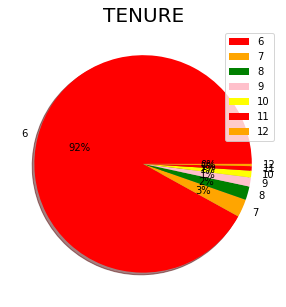

In [ ]:
labels = ['6', '7', '8', '9','10', '11', '12']
size = df_customer['TENURE'].value_counts()
colors = ['red', 'orange', 'green', 'pink', 'yellow']

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.f%%')
plt.title('TENURE', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

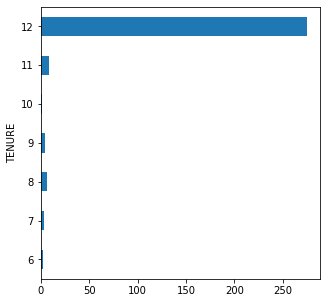

In [ ]:
data.groupby(['TENURE']).size().plot(kind='barh')



Melakukan visualisasi data untuk melihat persebaran data pada tiap atribut.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

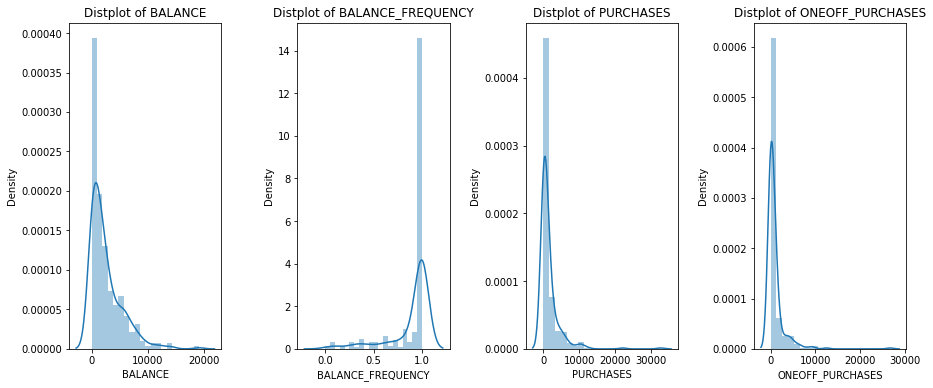

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

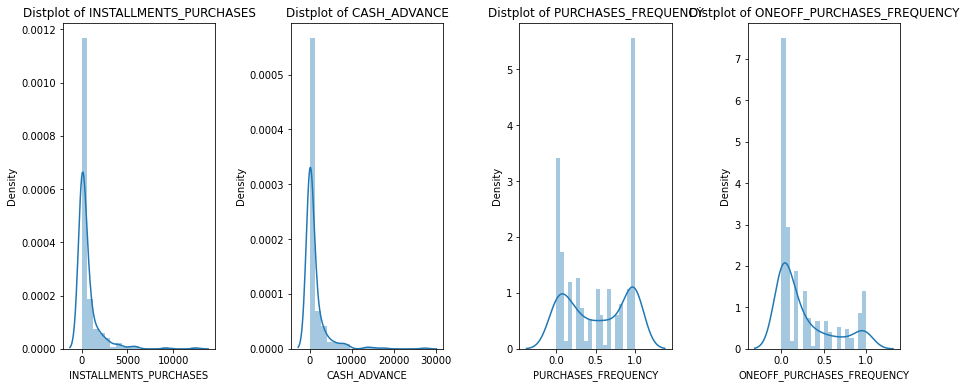

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

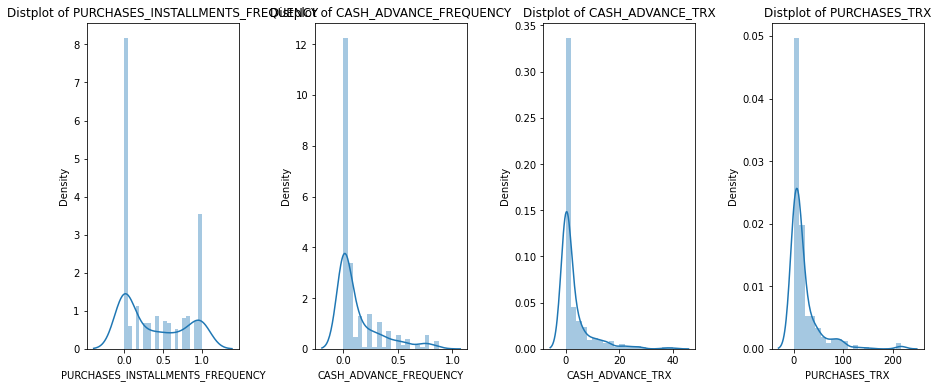

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

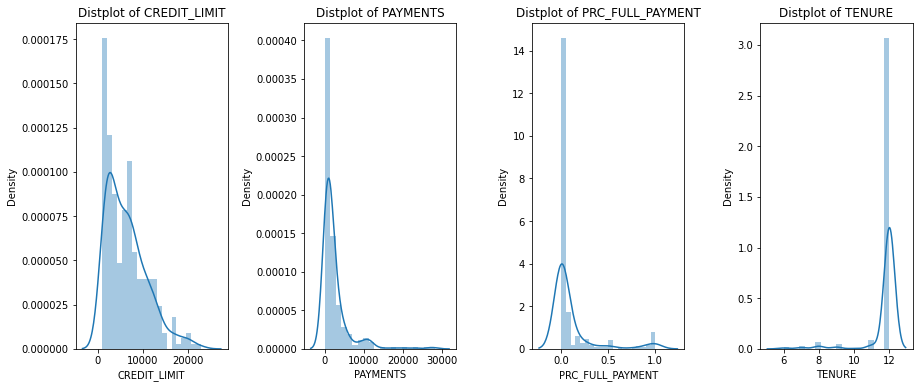

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT','TENURE']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_customer[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


# PCA (Principal Component Analysis)
Pada dasarnya, PCA digunakan ketika dataset terdiri atas banyak kolom dan kita ingin mengurangi jumlah kolom tanpa mengurangi jumlah informasi yang bisa kita peroleh. PCA menghitung Singular Value Decomposition, menyimpan beberapa kolom dari salah satu matriks tersebut serta memvisualisasikan data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
data_new = data.to_numpy
data_new = scaler.fit_transform(data)
print(data_new)

[[-0.86750927 -0.331633   -0.49329233 ... -0.57982798 -0.41868596
   0.25542594]
 [ 0.23539953  0.07314758 -0.52467823 ...  0.45398511  0.48595056
   0.25542594]
 [-0.01134771  0.47792816 -0.27031093 ... -0.46845924 -0.41868596
   0.25542594]
 ...
 [-0.35111975  0.47792816 -0.4437526  ... -0.03400866 -0.41868596
   0.25542594]
 [ 1.05331925  0.47792816 -0.52467823 ... -0.15998296 -0.41868596
   0.25542594]
 [-0.00857145  0.47792816 -0.28323047 ... -0.20395904 -0.41868596
   0.25542594]]


In [ ]:
covar_matrix = PCA(n_components = len(data.columns))
covar_matrix.fit(data_new)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

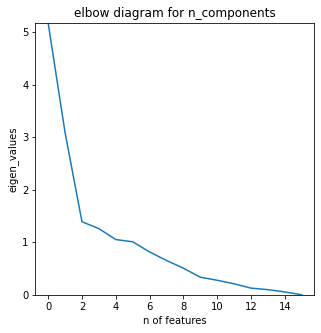

In [ ]:
plt.ylabel("eigen_values")
plt.xlabel("n of features")
plt.title("elbow diagram for n_components")
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context("seaborn-whitegrid")
plt.plot(covar_matrix.explained_variance_)
plt.show()

Dari elbow diagram di atas, dapat disimpulkan bahwa jumlah n yang akan digunakan adalah 2.

In [ ]:
PCA_seg = PCA(n_components=2)
segmentation = PCA_seg.fit_transform(data_new)
print(segmentation.shape)

(299, 2)


In [ ]:
a = np.ascontiguousarray(segmentation)
a

array([[-2.18416133e+00, -6.86010427e-01],
       [-1.11777738e+00,  2.00593712e+00],
       [ 1.90569945e-01, -9.29797316e-01],
       [-1.49842541e+00, -1.63532799e-01],
       [-2.04526128e+00, -4.32727382e-01],
       [-5.55509534e-01, -9.57466091e-01],
       [ 4.15980924e+00, -2.37184807e+00],
       [-3.63457189e-01, -1.25818465e+00],
       [-1.09830287e+00, -5.87027942e-01],
       [-1.35821946e+00, -6.11636151e-01],
       [-2.42329420e-01, -1.36535168e+00],
       [-1.39673883e+00, -7.60905317e-01],
       [ 8.27376724e-01, -1.69817172e+00],
       [ 4.77940197e-01, -1.23326925e+00],
       [-1.88975856e+00,  2.35721887e-01],
       [ 3.39567254e-01,  9.54135366e-01],
       [-2.16410560e+00,  1.39910270e+00],
       [-1.69665679e+00, -1.25729480e+00],
       [-2.17158322e-01, -6.09376793e-01],
       [-1.23043466e-01, -1.01777136e+00],
       [-1.01030522e+00, -9.12543457e-01],
       [ 4.13352982e+00, -4.07914354e-02],
       [-4.04546294e-01, -1.58461949e+00],
       [ 2.

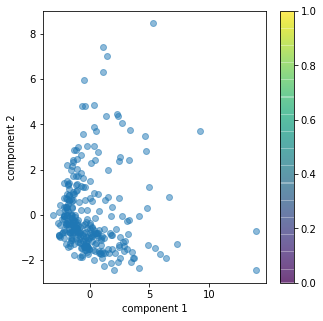

In [ ]:
plt.scatter(segmentation[:, 0], segmentation[:, 1], alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# KNN

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for i in range(1,len(data.columns)+1):
    kmeans = KMeans(n_clusters=i, init= "k-means++").fit(data)
    inertia.append(kmeans.inertia_)
print(inertia)

[19991579210.983505, 13511940020.03815, 10477422489.84346, 8749369836.626413, 7454823376.043542, 6342363547.054832, 5672340845.969017, 5171522951.048838, 4745890347.283389, 4337696845.716685, 4157245533.9828596, 3722123290.597273, 3536091313.005699, 3218775334.2819023, 3109626286.4278193, 2880490362.581191]


Text(0.5, 1.0, 'inertia of n of clusters')

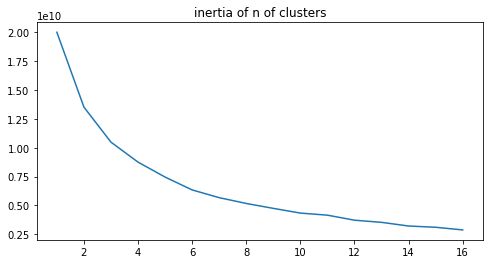

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,len(data.columns)+1)),y = inertia, ax=ax)
ax.set_xlabels = "n of clusters"
ax.set_ylabels = "inertia"
ax.set_title("inertia of n of clusters")

In [ ]:
def hitung_selisih(inertia):
    selisih = []
    for i in range(len(inertia)+1):
        if i == 15:
            break
        selisih_inertia = inertia[i+1]-inertia[i]
        selisih.append(selisih_inertia)
    
    min_selisih_inertia = min(selisih)
    index = selisih.index(min_selisih_inertia) + 2
    
    return min_selisih_inertia,index,selisih

min_selisih_inertia,index,selisih = hitung_selisih(inertia)
print("minimum selisih inertia = {} \n \nselisih inertia = {} \n \nindex={}".format(min_selisih_inertia,selisih,index))

minimum selisih inertia = -6479639190.945354 
 
selisih inertia = [-6479639190.945354, -3034517530.1946907, -1728052653.2170467, -1294546460.5828714, -1112459828.9887094, -670022701.0858154, -500817894.92017937, -425632603.7654486, -408193501.5667038, -180451311.73382568, -435122243.38558674, -186031977.59157372, -317315978.72379684, -109149047.85408306, -229135923.8466282] 
 
index=2


Perbedaan terbesar didapat dari inersia 1 dan inersia 2, sehingga kita akan mengambil 2 klaster.


In [ ]:
segmentation = KMeans(n_clusters=2).fit(data)
after_segmentation = data.copy()
after_segmentation['labels']=segmentation.labels_
after_segmentation.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  labels
0    40.900749           0.818182      95.40  ...          0.000000      12       1
1  3202.467416           0.909091       0.00  ...          0.222222      12       1
2  2495.148862           1.000000     773.17  ...          0.000000      12       1
3  1666.670542           0.636364    1499.00  ...          0.000000      12       1
4   817.714335           1.000000      16.00  ...          0.000000      12       1

[5 rows x 17 columns]

2 klaster tadi didefinisikan menjadi klaster 0 dan klaster 1. Grafik dibawah menunjukkan klasterisasi 2 atribut pada dataset ke dalam klaster 0 maupun klaster 1 sesuai dengan persebaran datanya.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

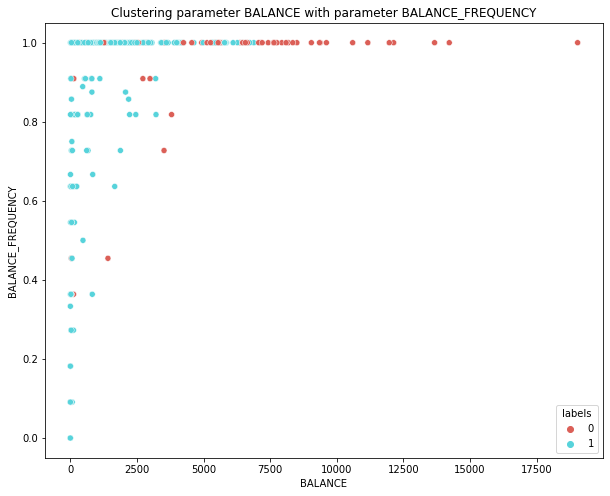

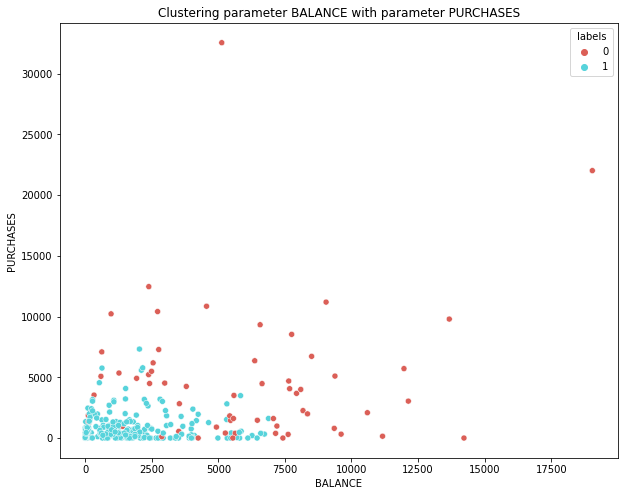

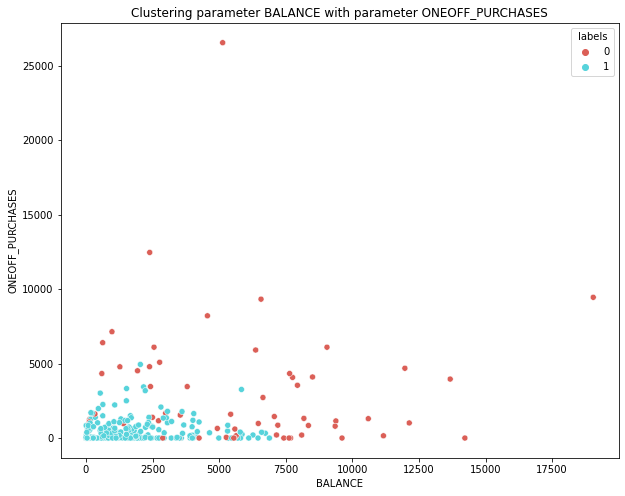

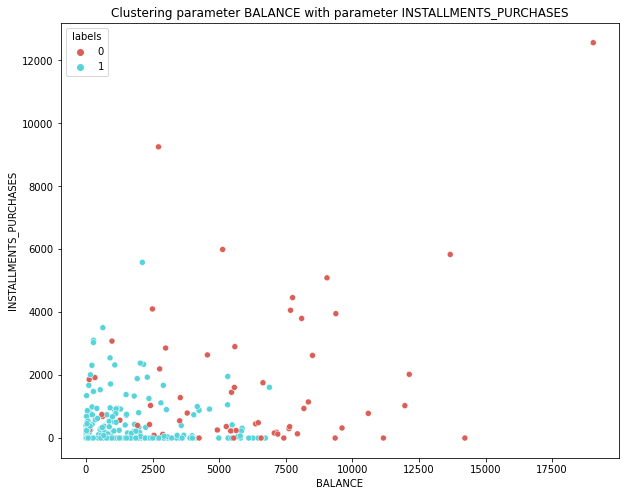

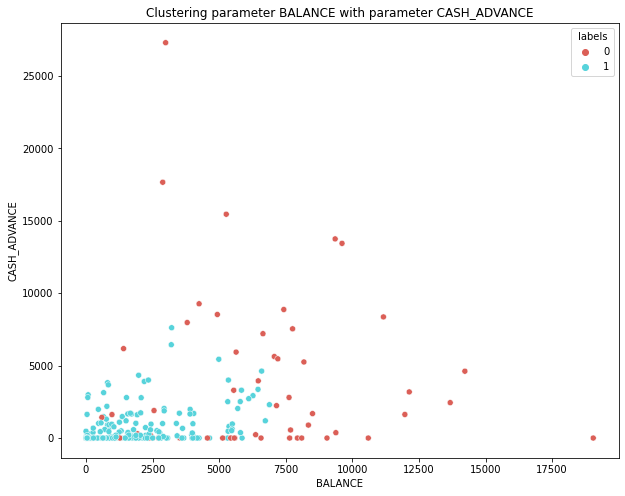

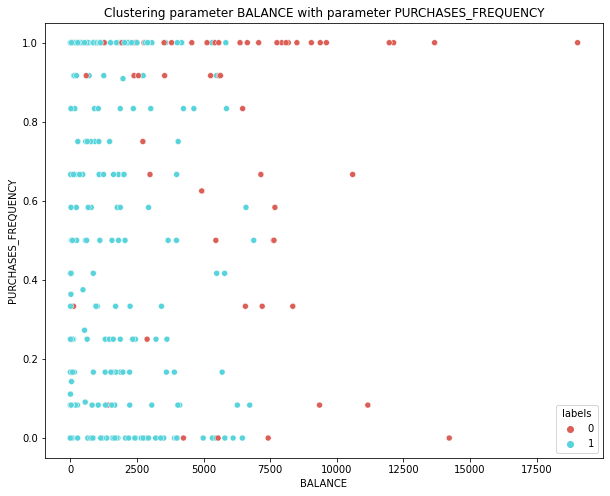

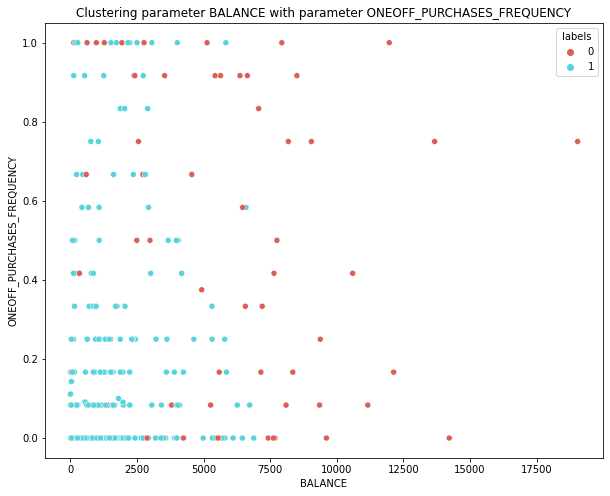

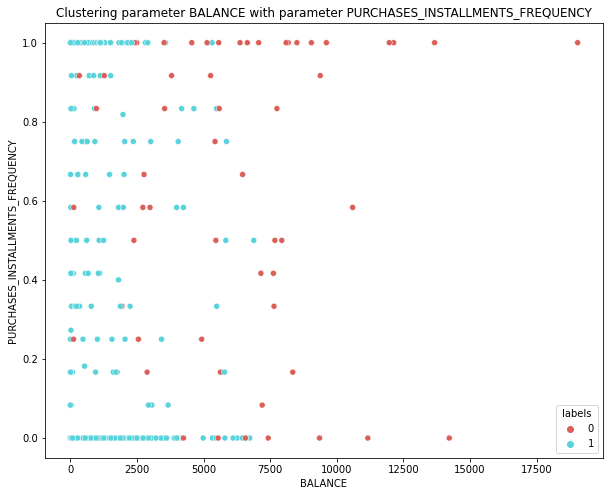

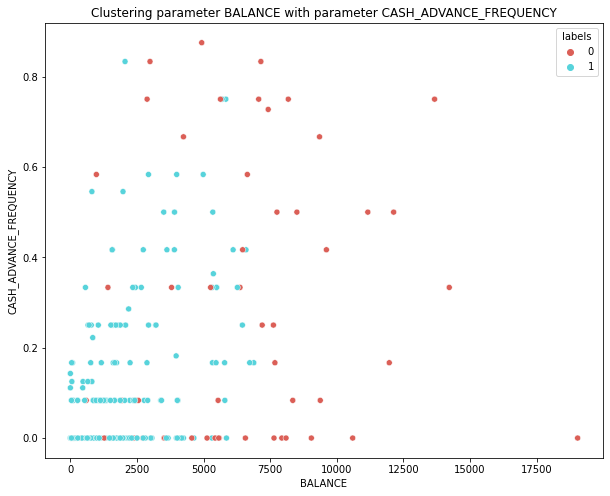

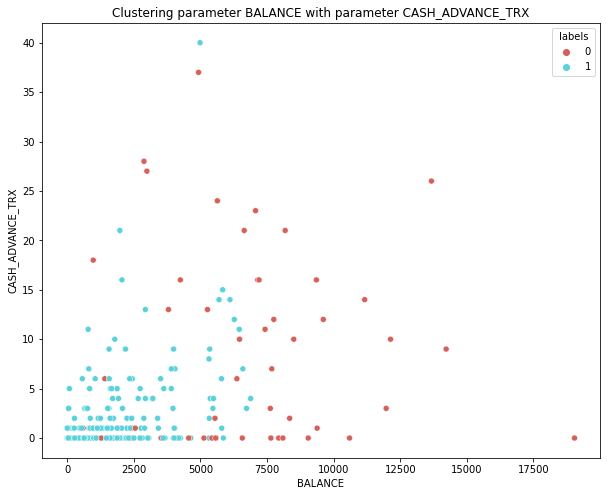

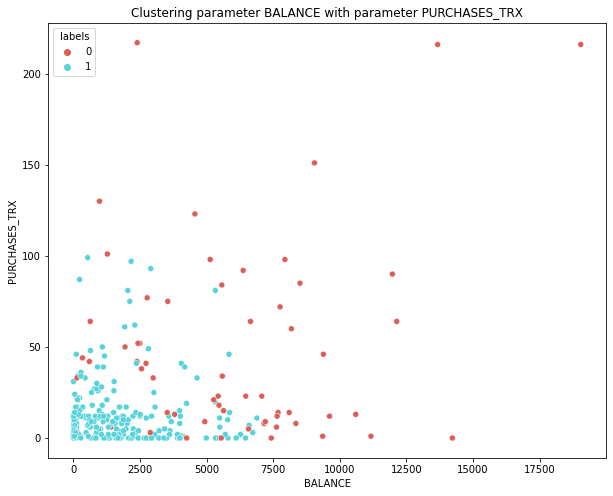

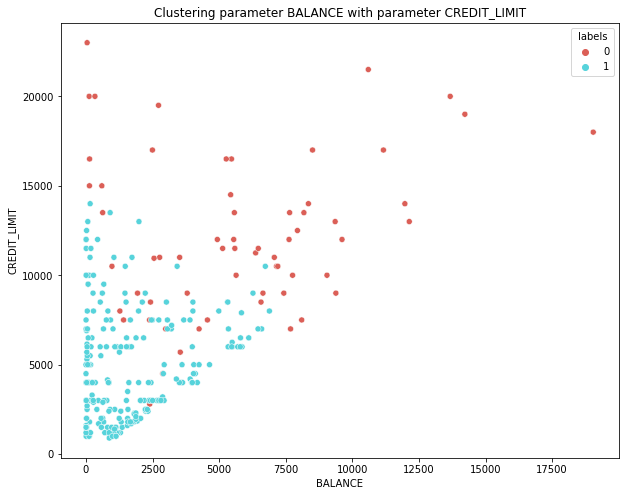

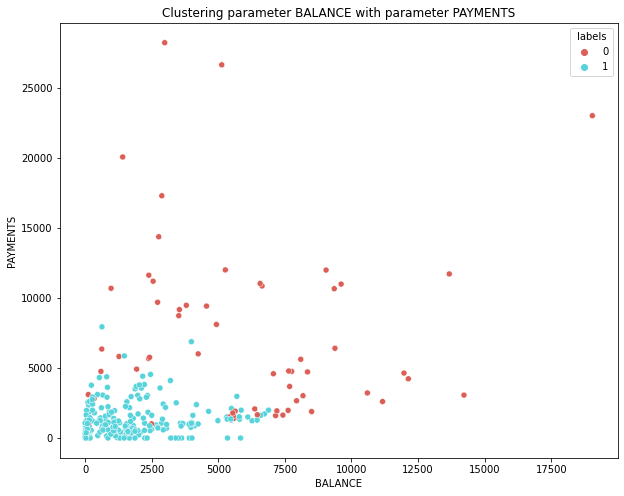

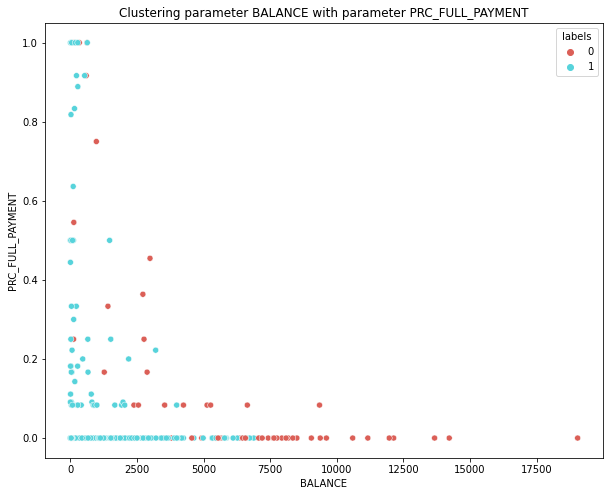

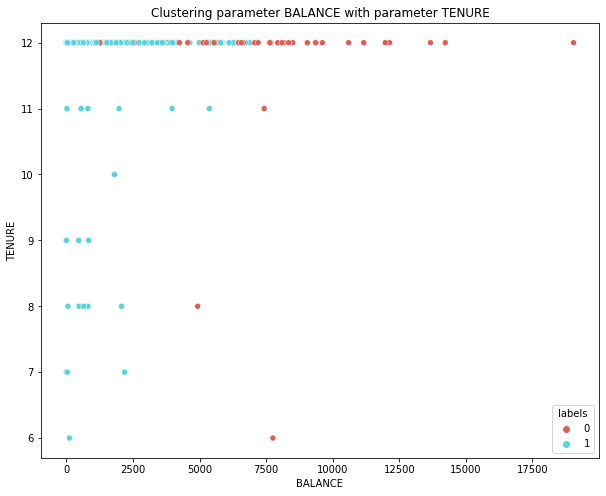

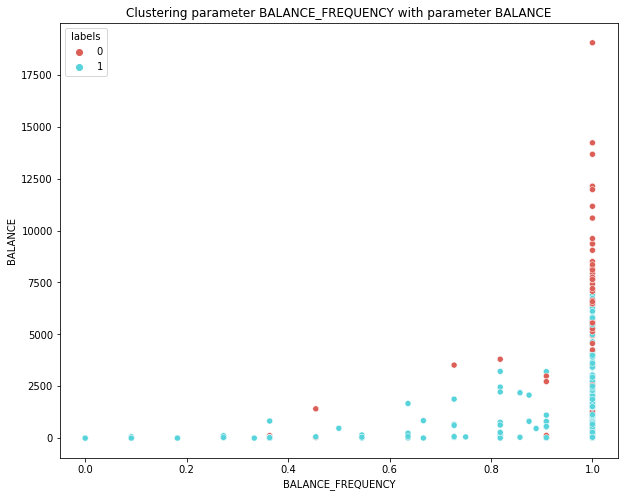

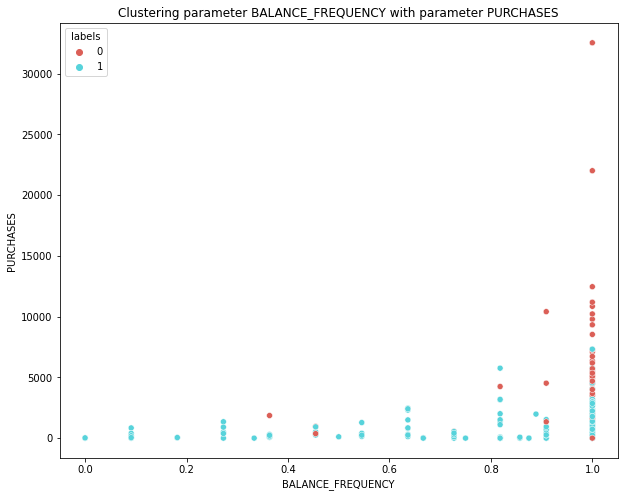

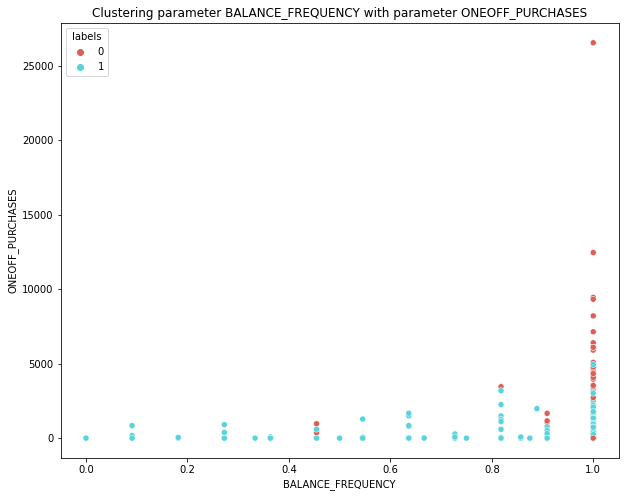

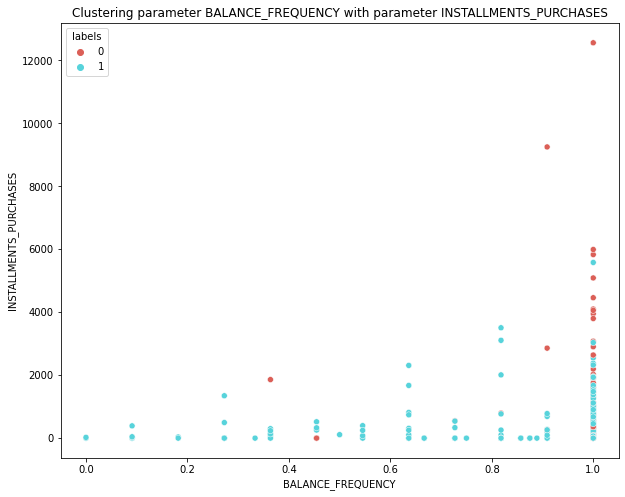

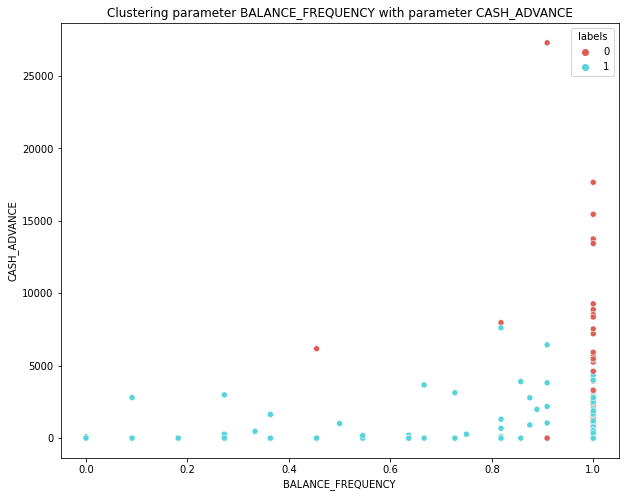

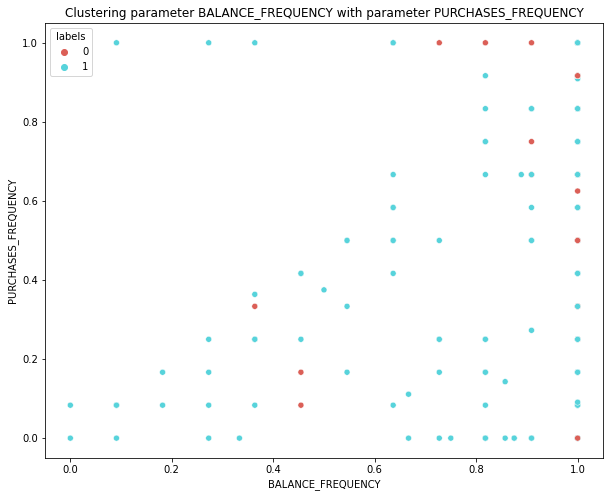

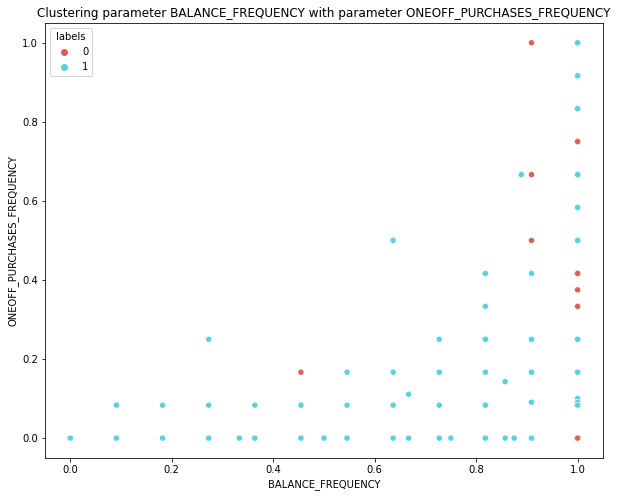

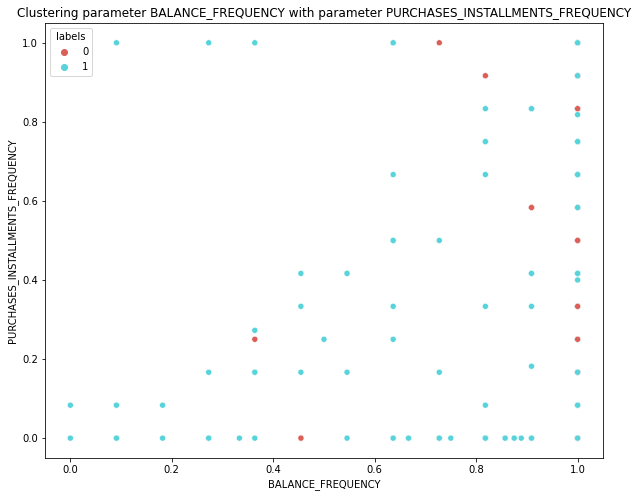

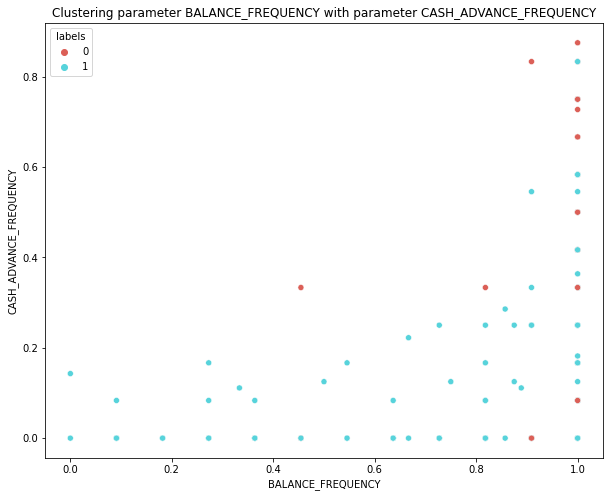

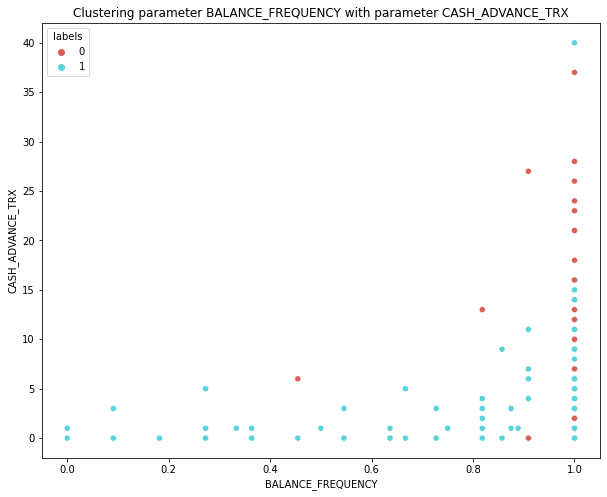

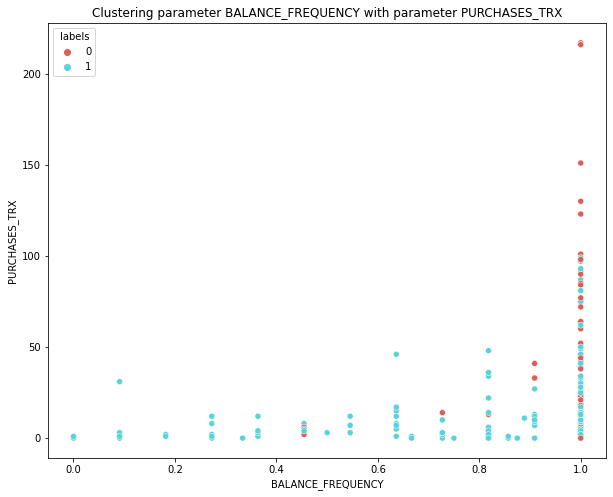

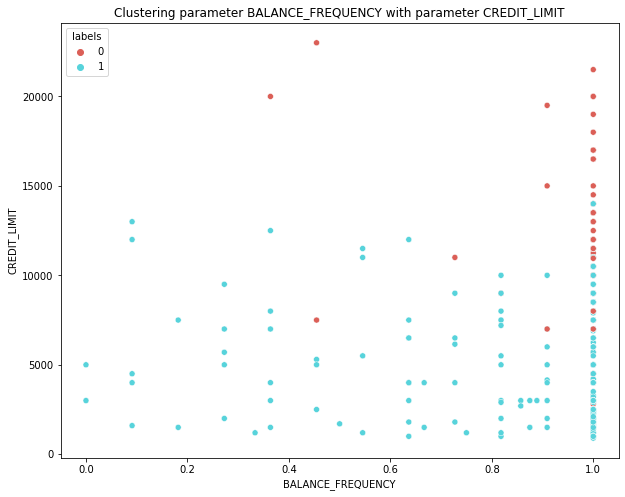

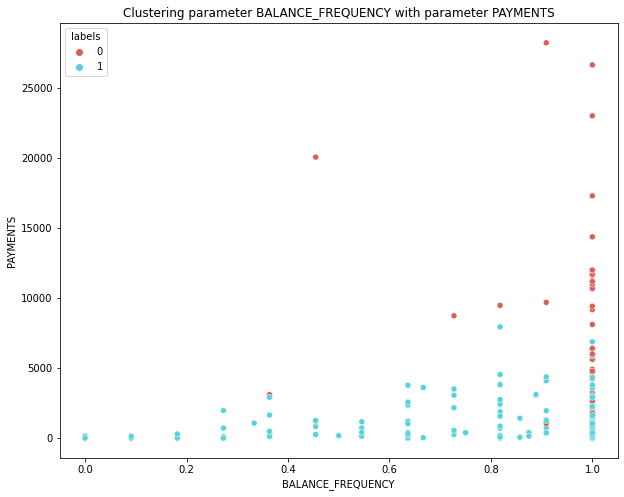

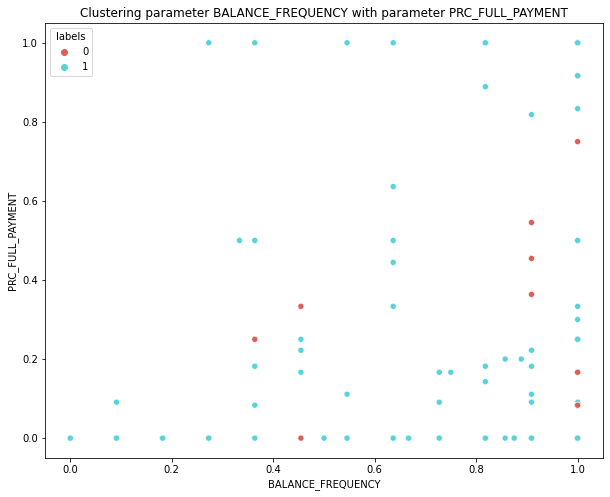

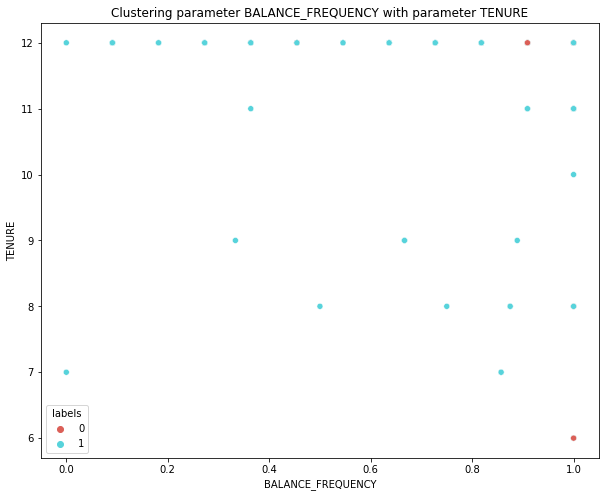

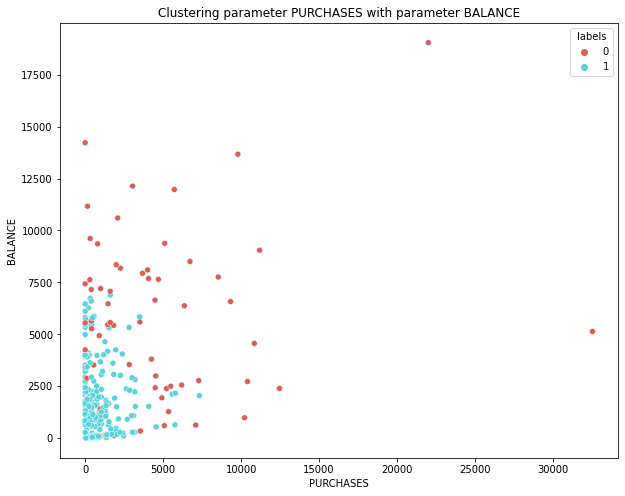

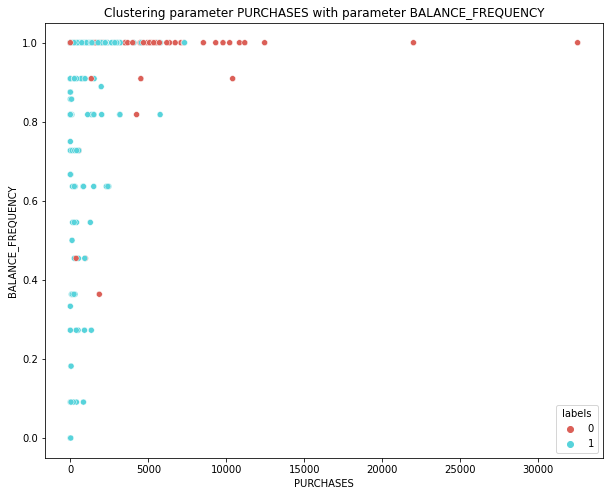

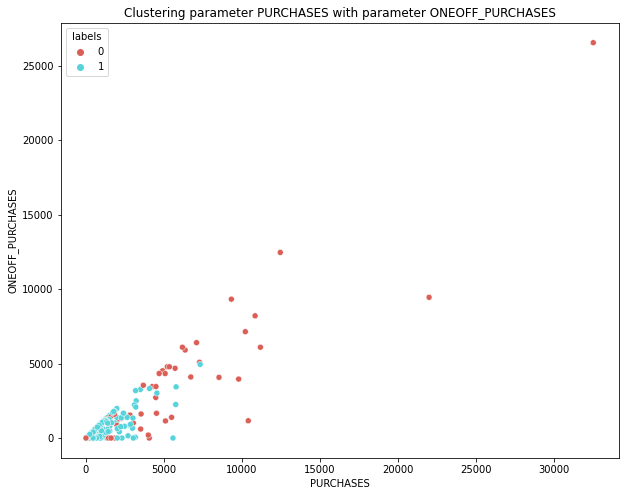

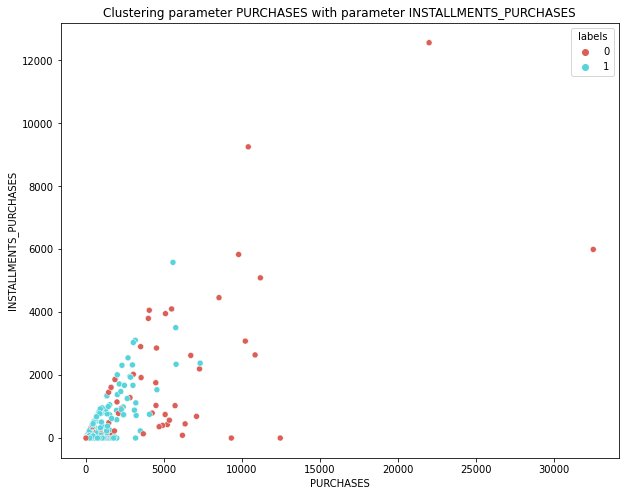

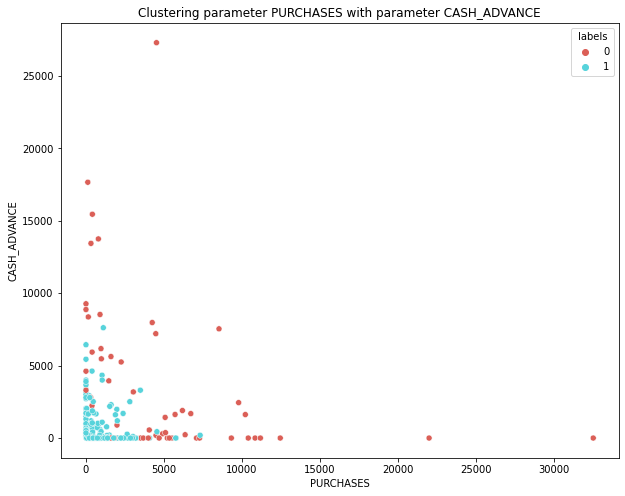

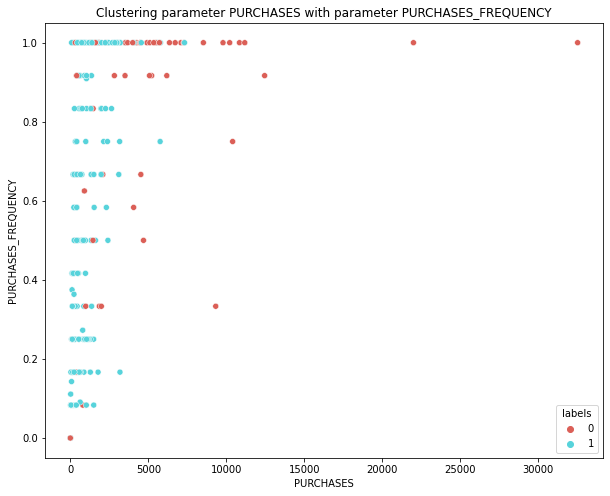

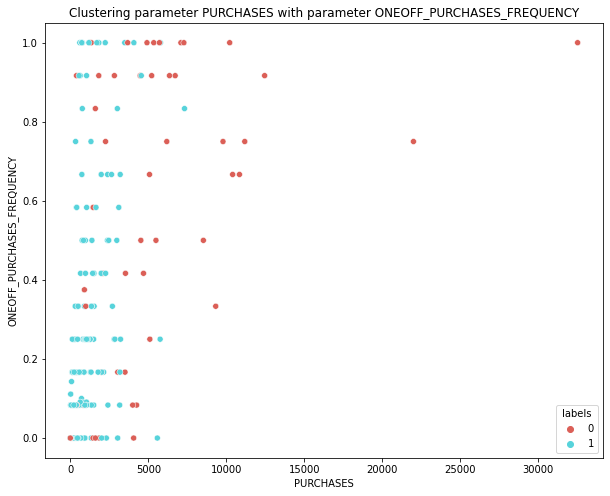

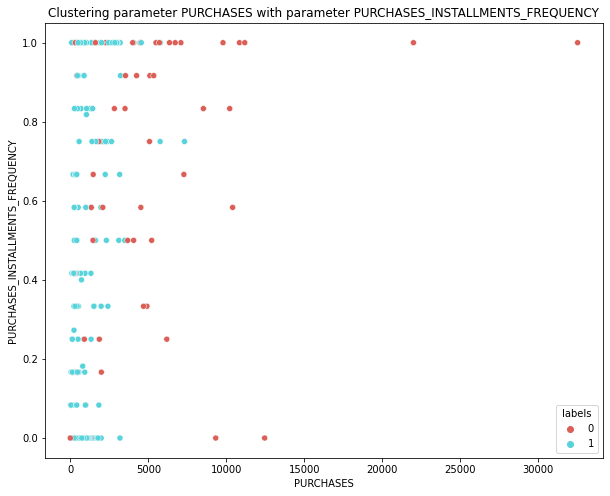

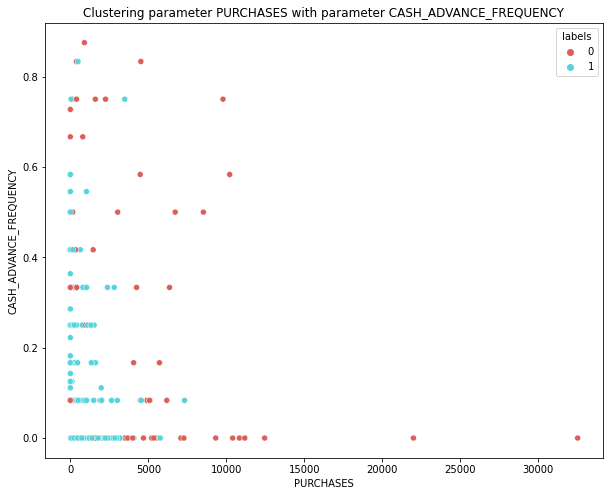

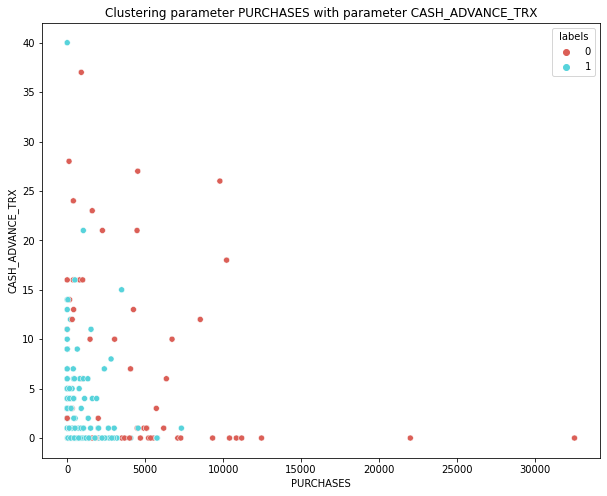

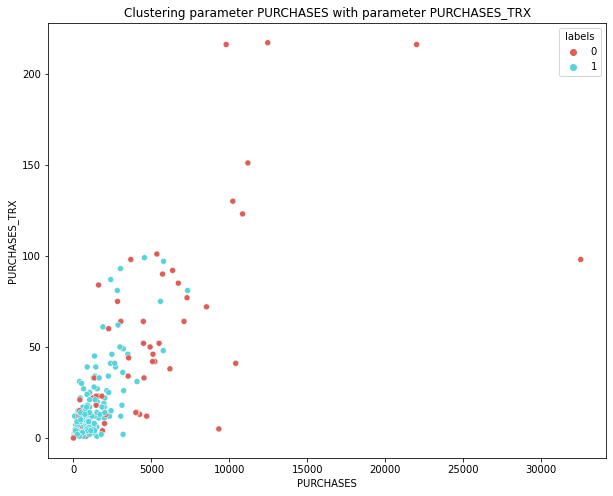

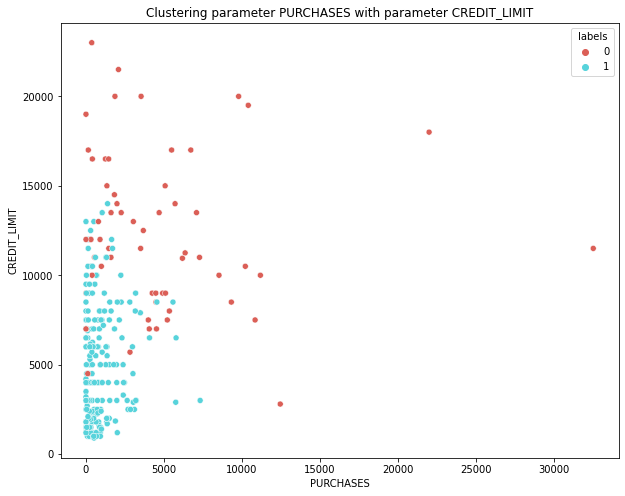

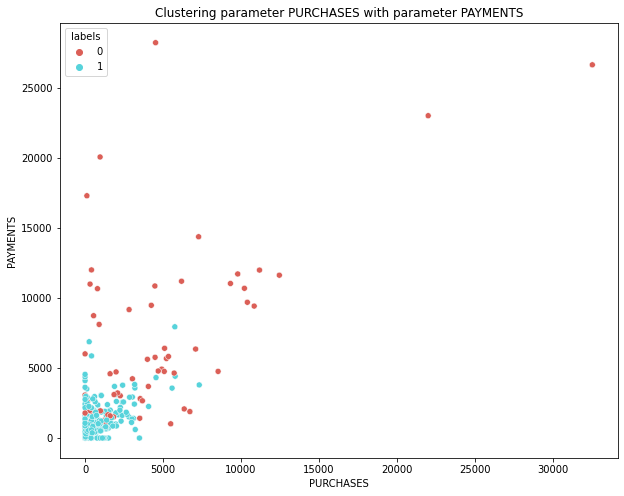

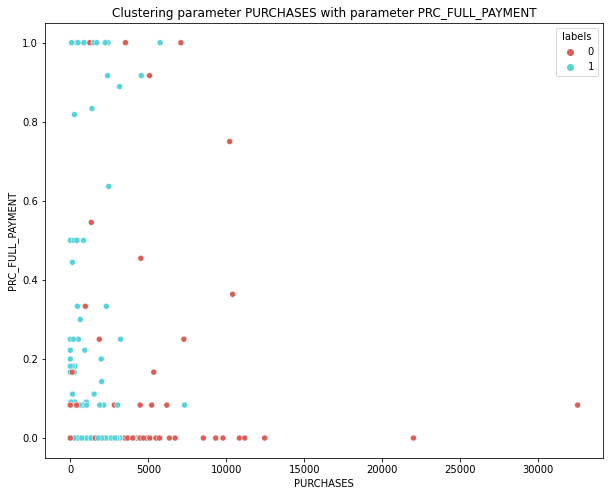

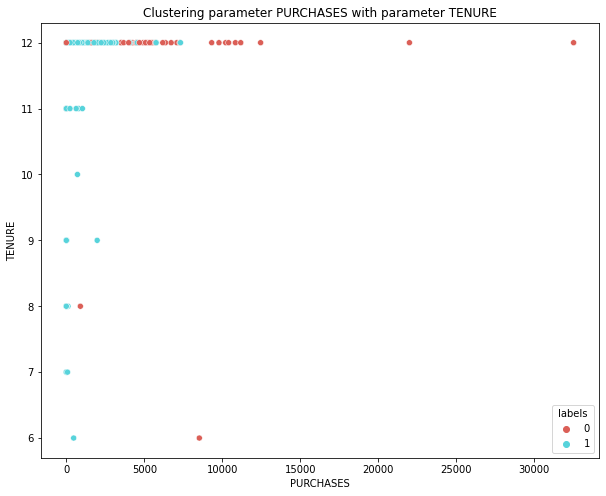

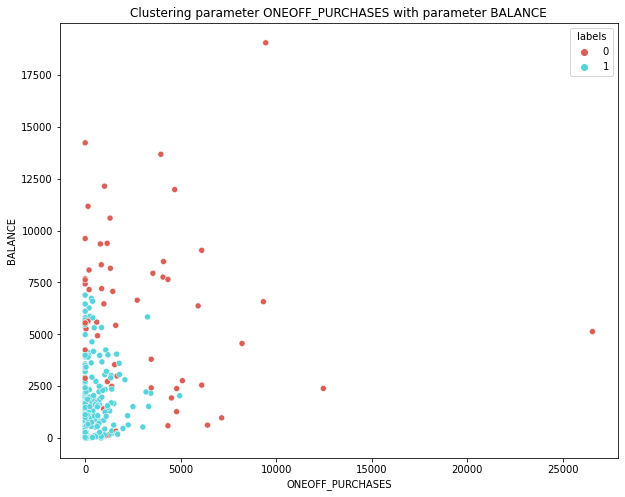

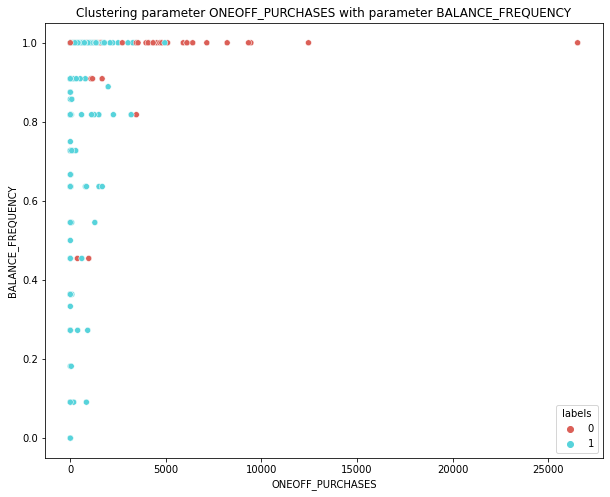

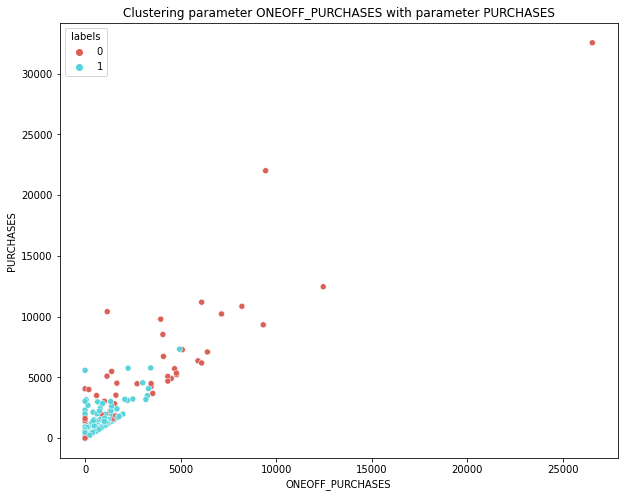

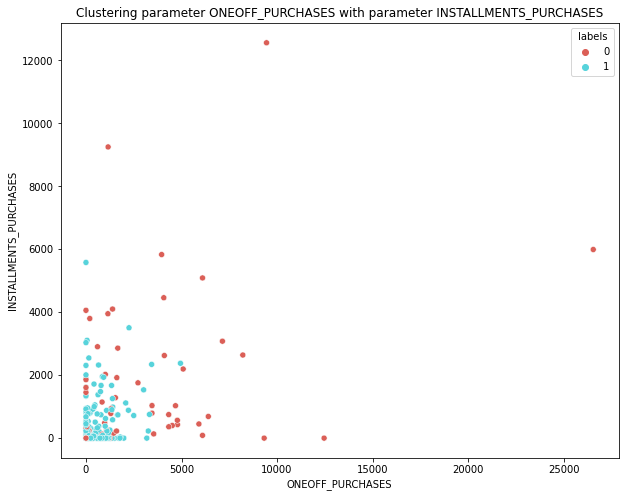

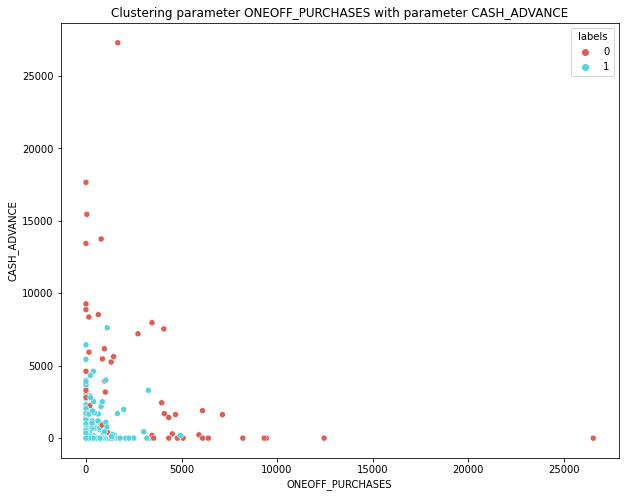

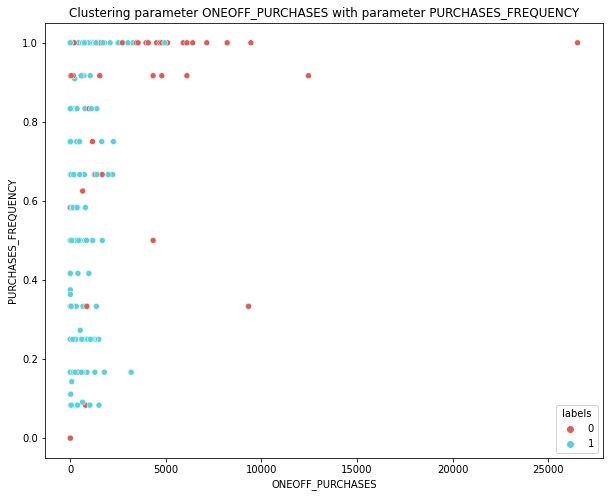

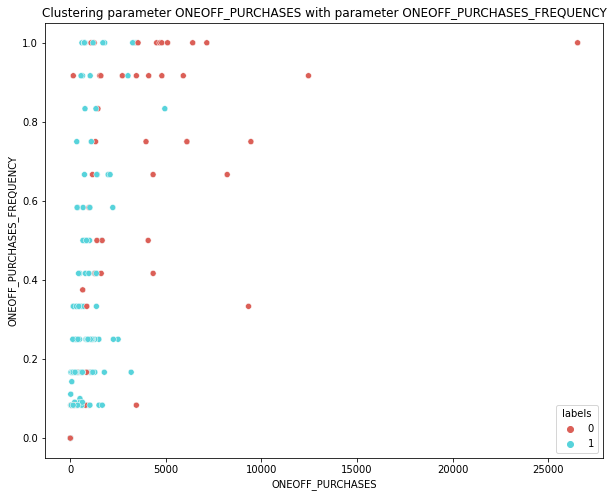

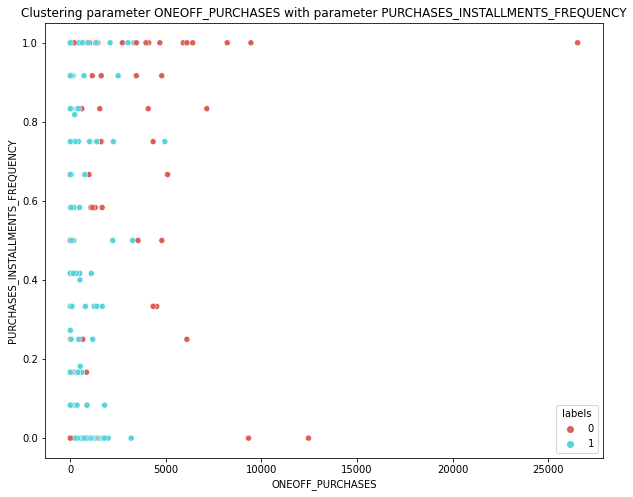

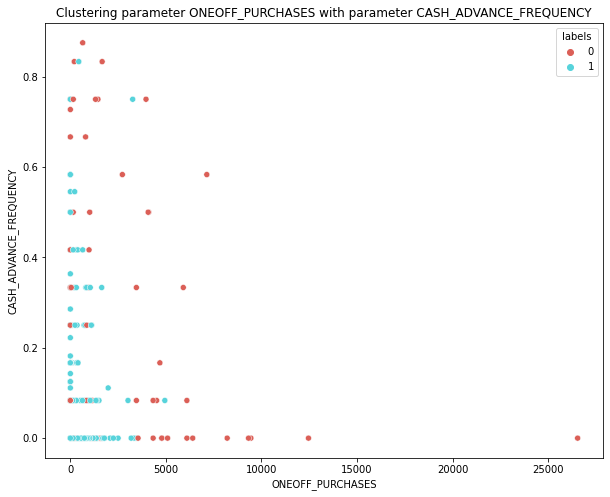

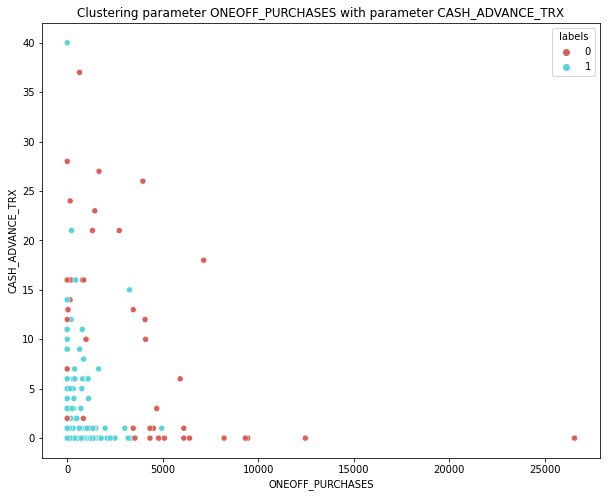

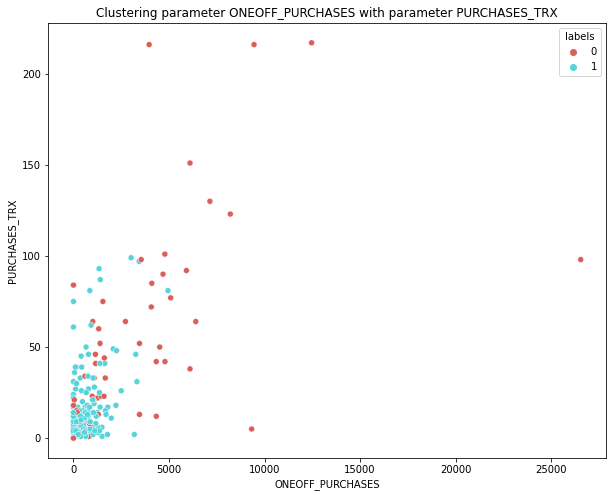

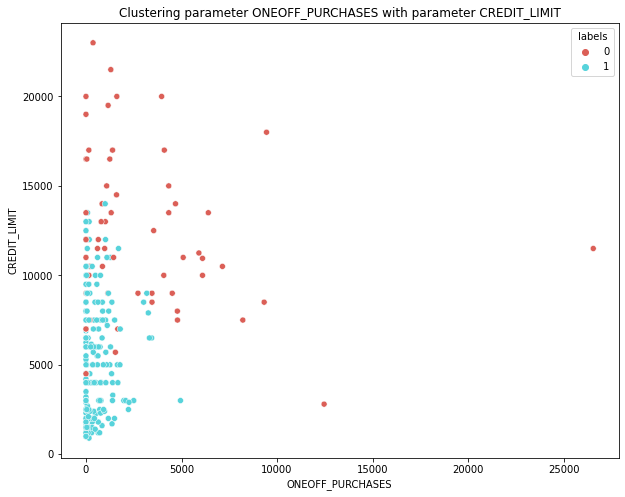

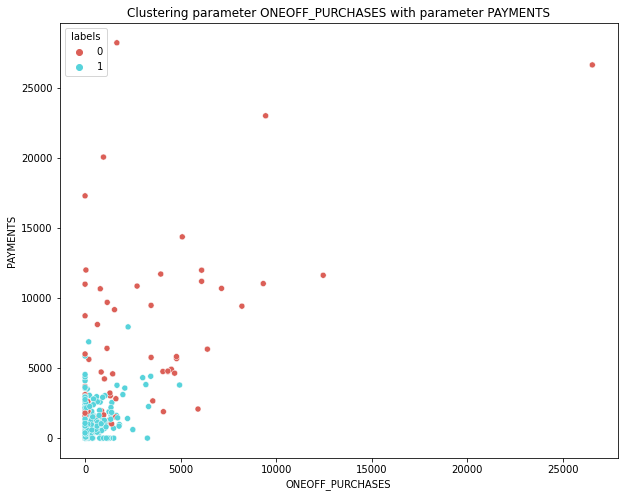

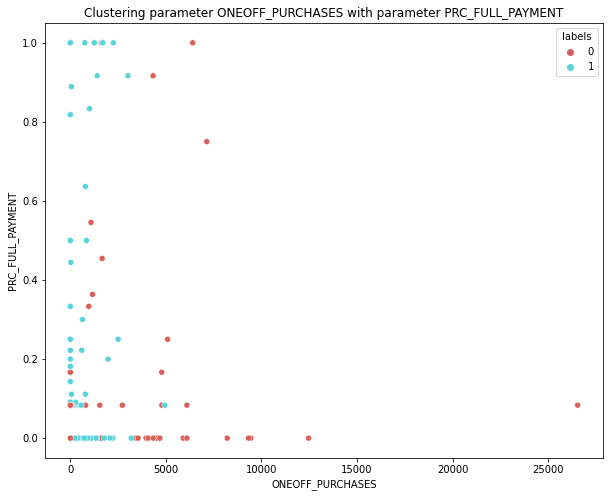

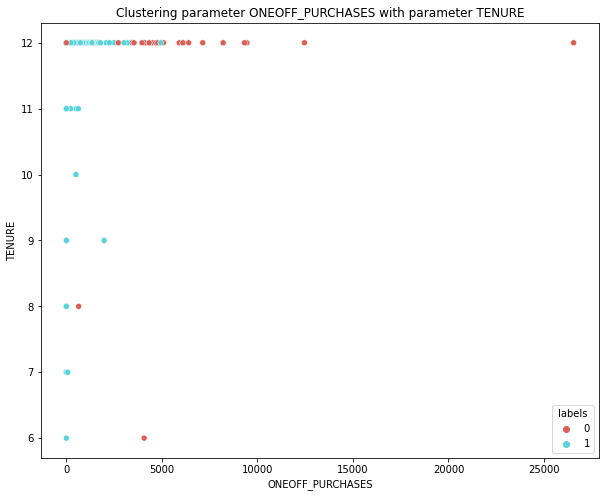

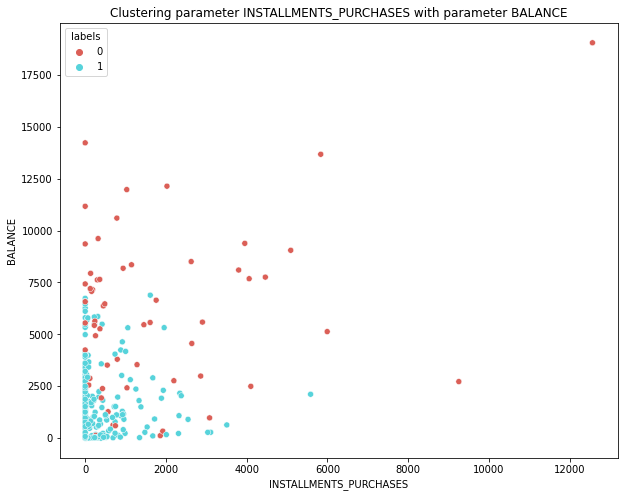

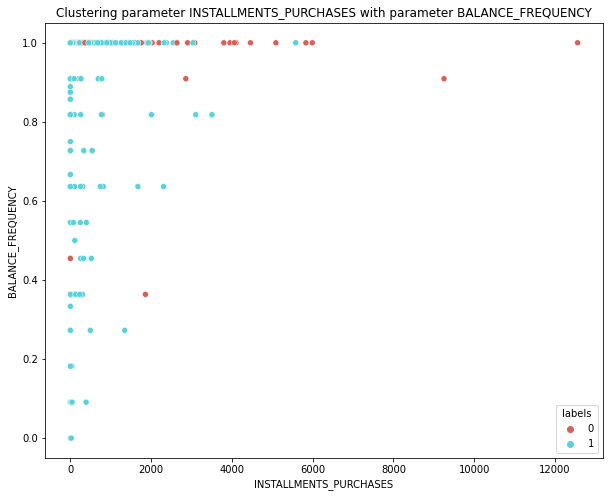

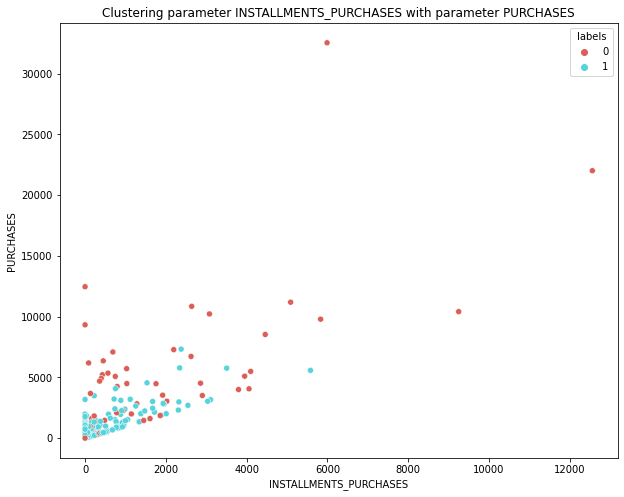

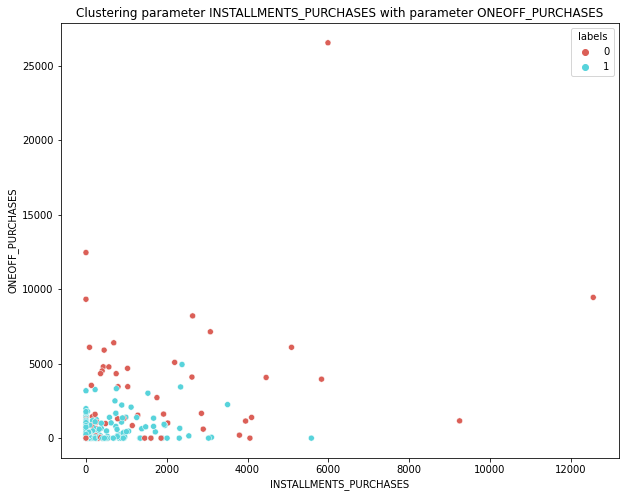

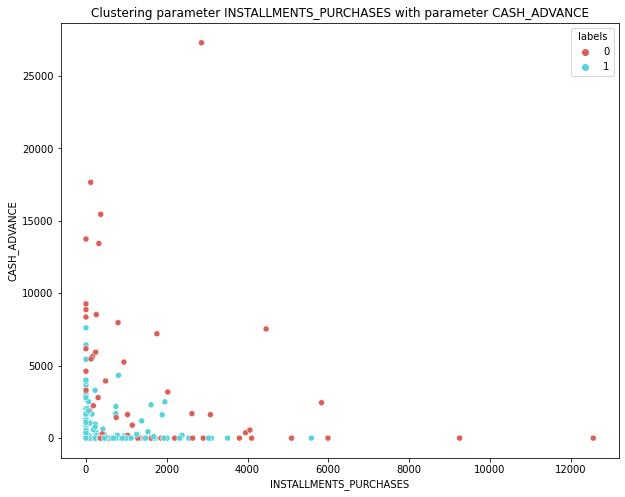

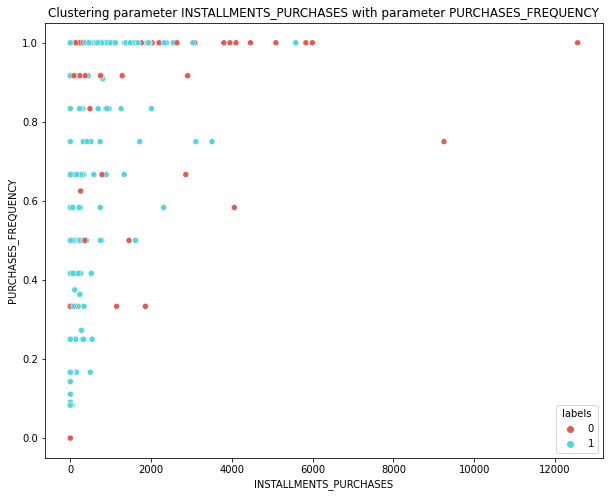

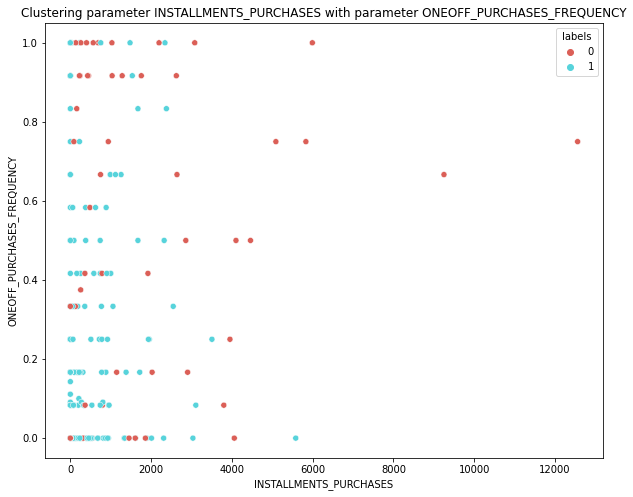

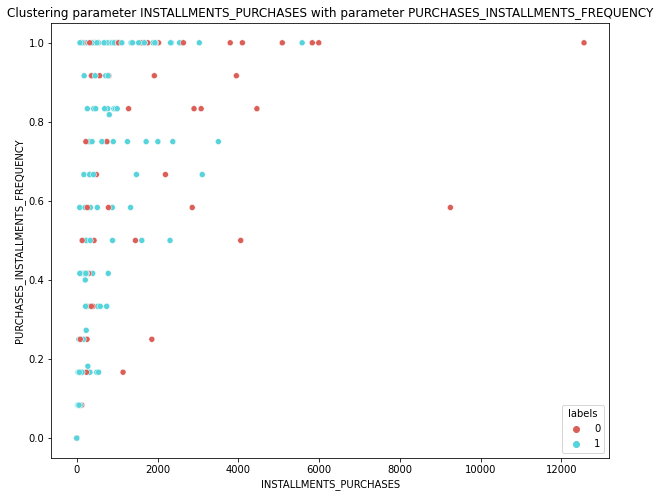

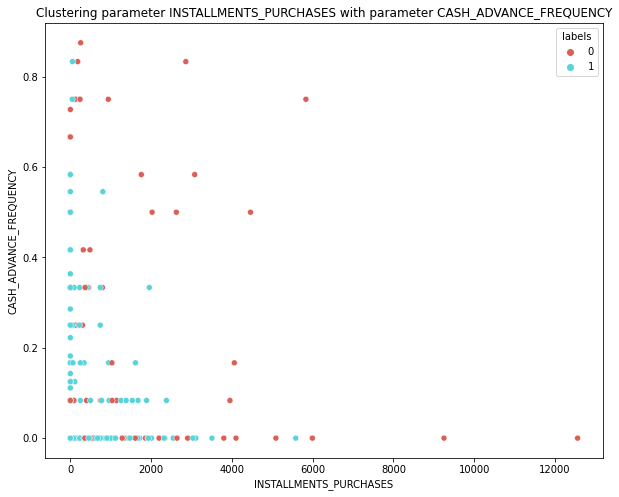

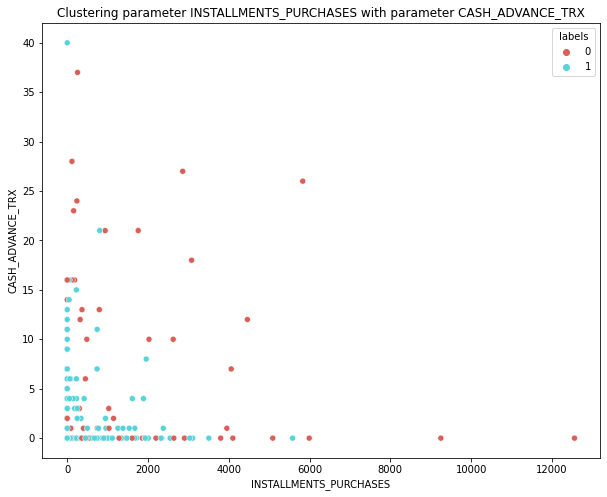

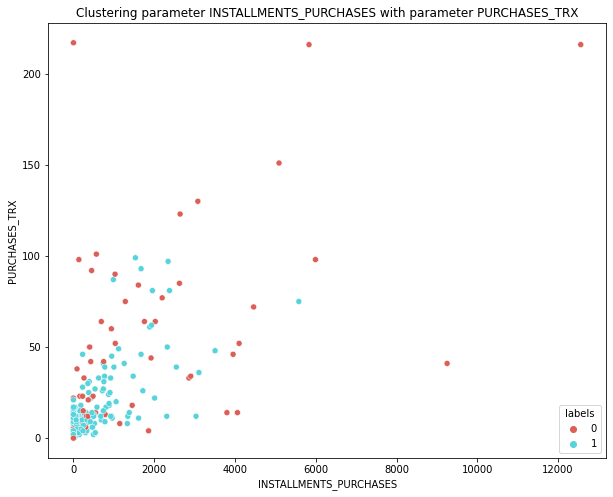

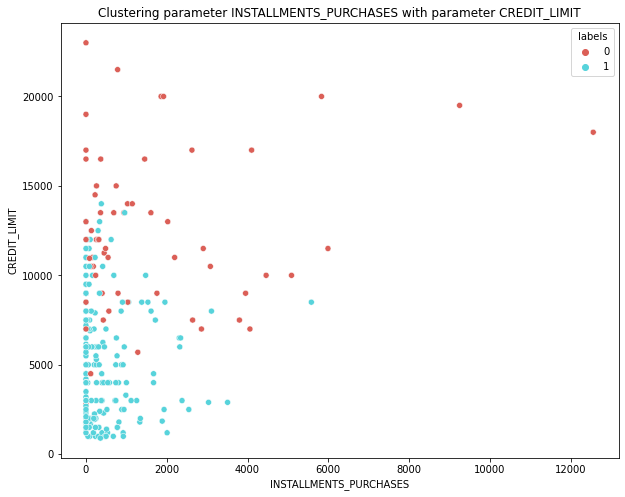

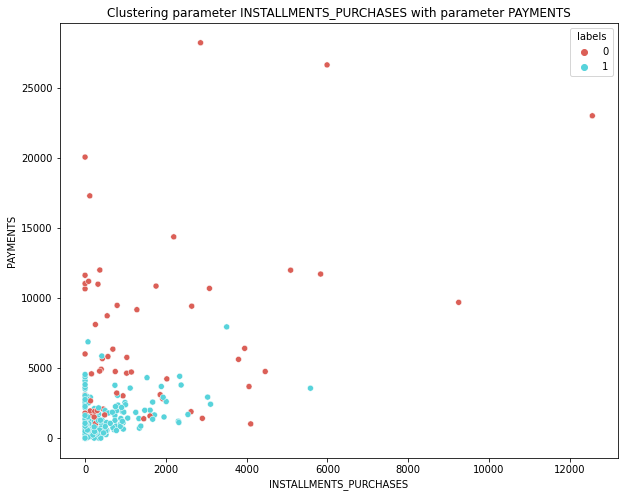

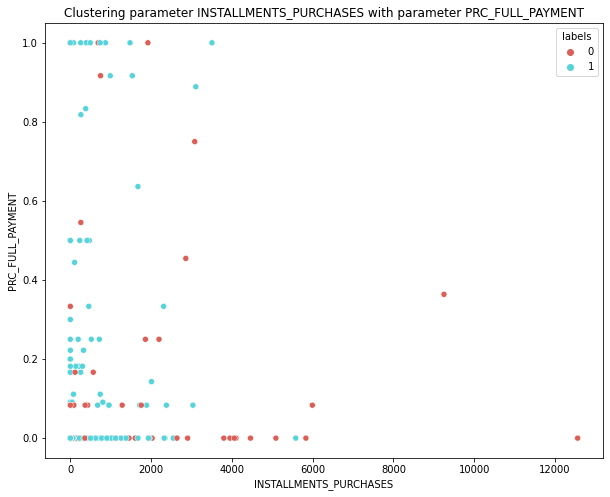

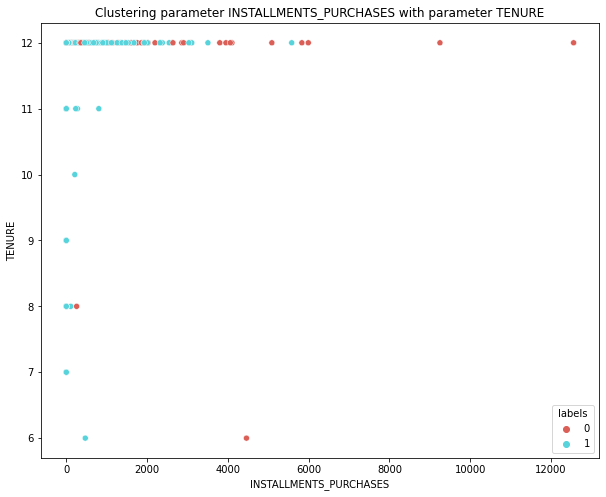

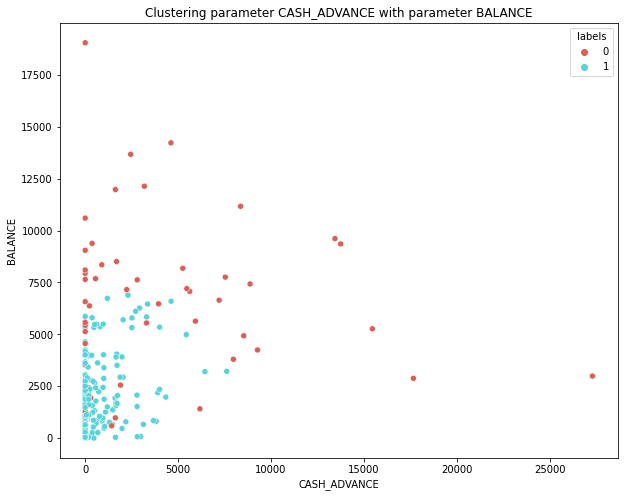

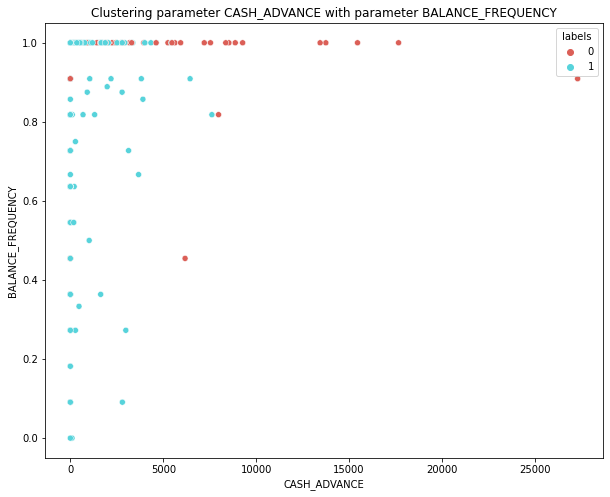

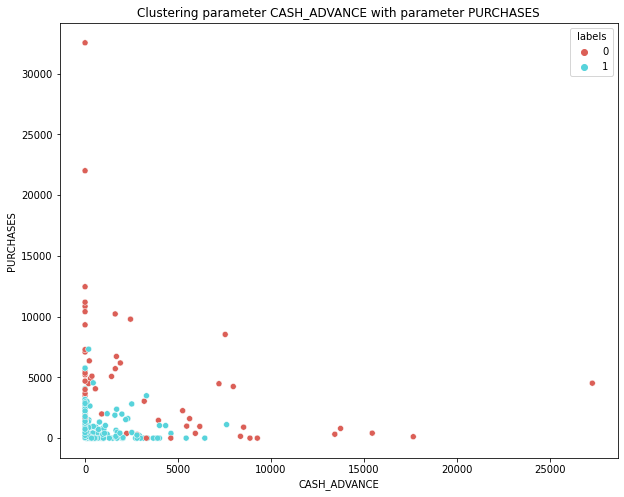

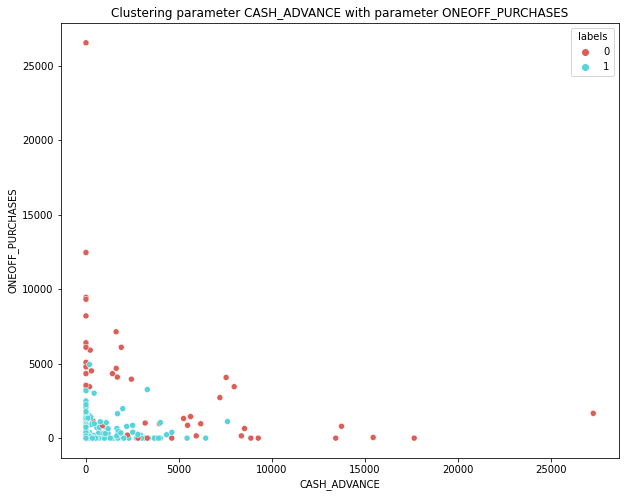

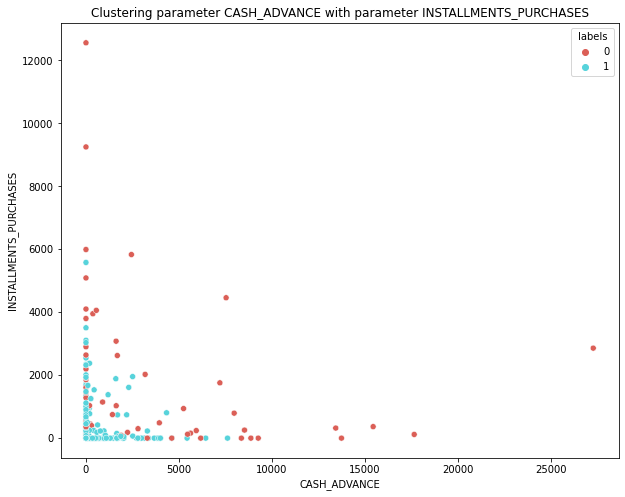

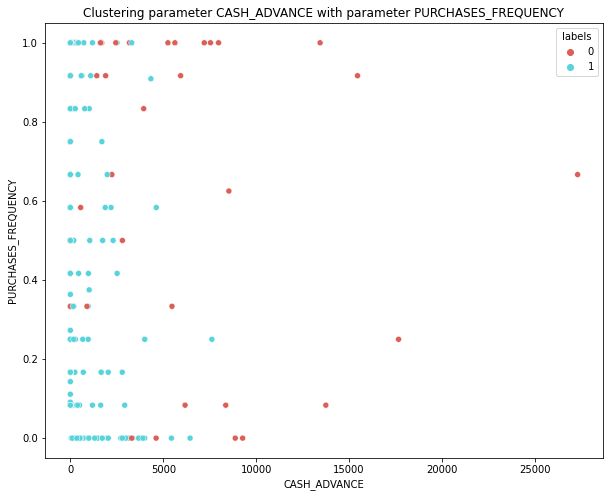

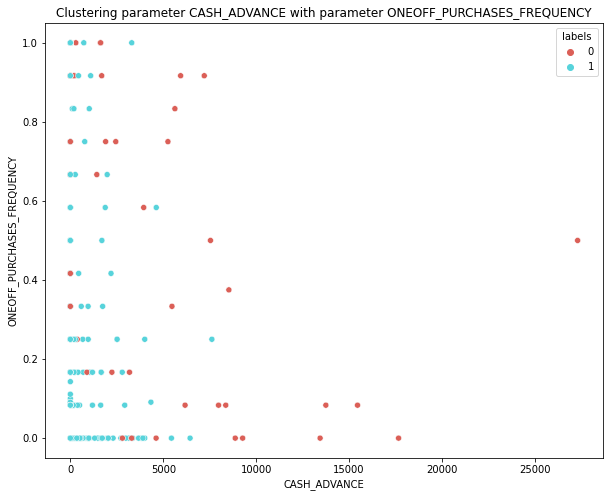

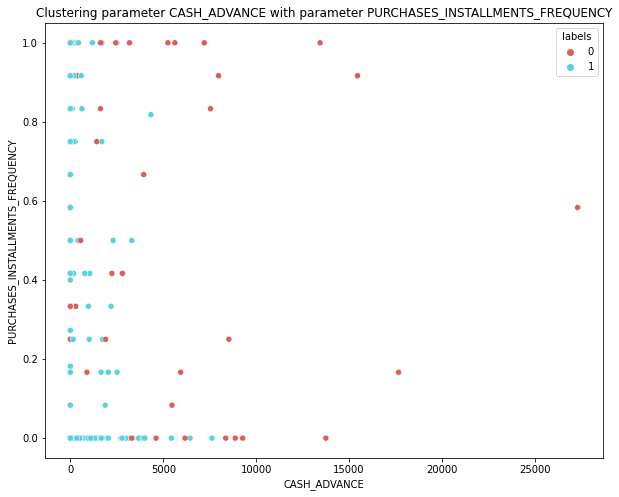

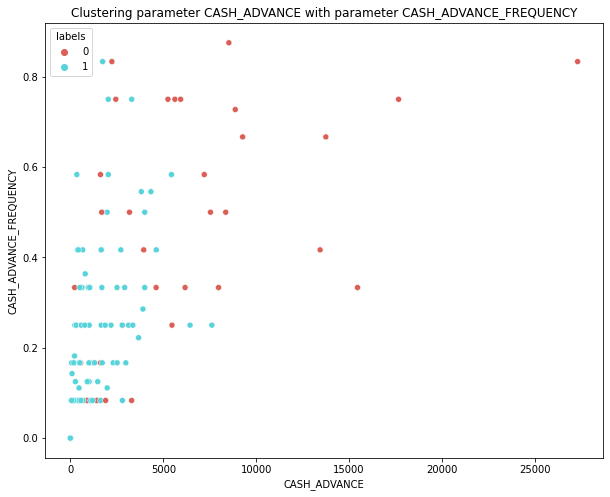

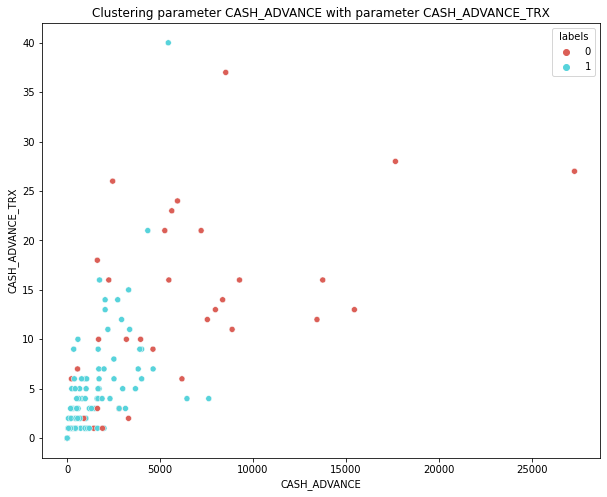

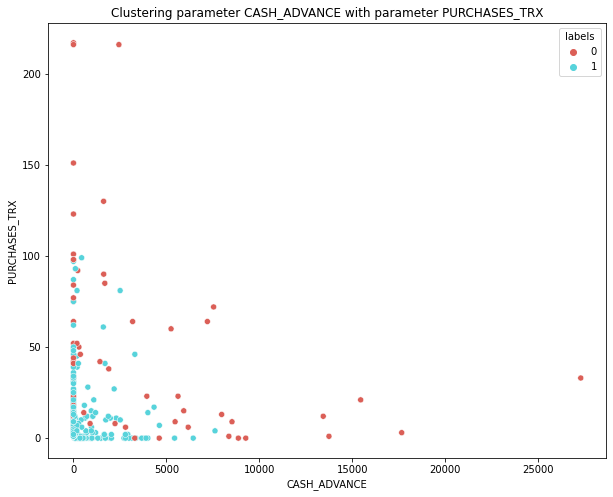

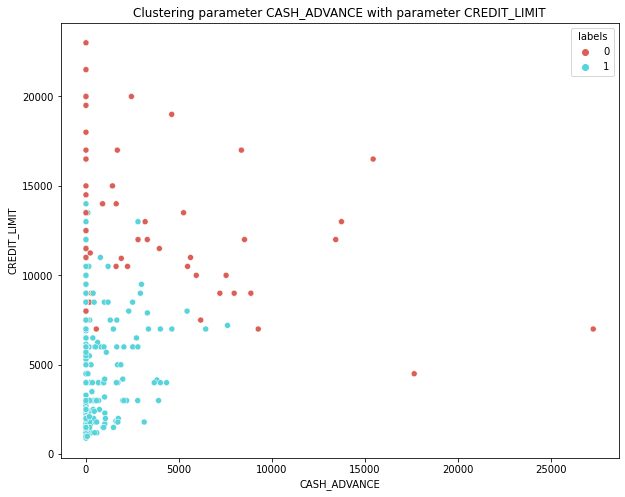

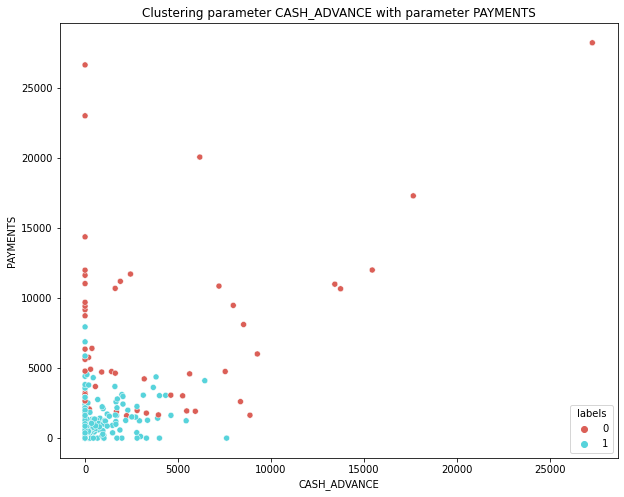

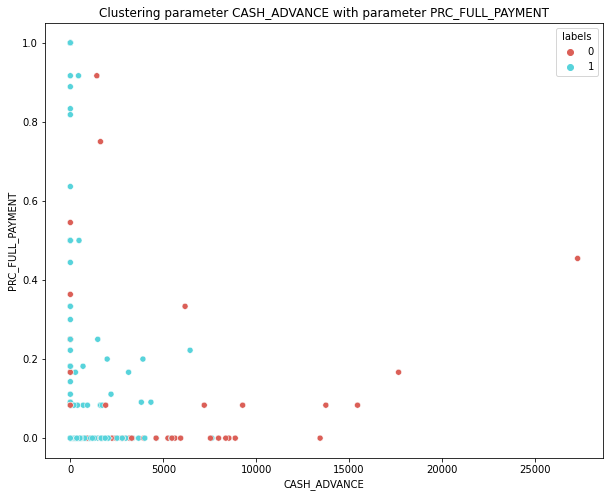

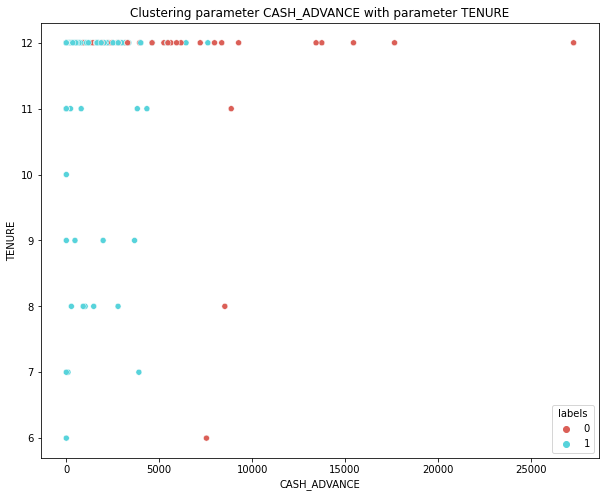

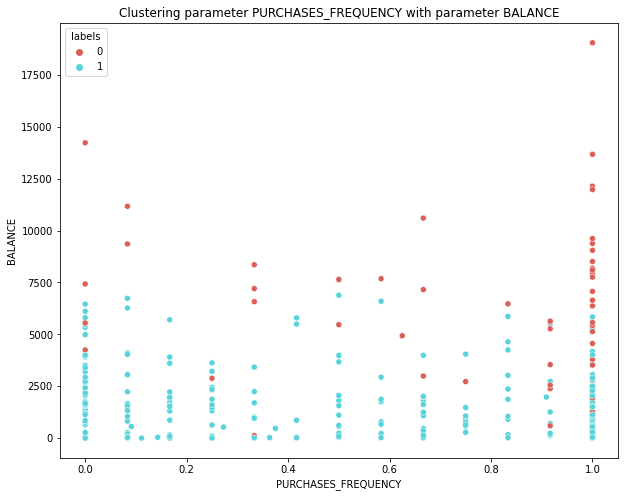

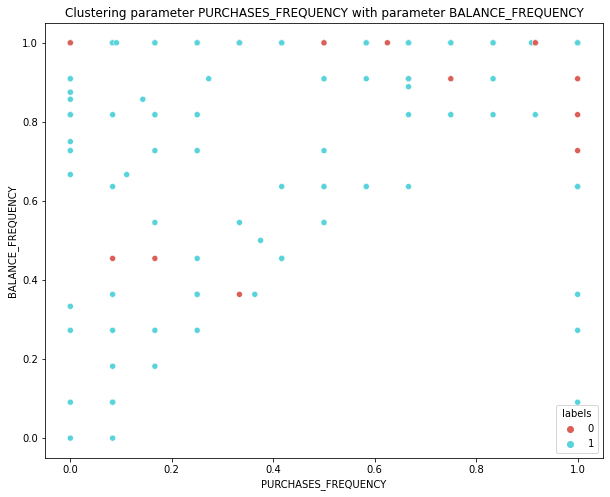

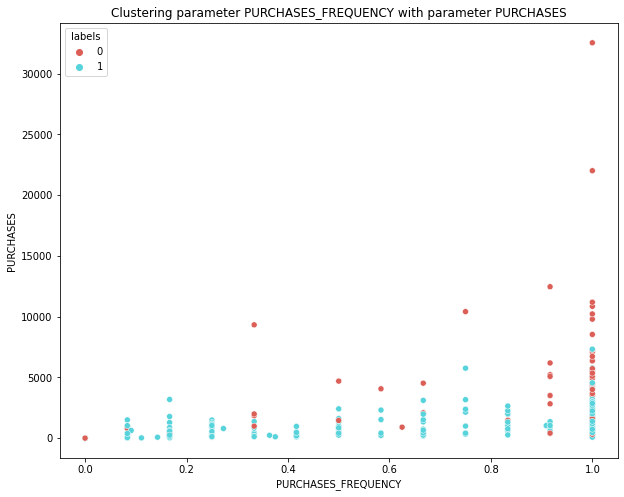

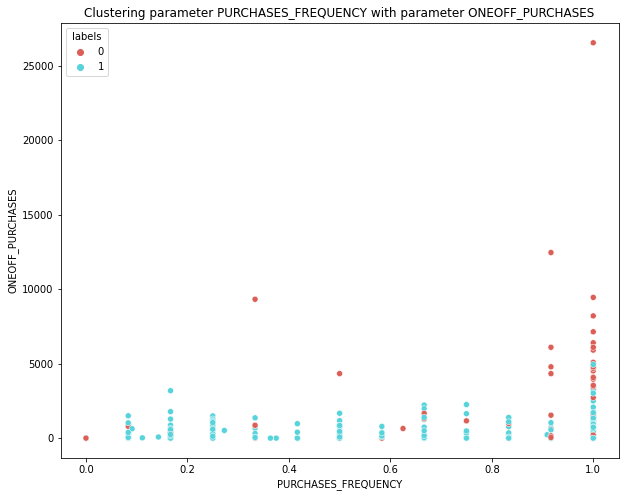

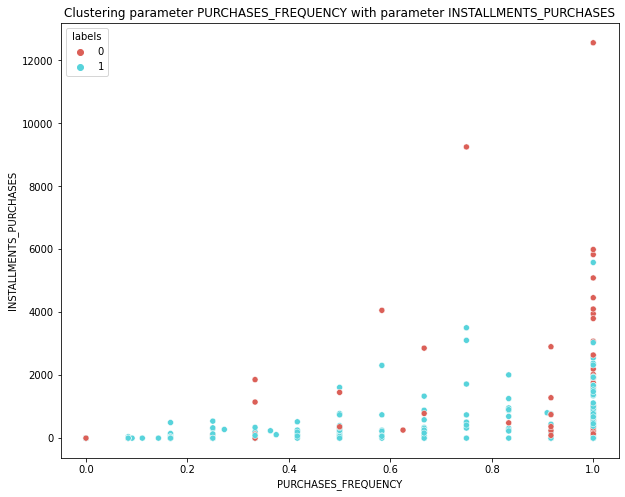

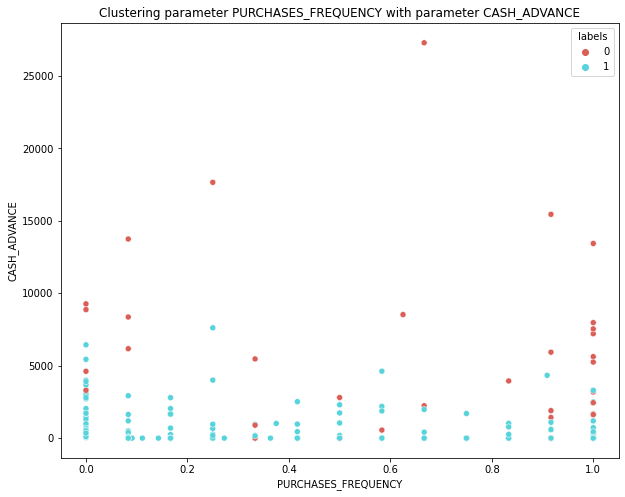

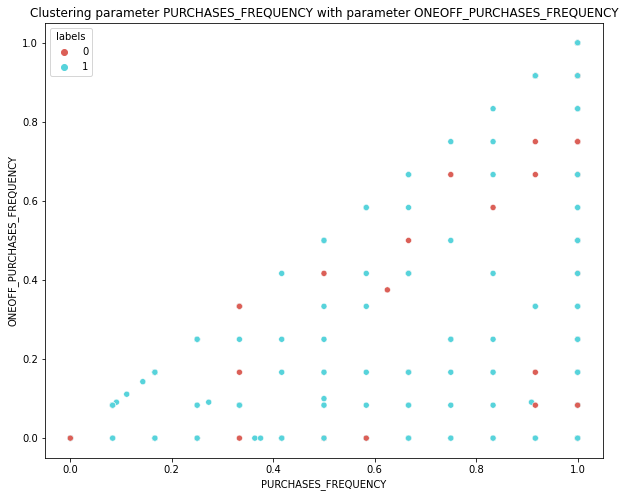

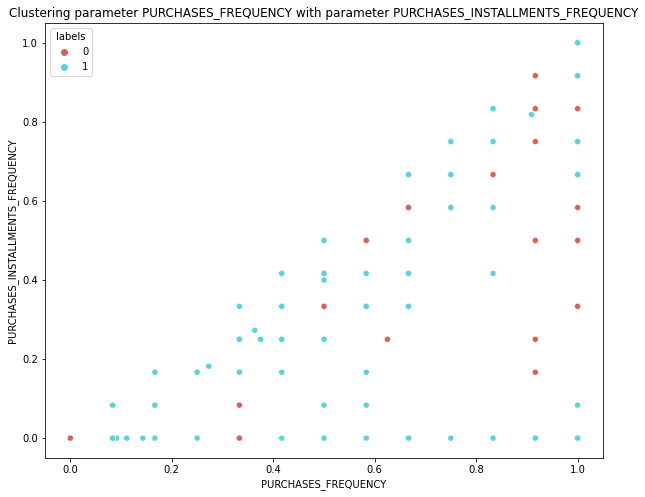

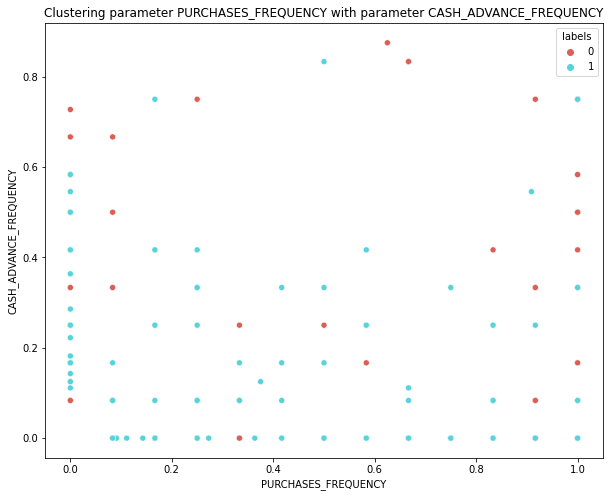

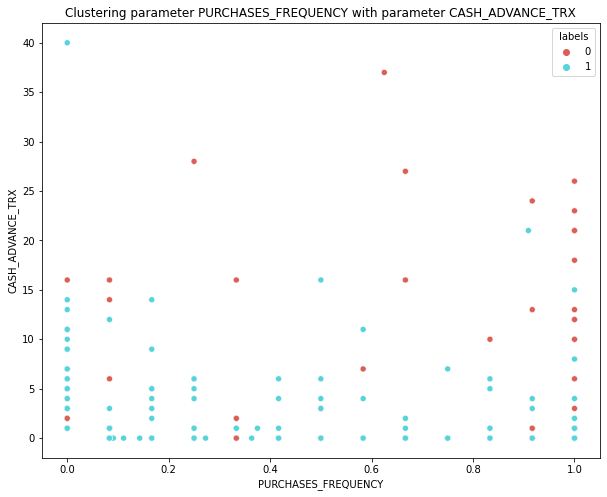

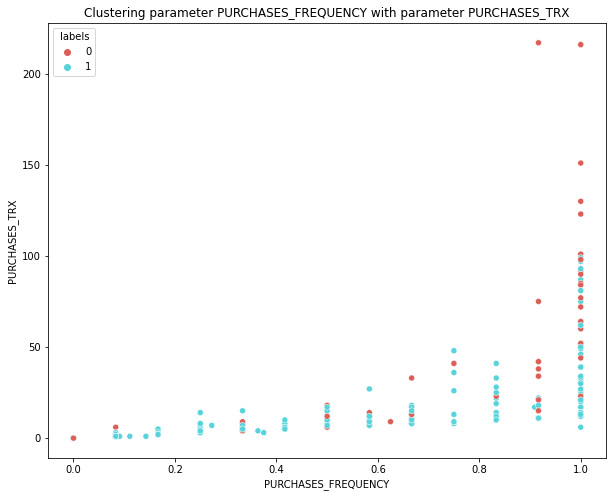

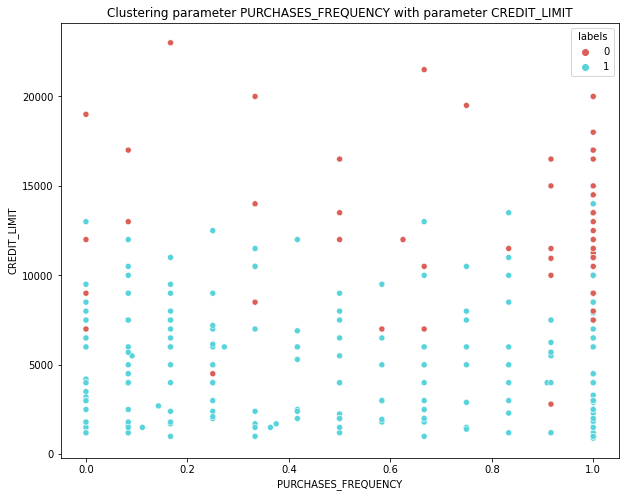

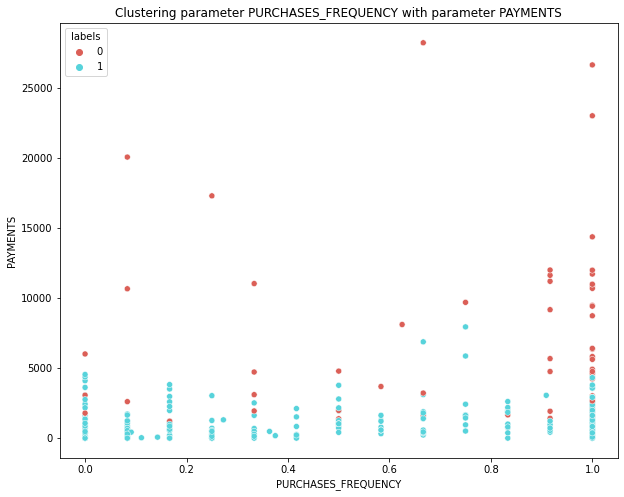

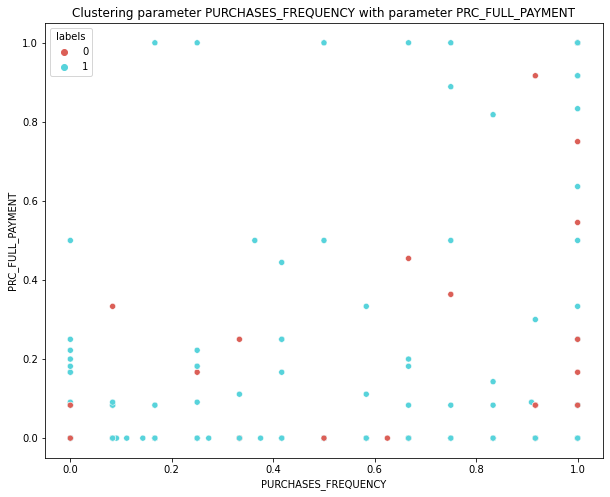

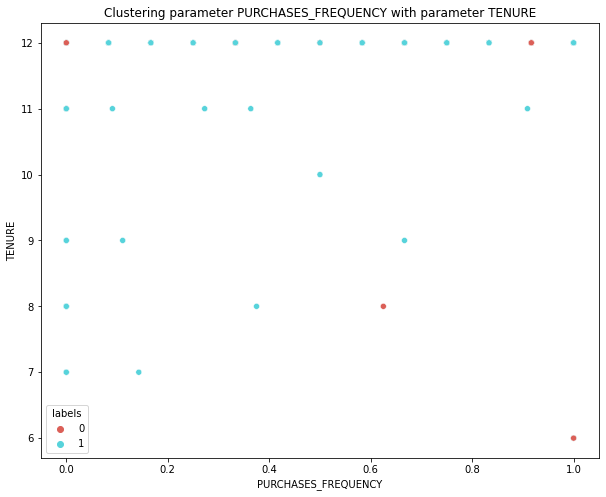

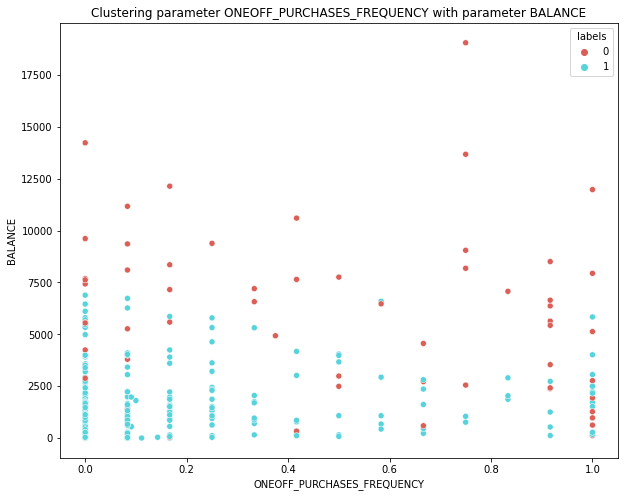

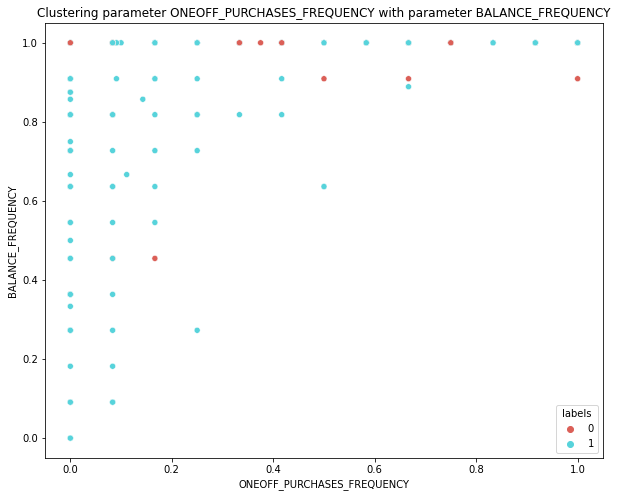

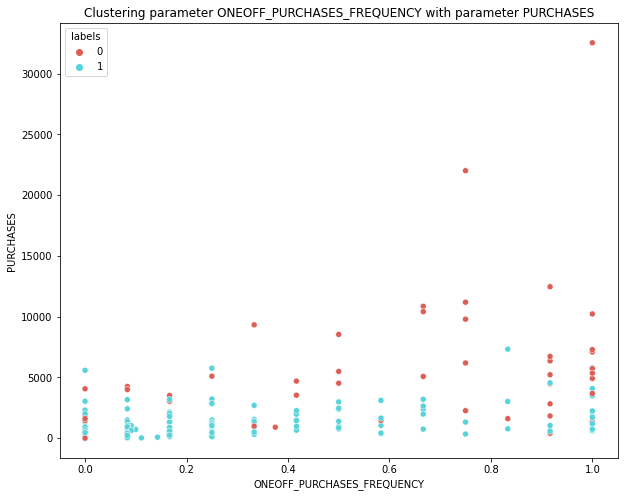

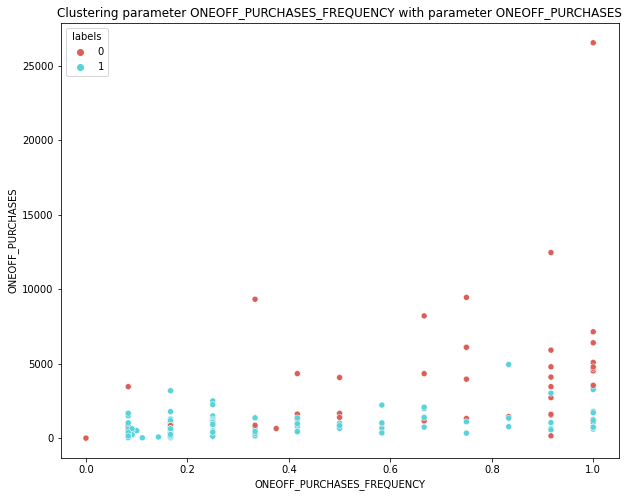

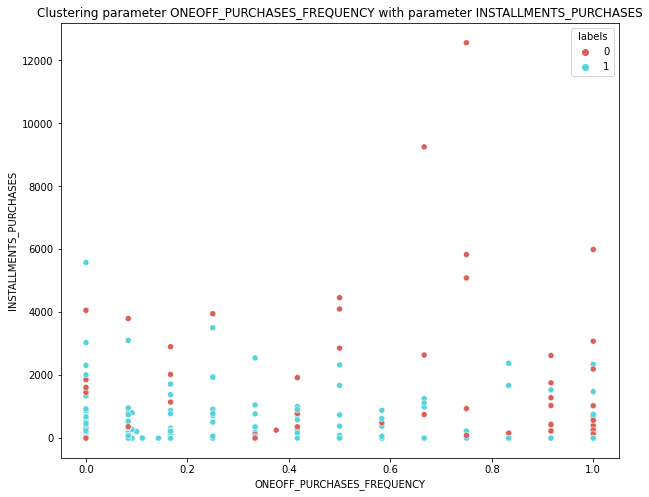

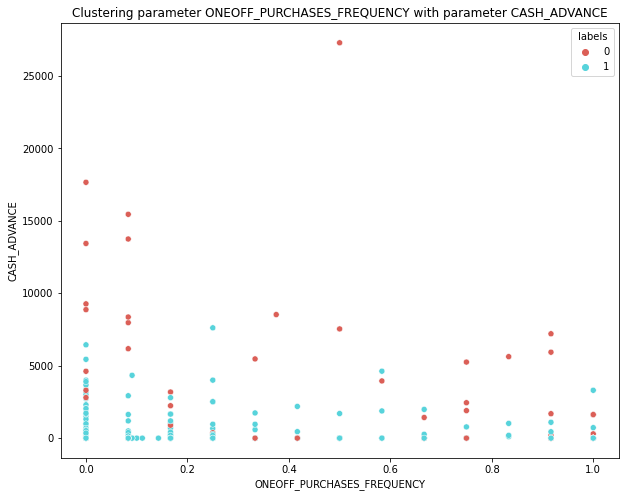

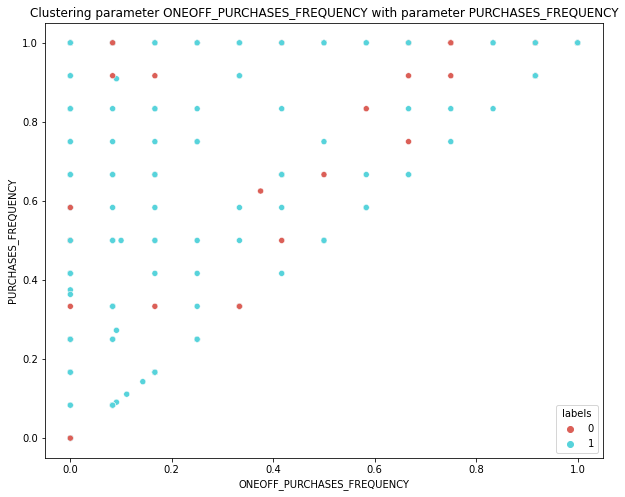

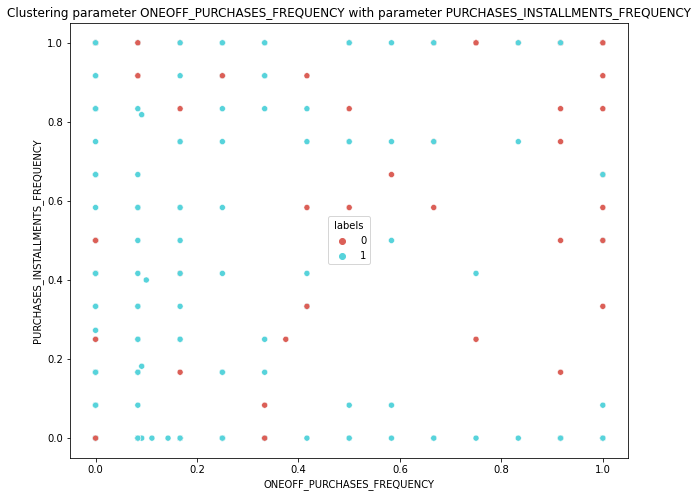

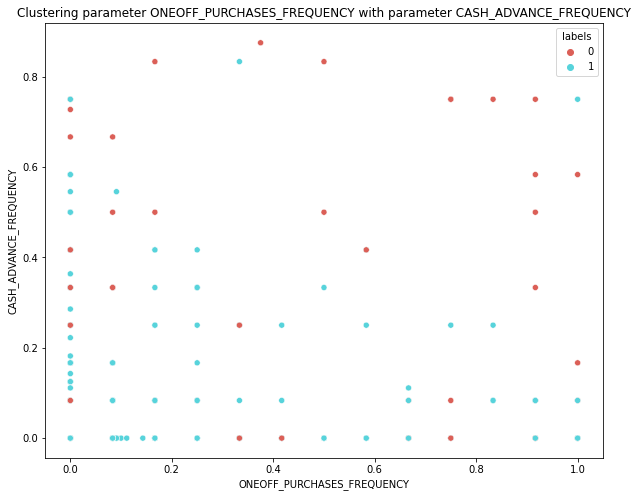

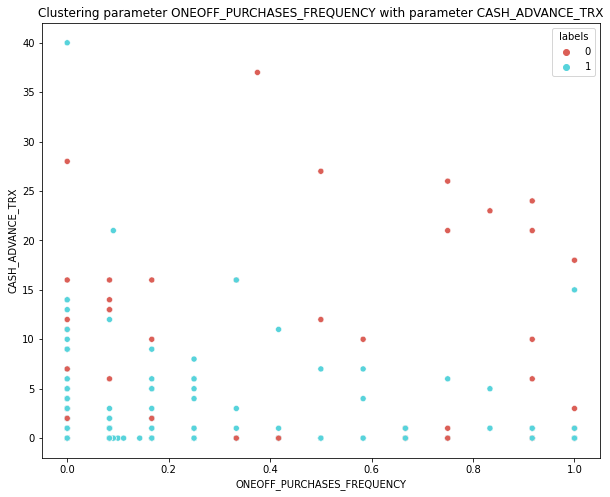

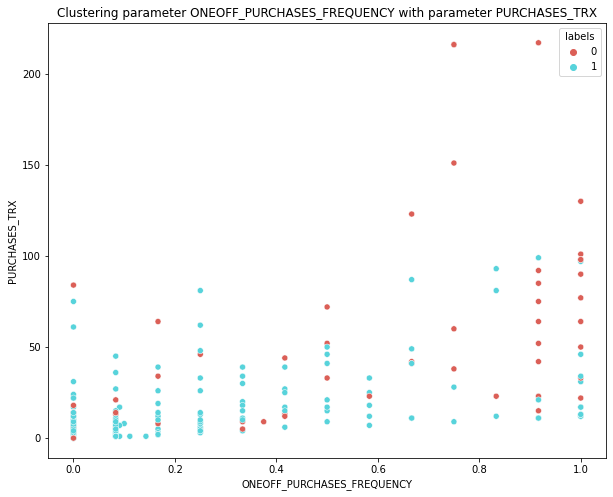

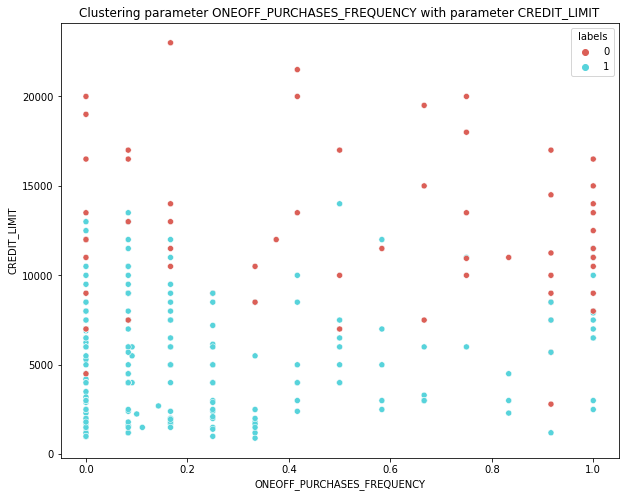

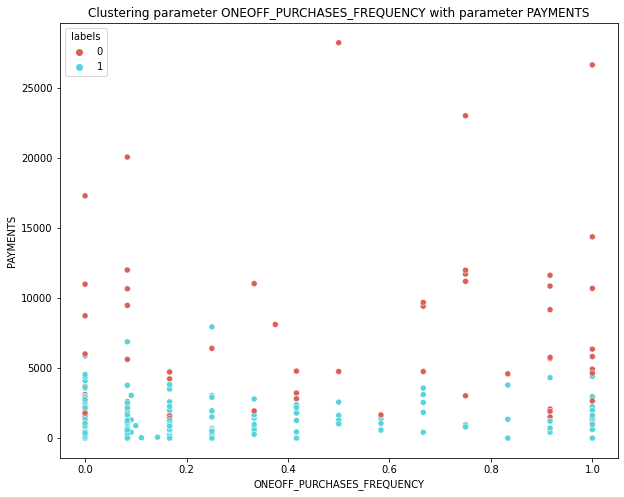

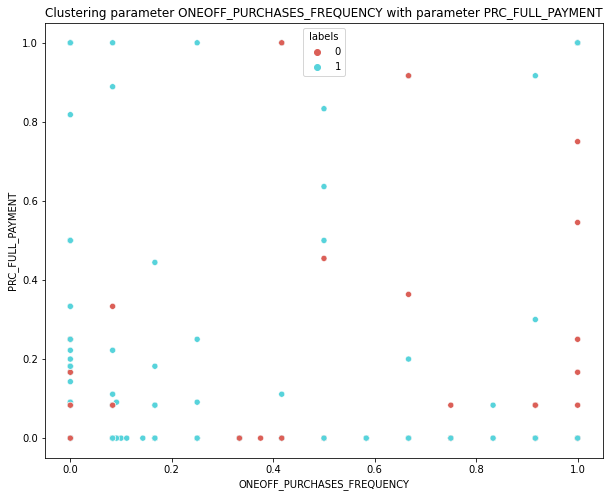

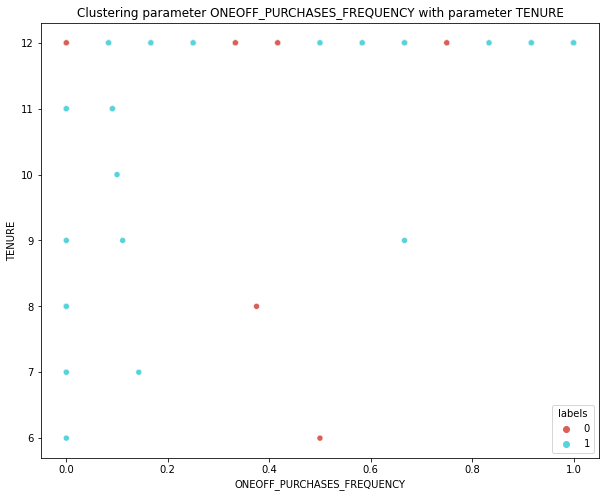

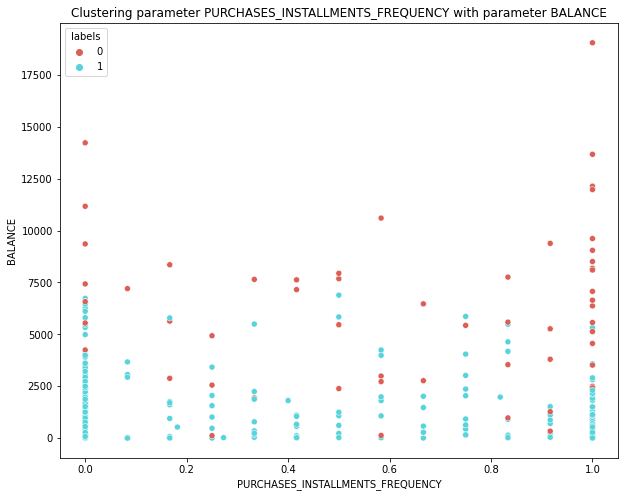

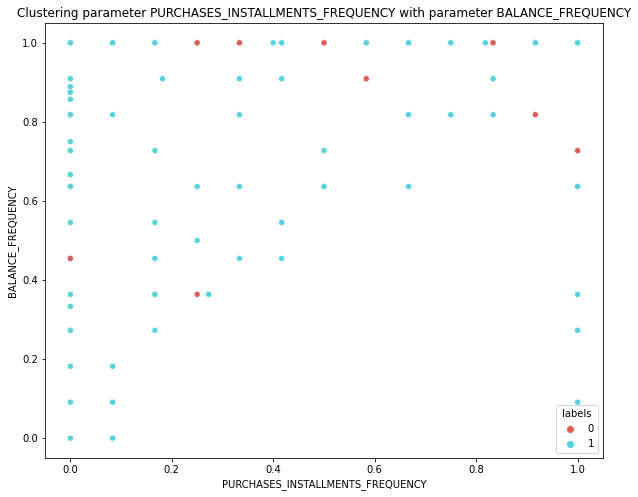

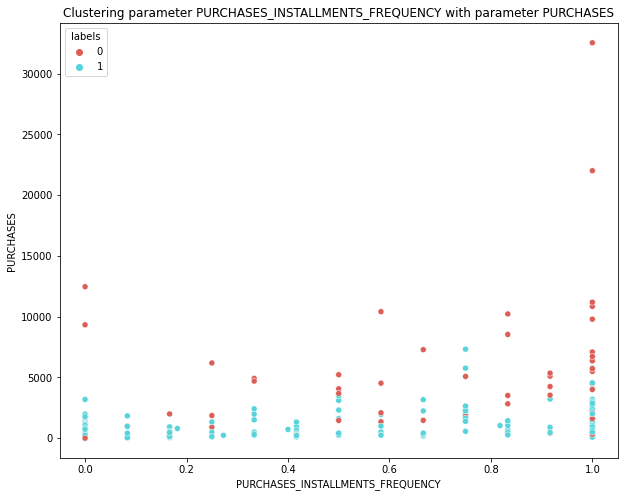

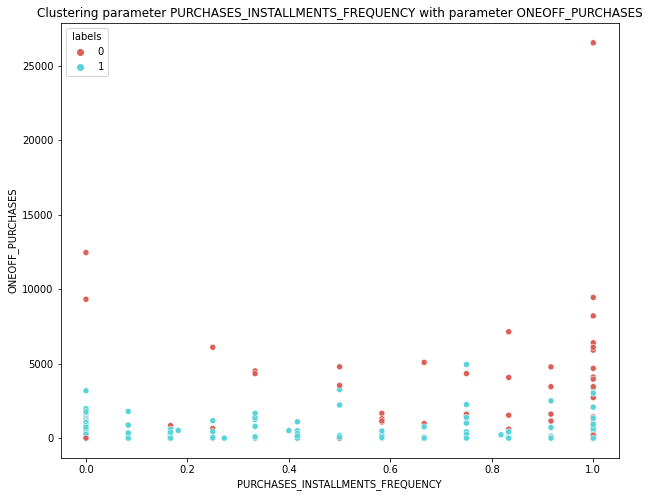

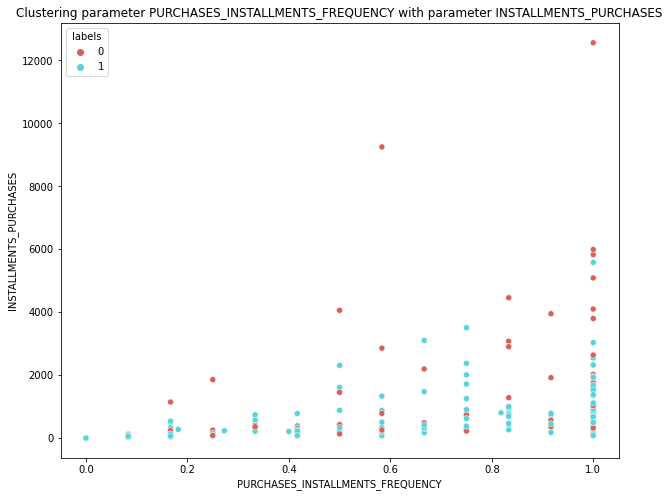

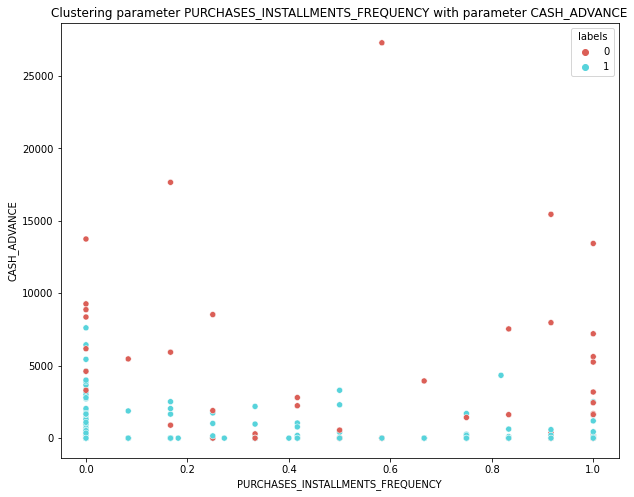

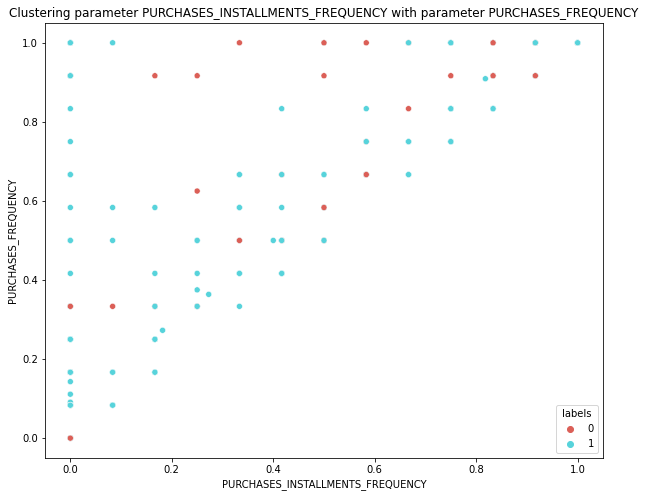

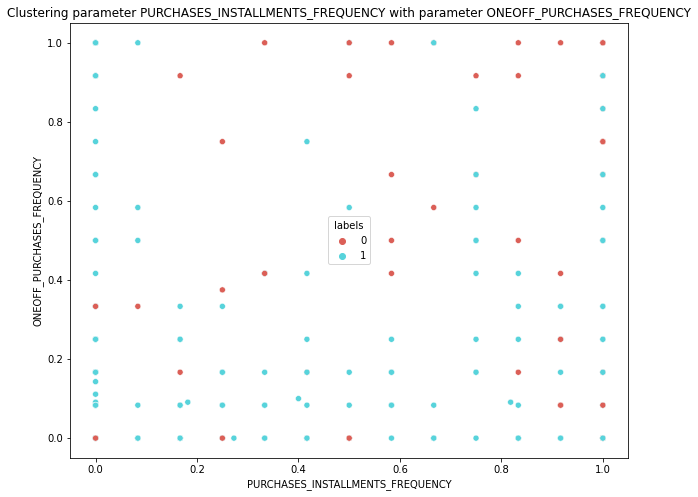

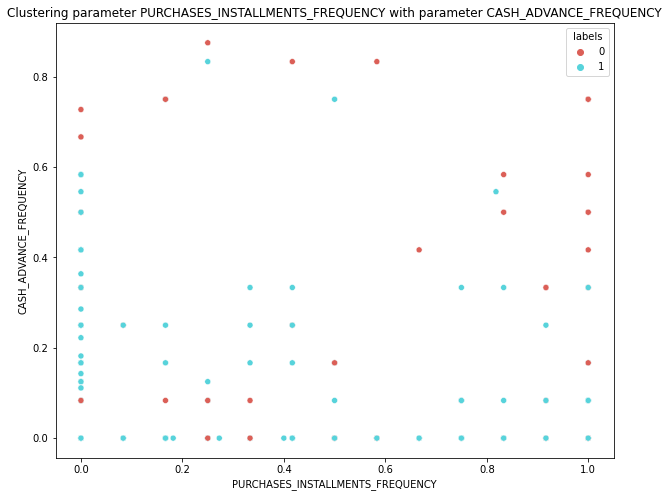

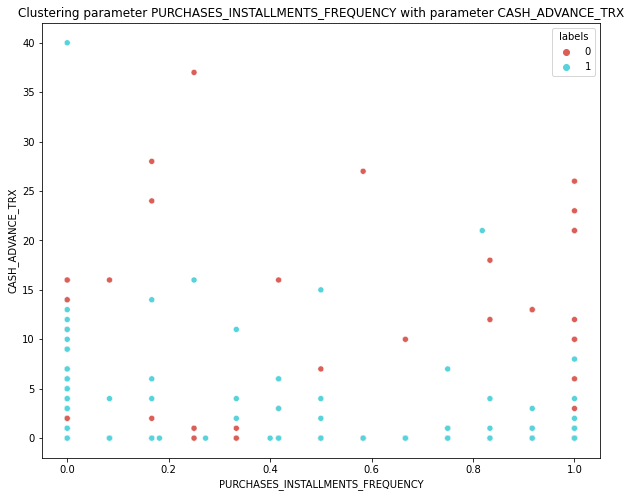

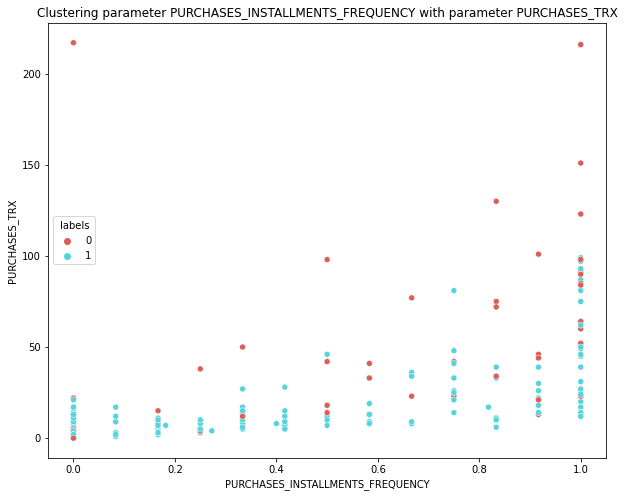

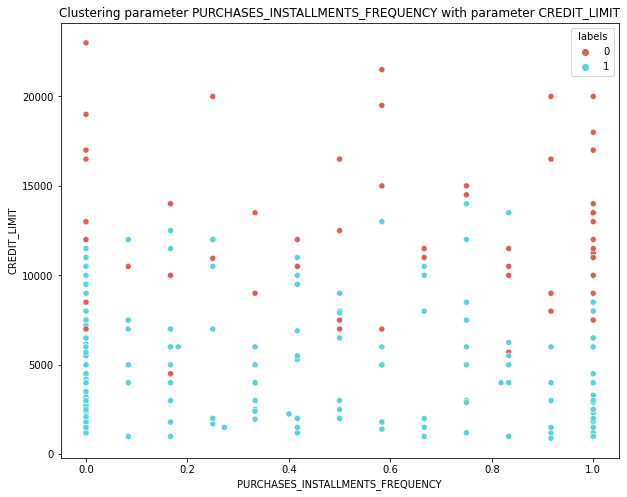

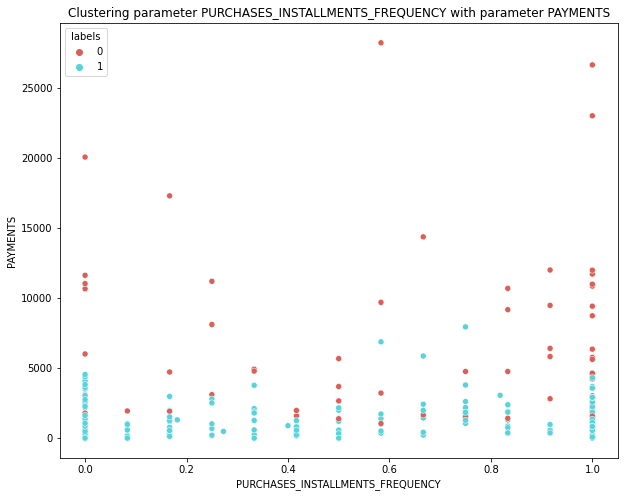

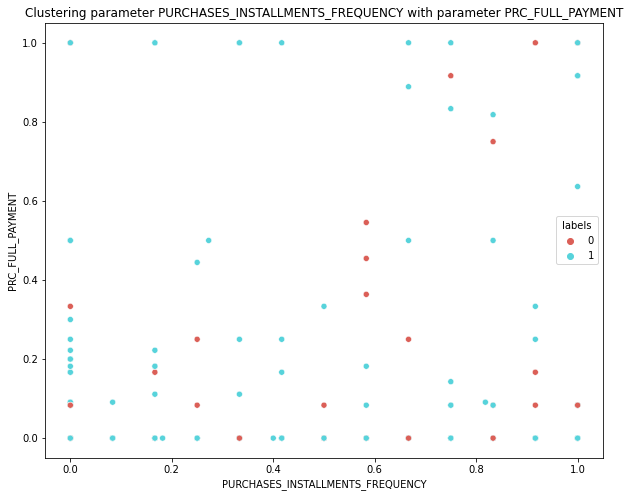

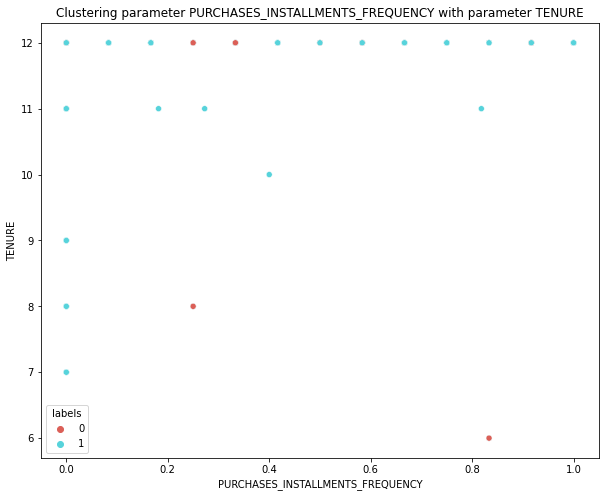

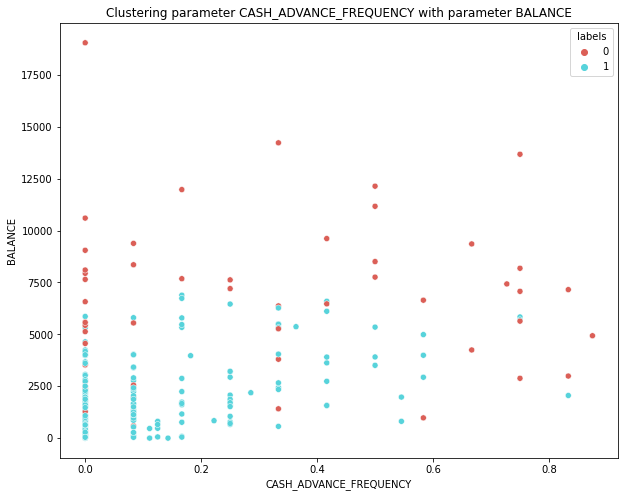

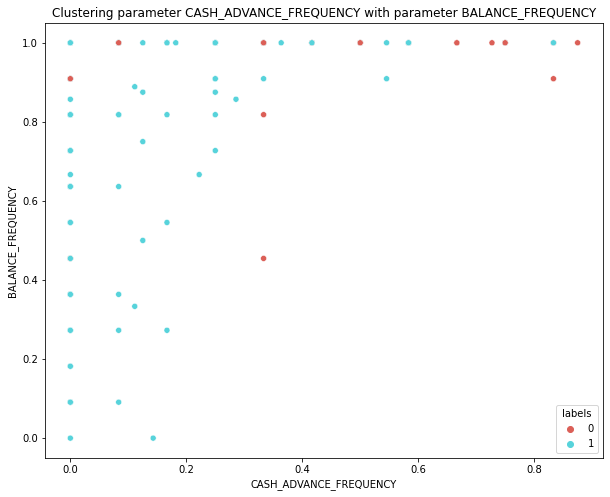

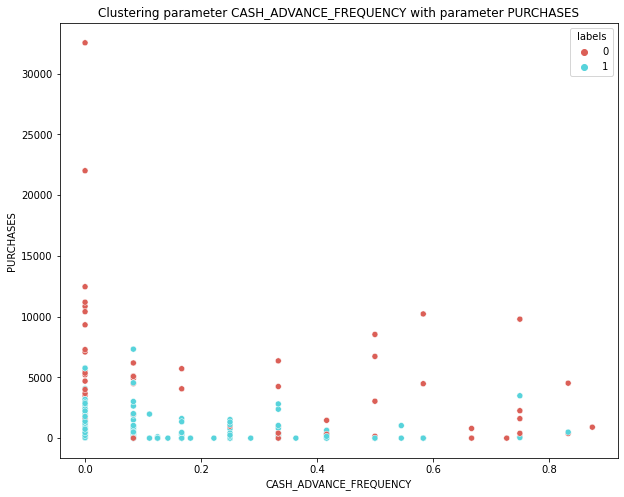

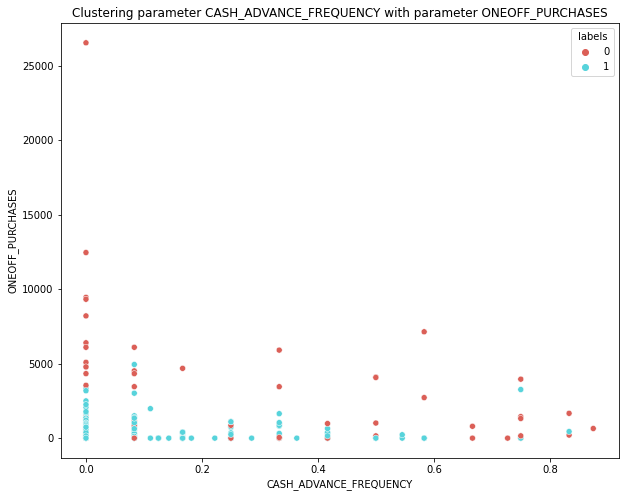

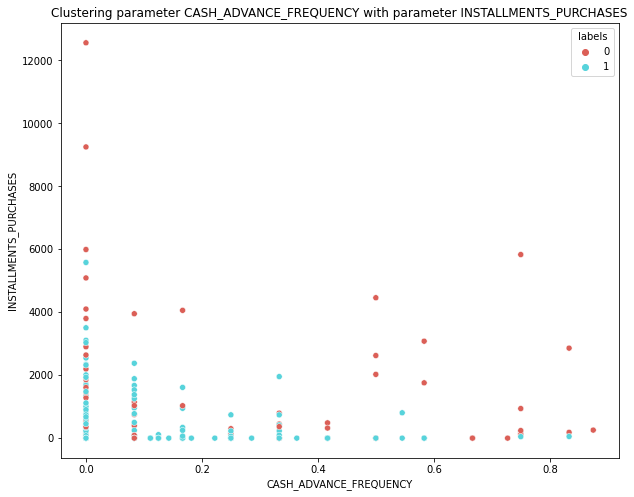

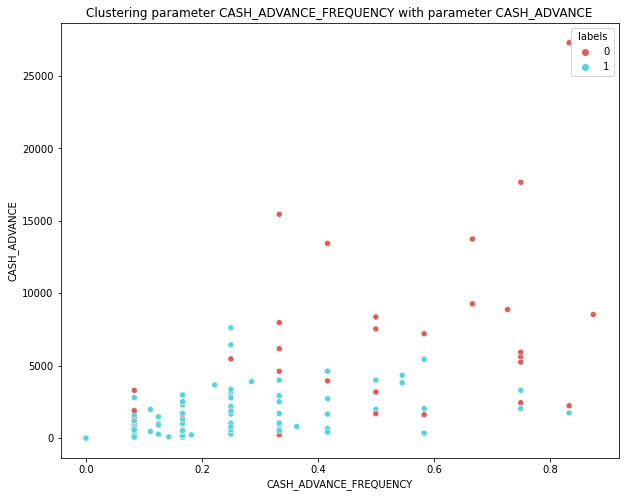

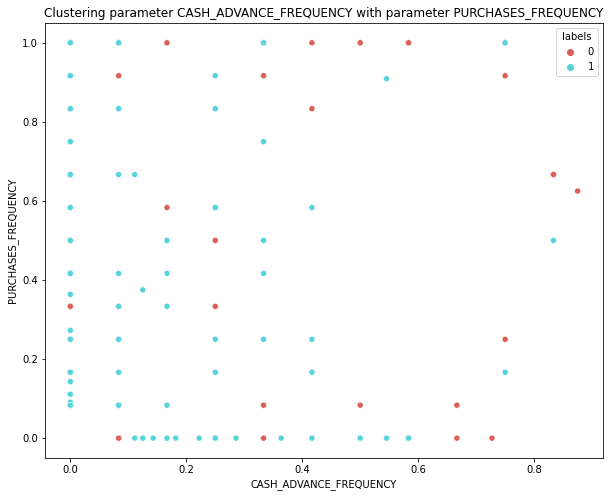

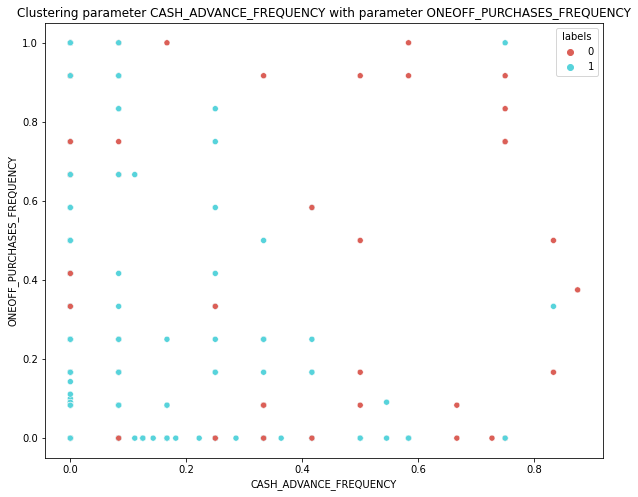

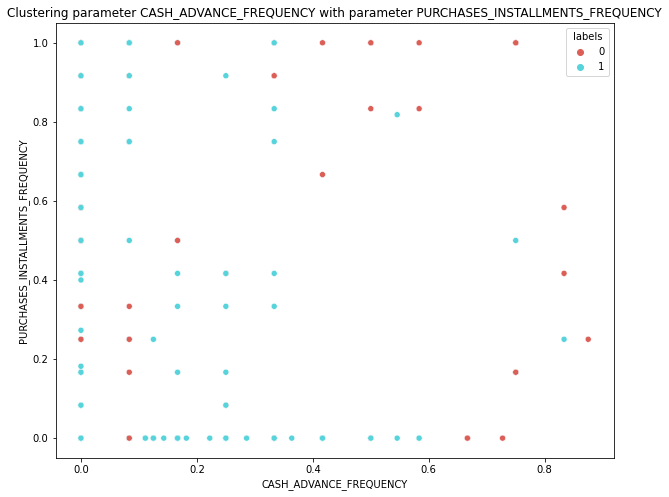

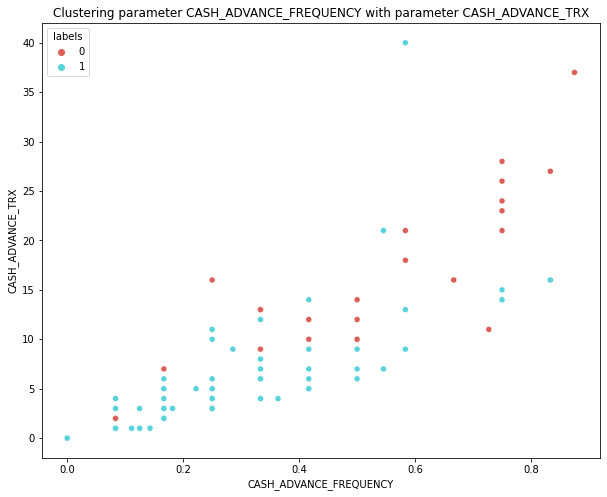

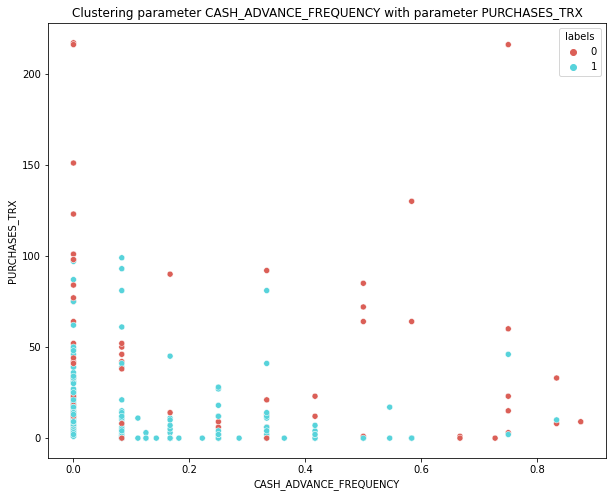

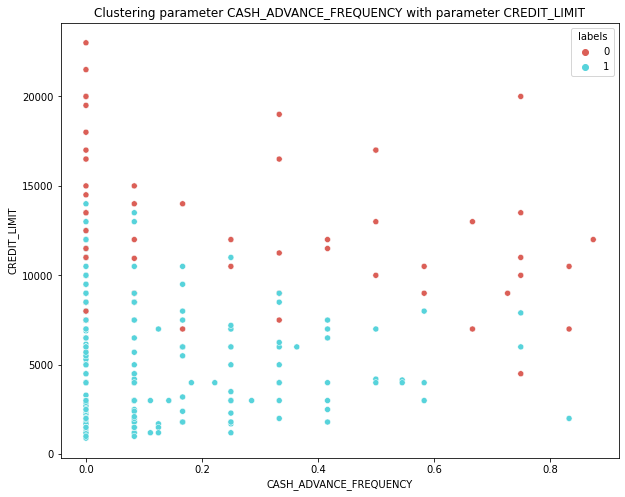

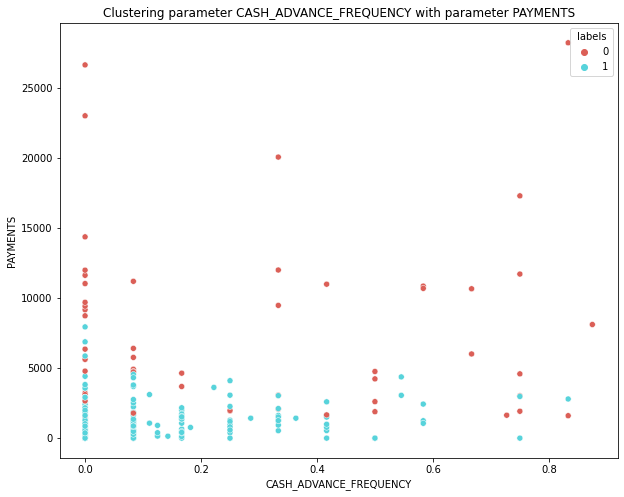

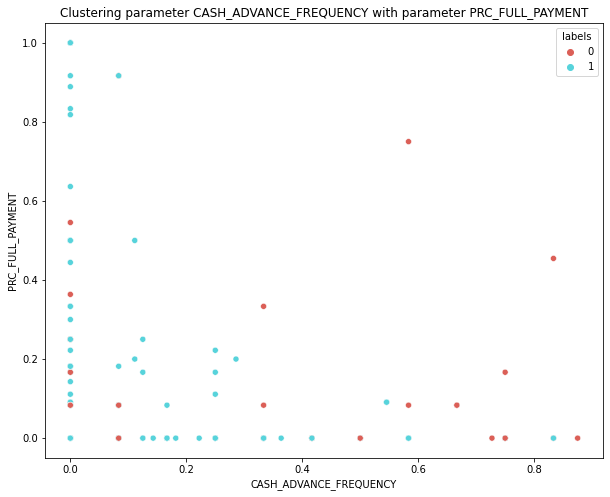

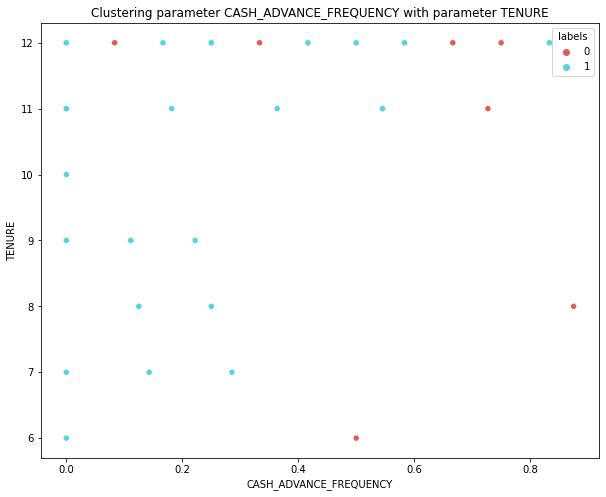

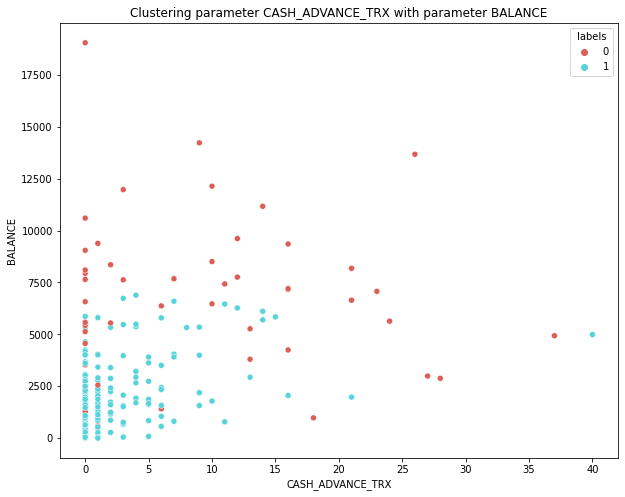

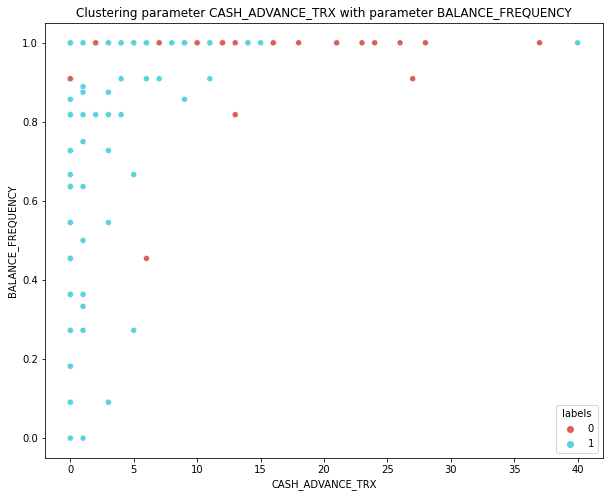

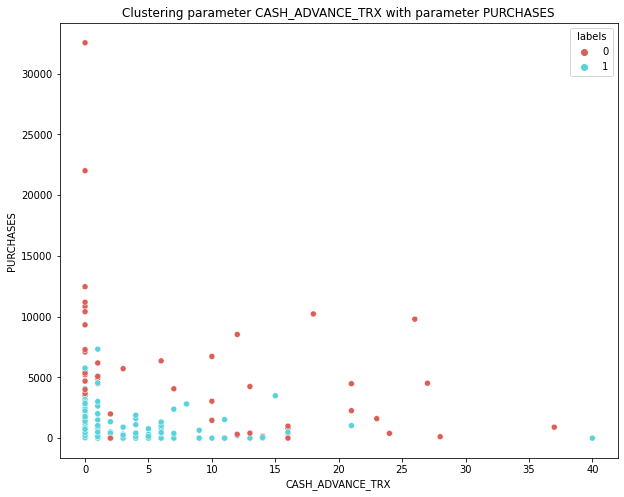

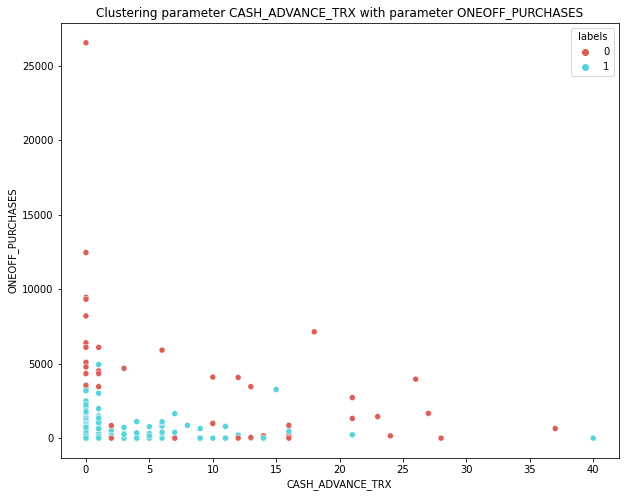

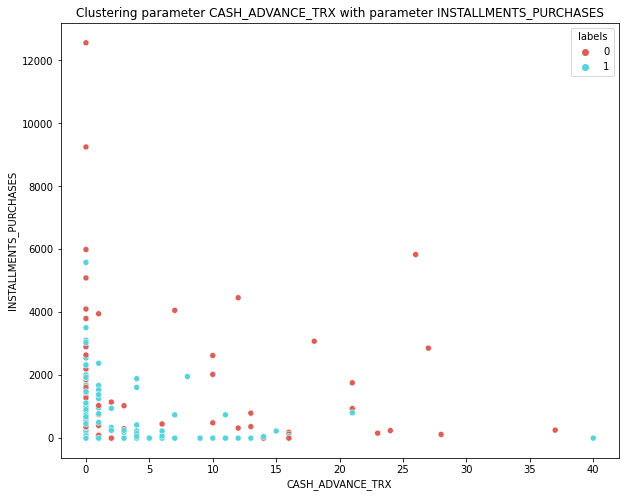

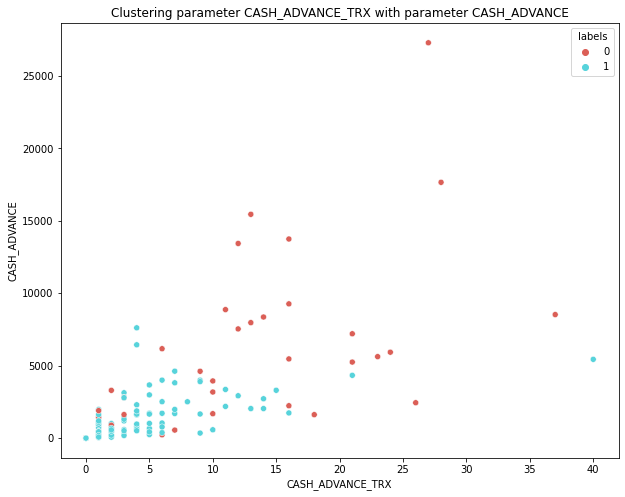

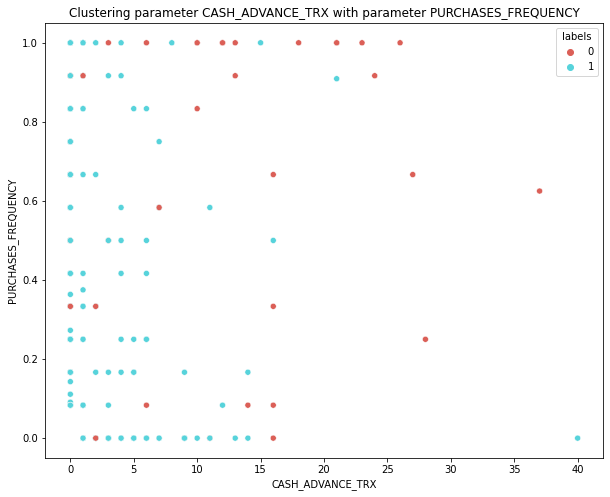

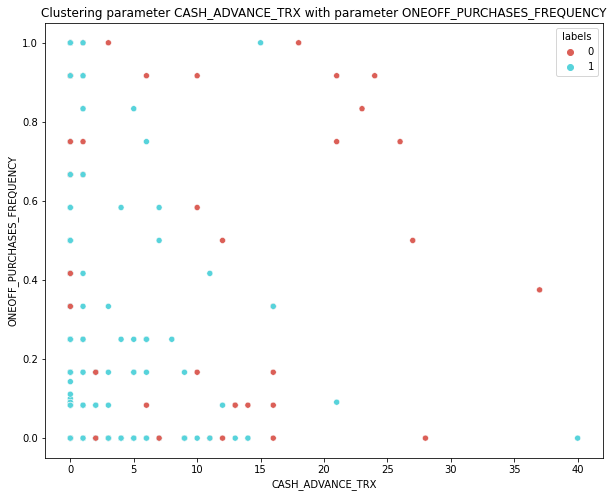

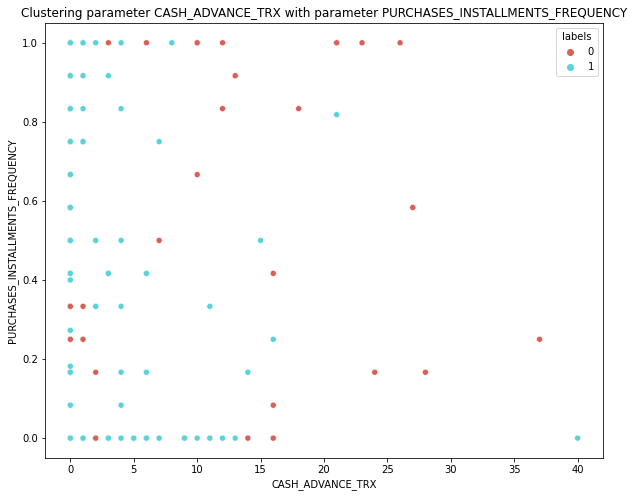

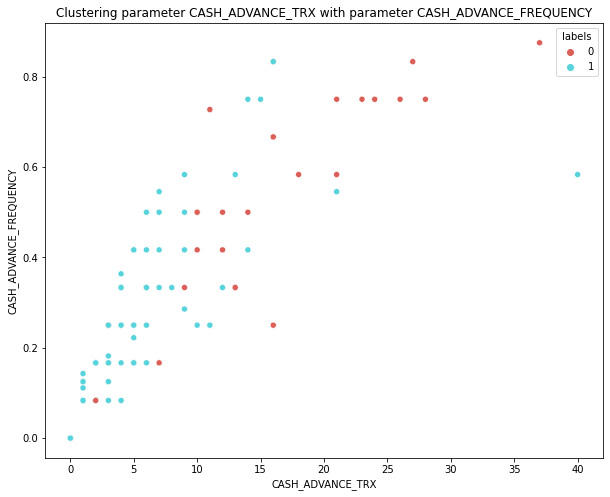

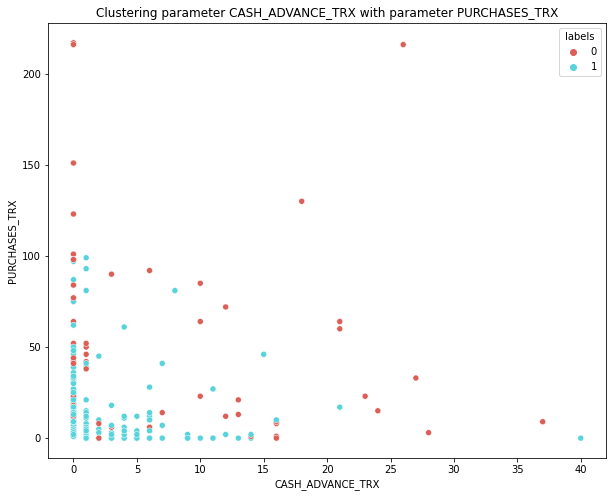

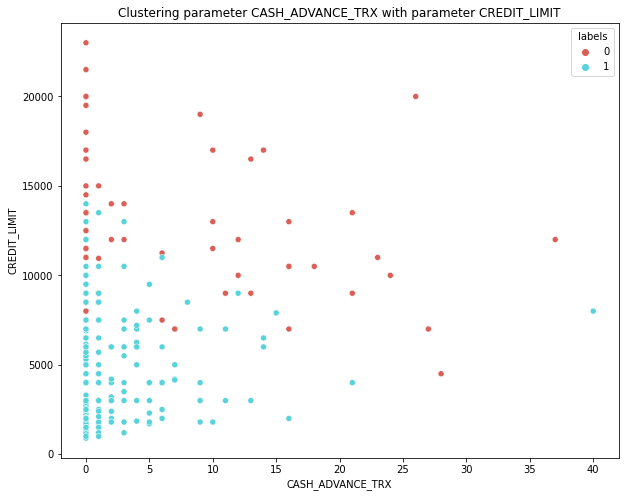

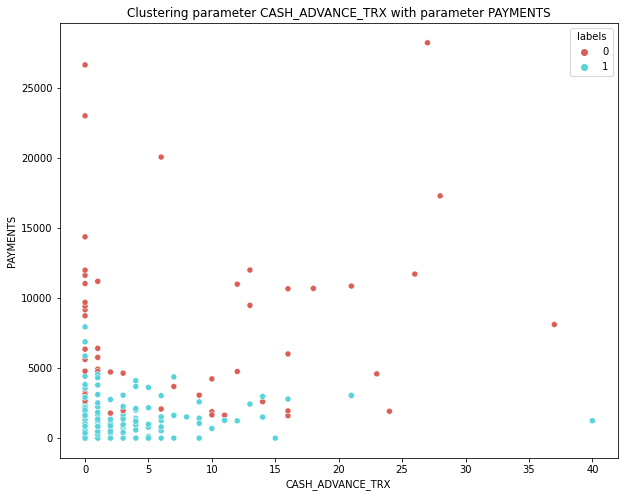

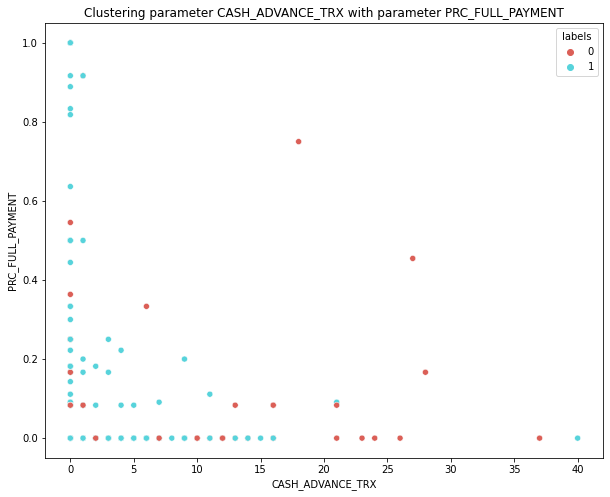

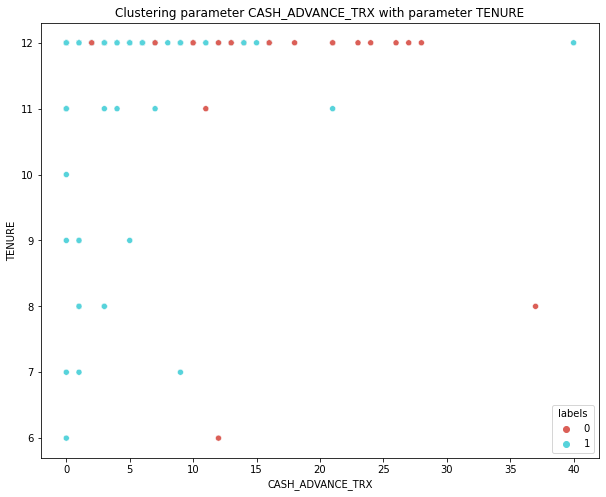

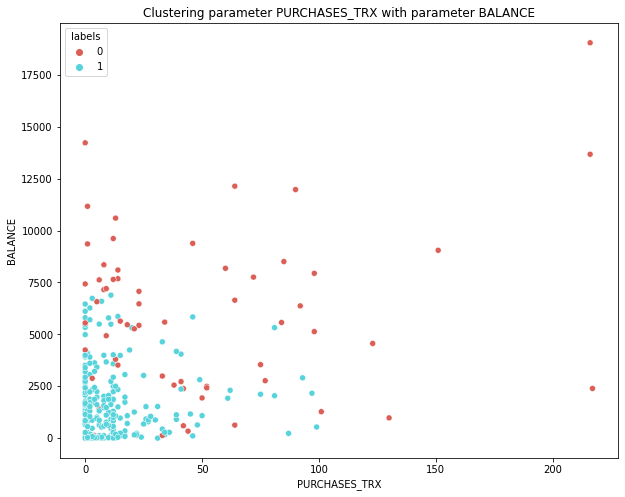

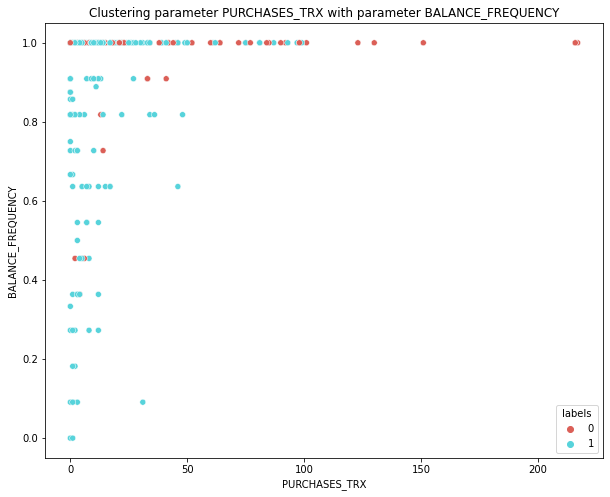

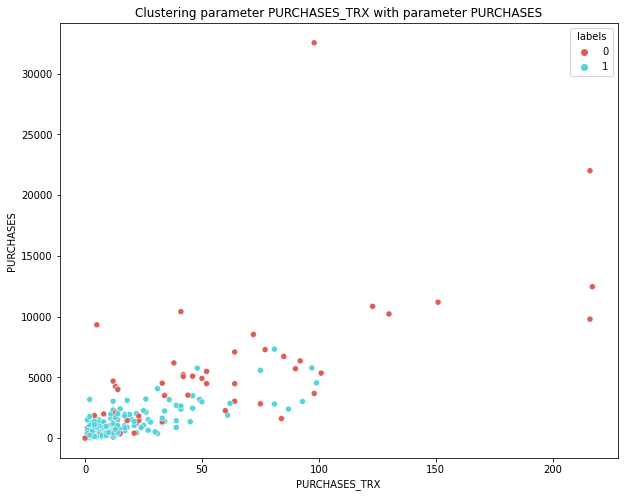

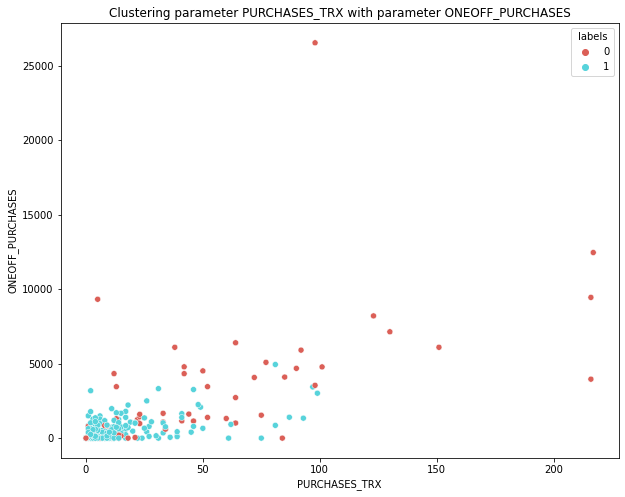

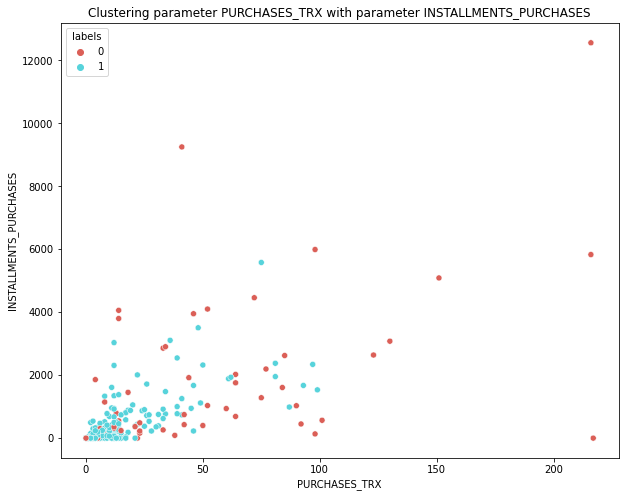

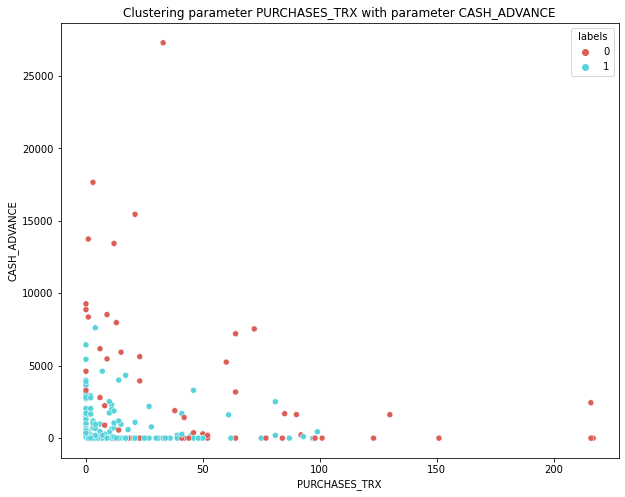

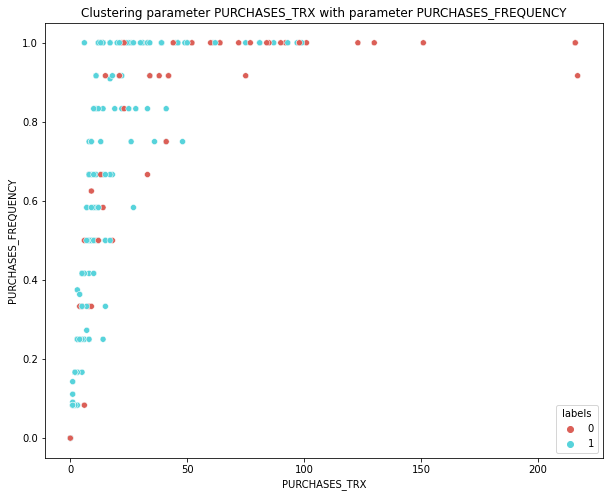

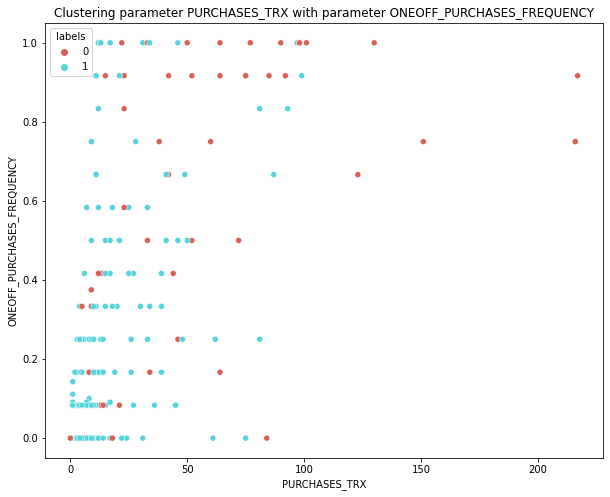

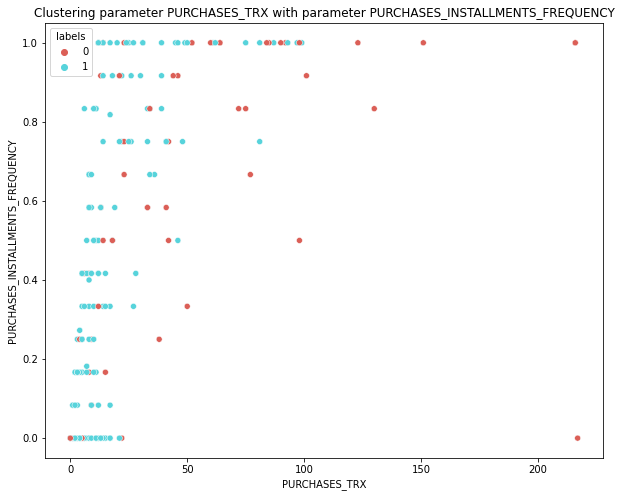

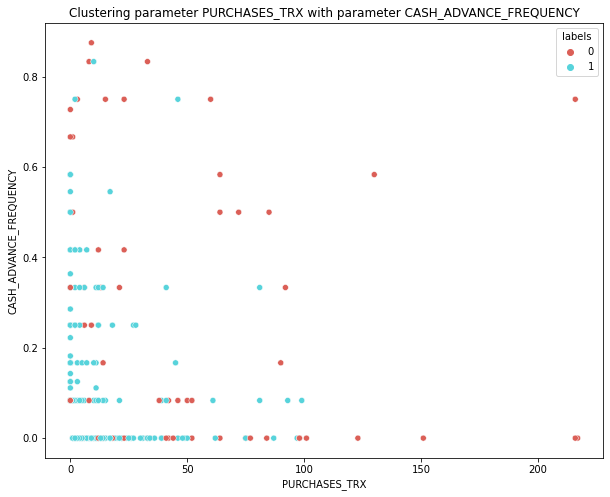

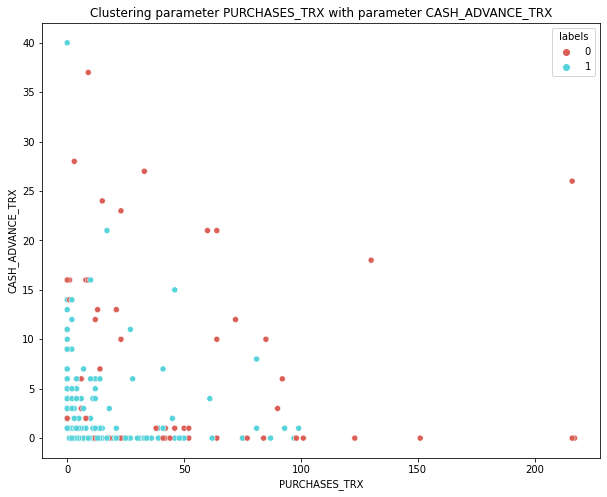

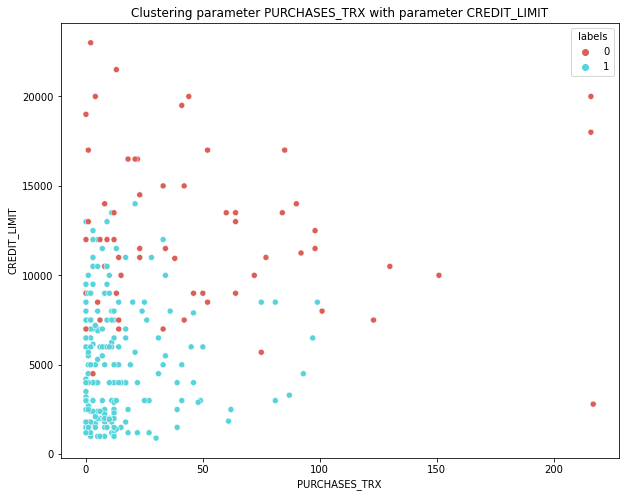

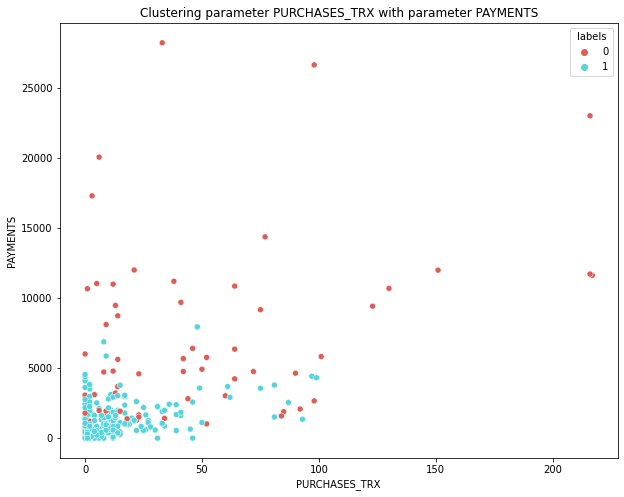

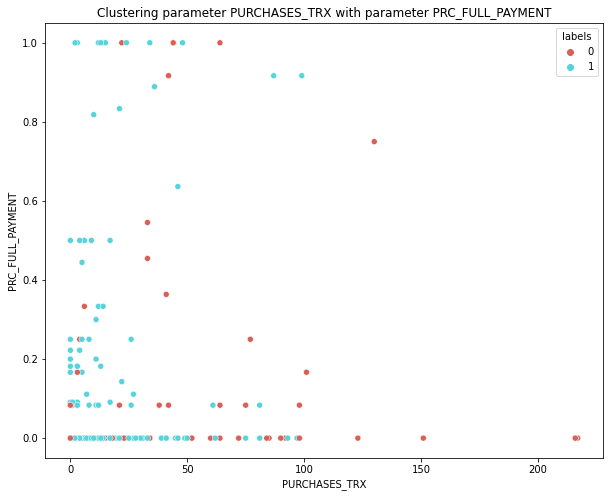

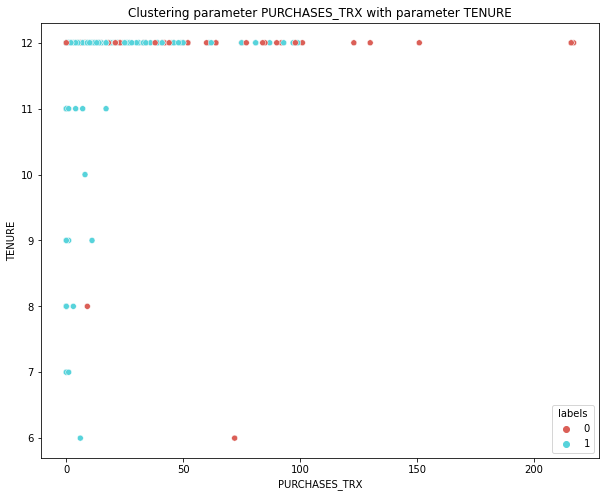

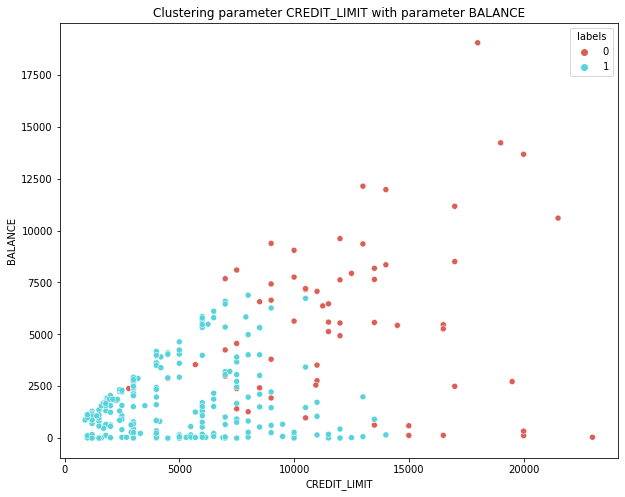

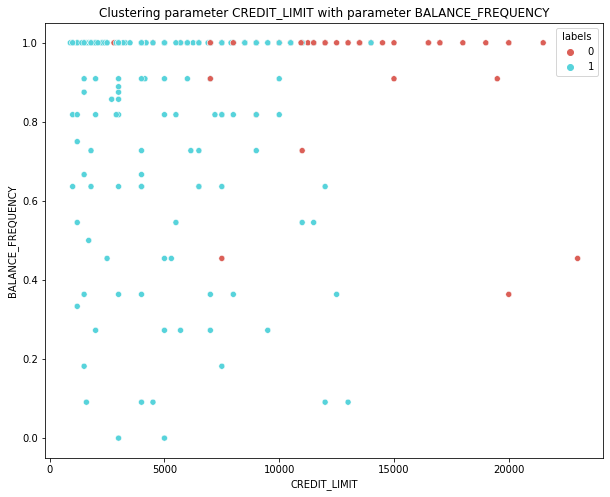

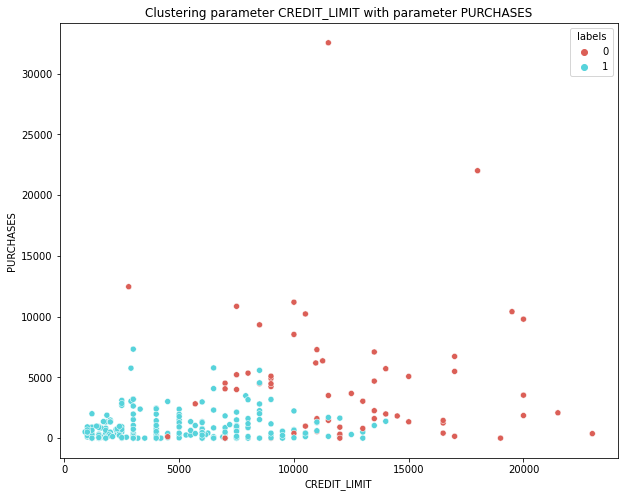

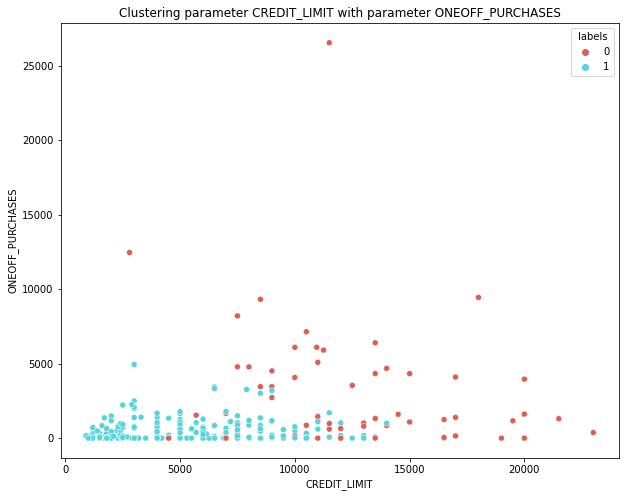

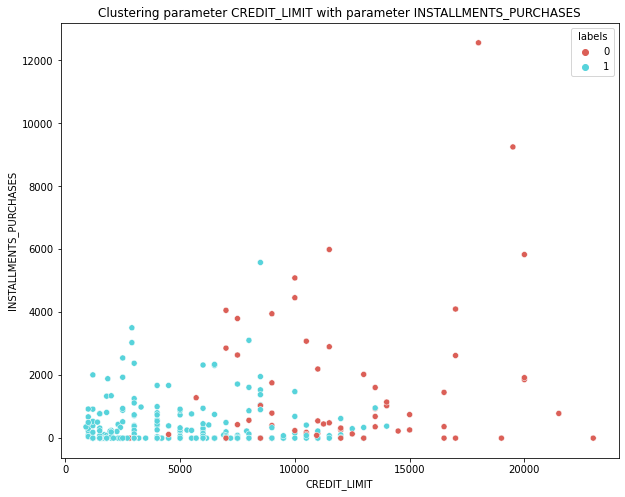

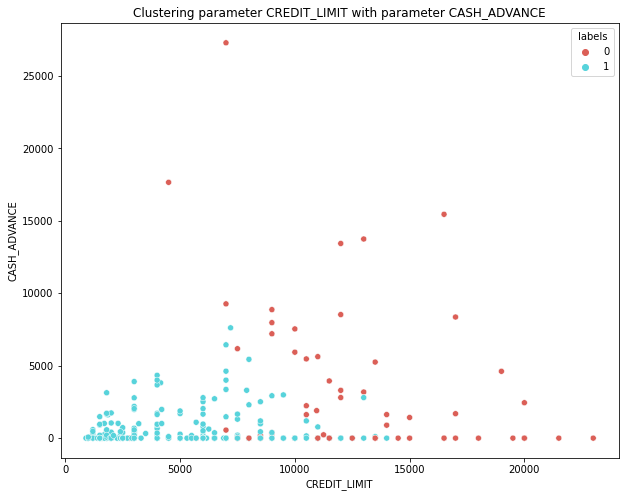

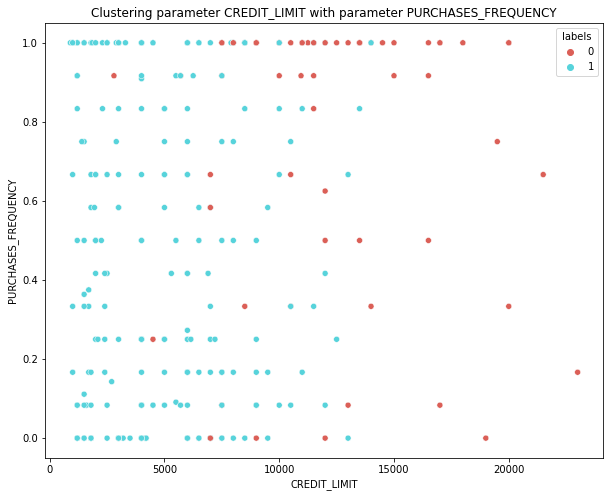

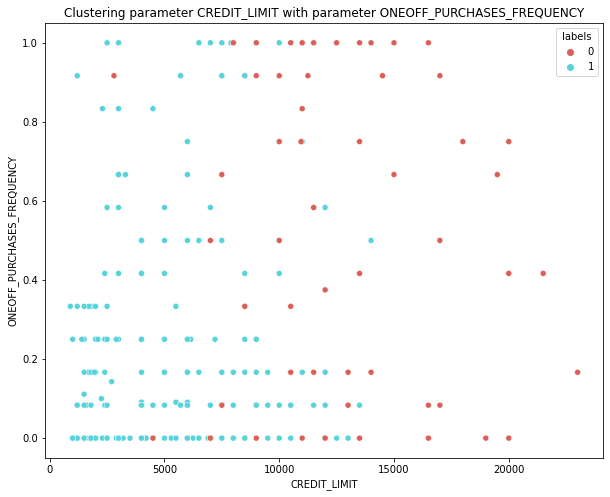

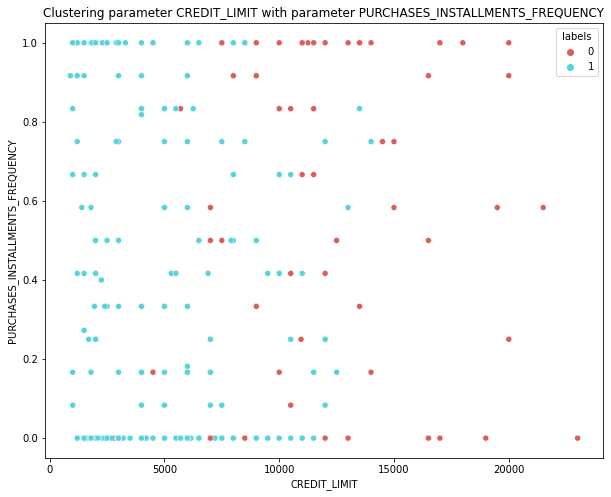

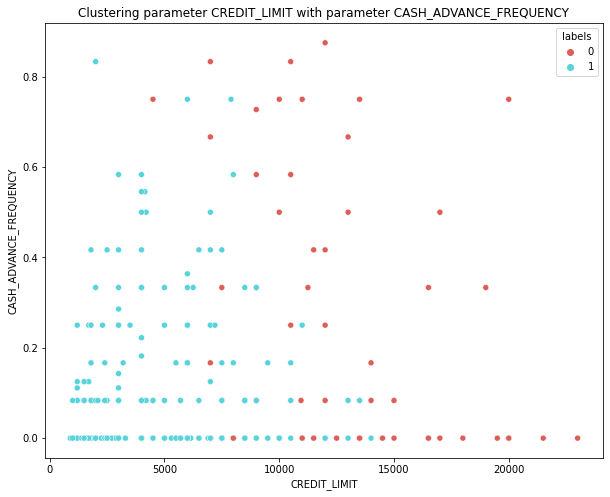

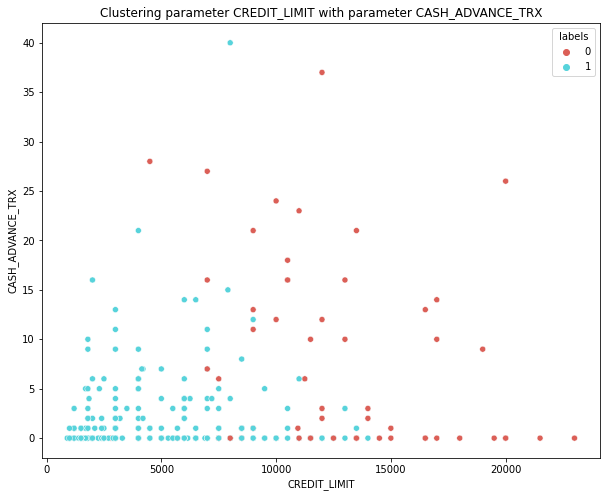

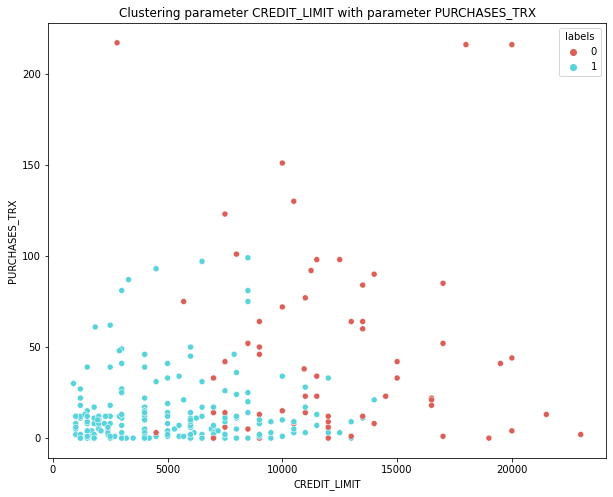

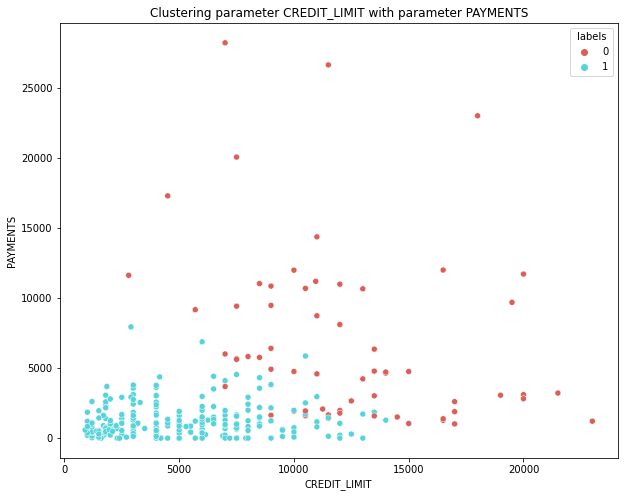

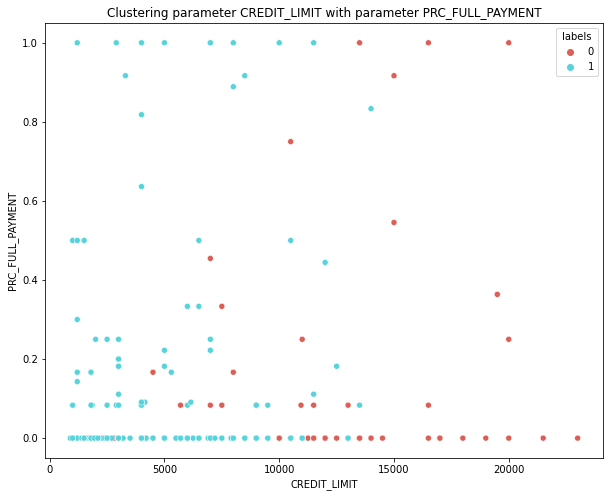

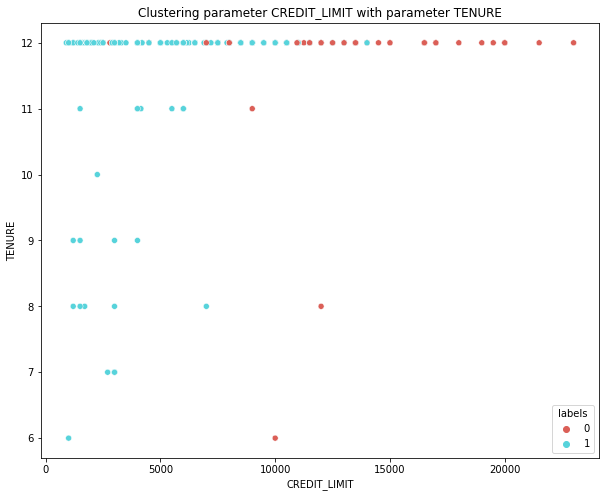

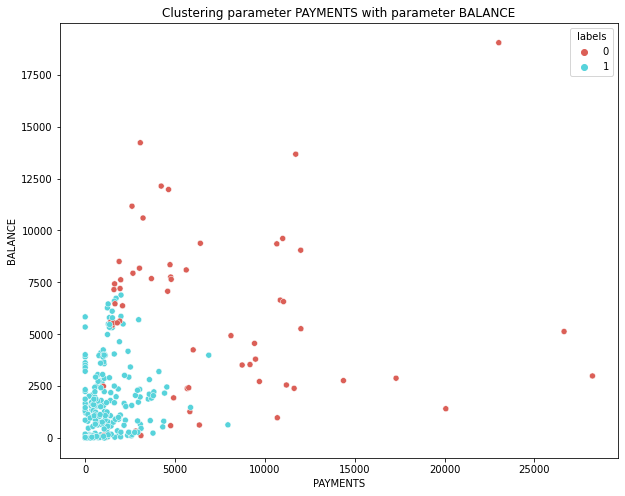

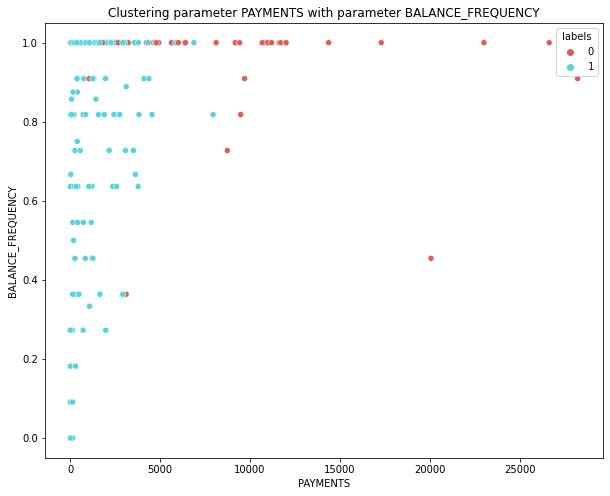

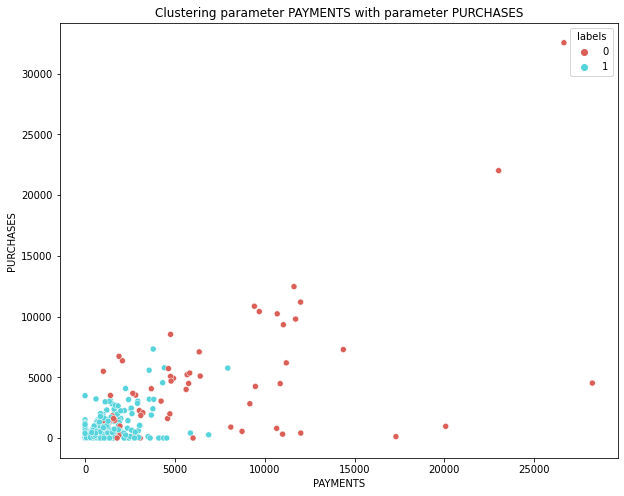

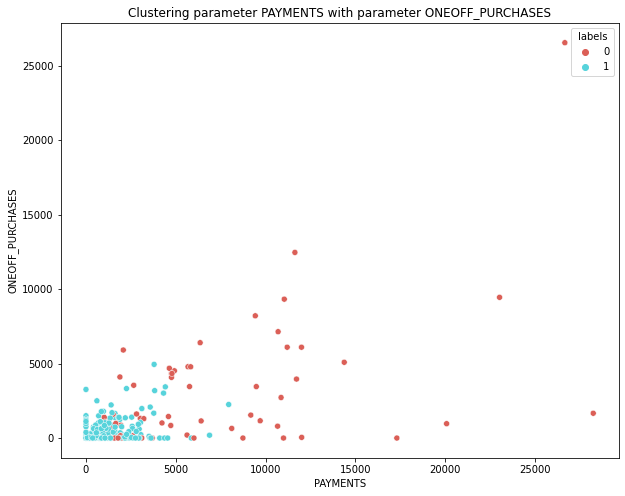

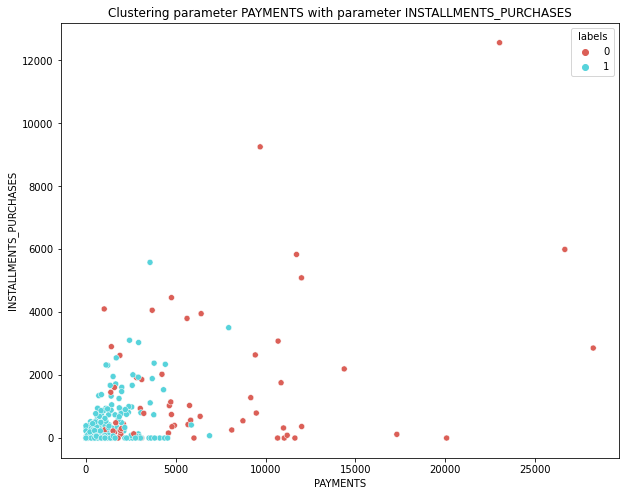

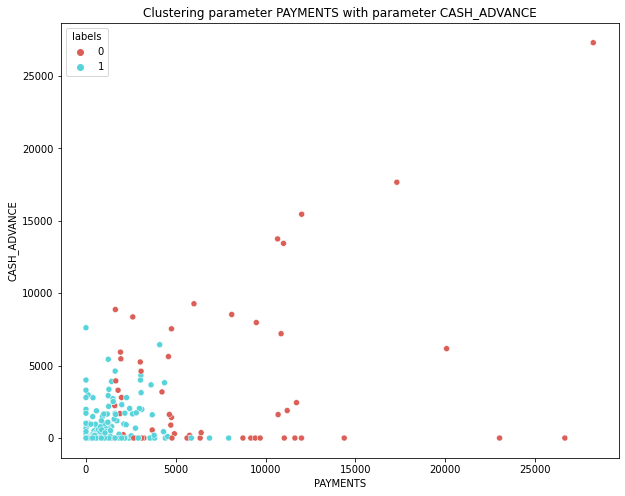

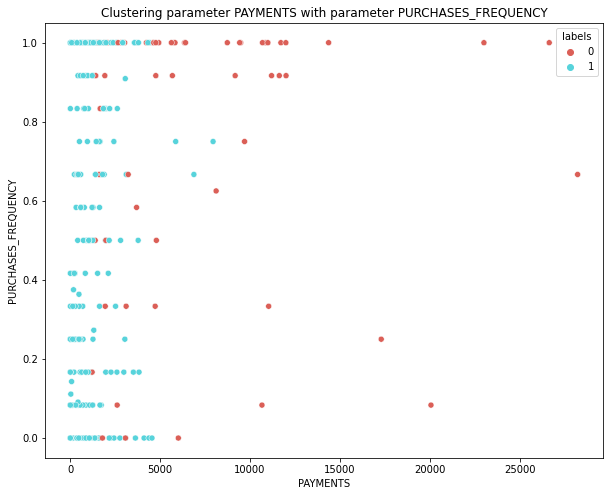

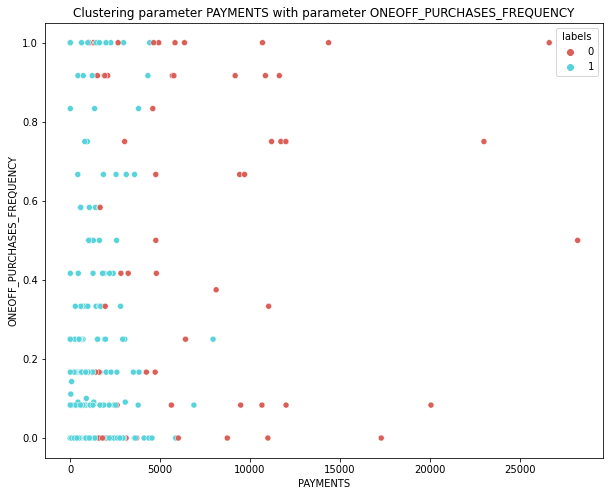

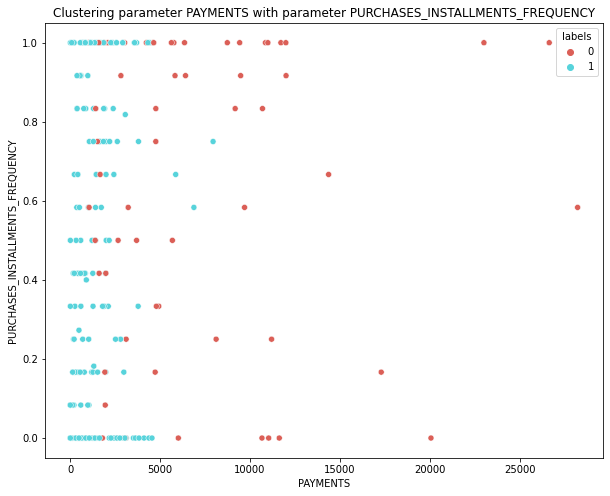

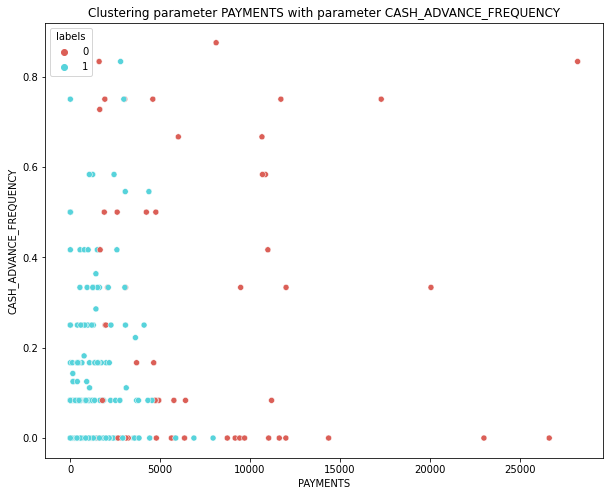

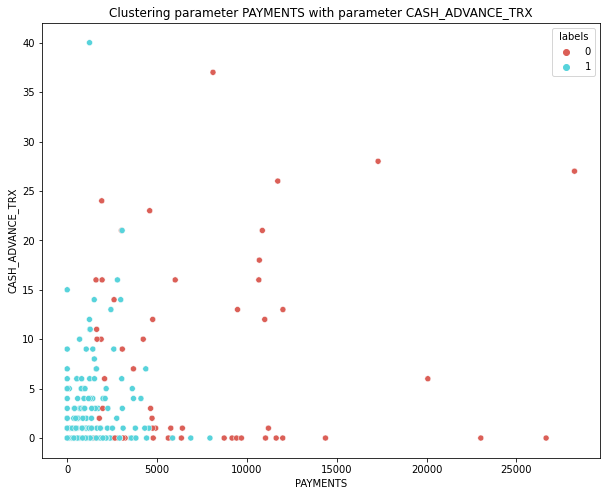

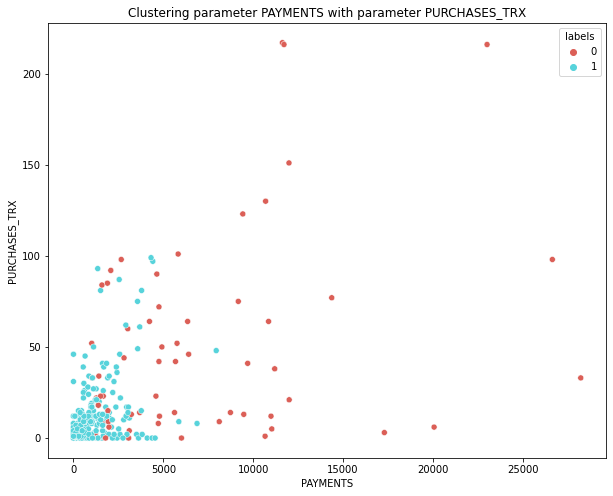

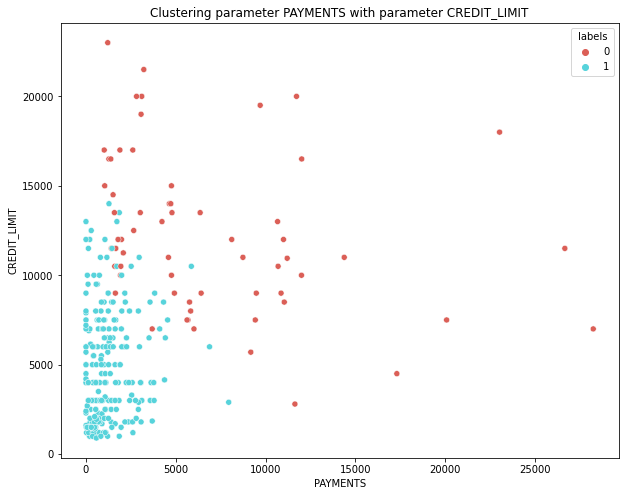

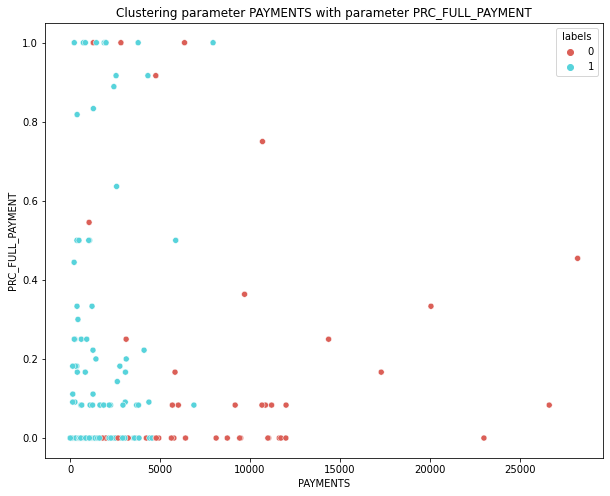

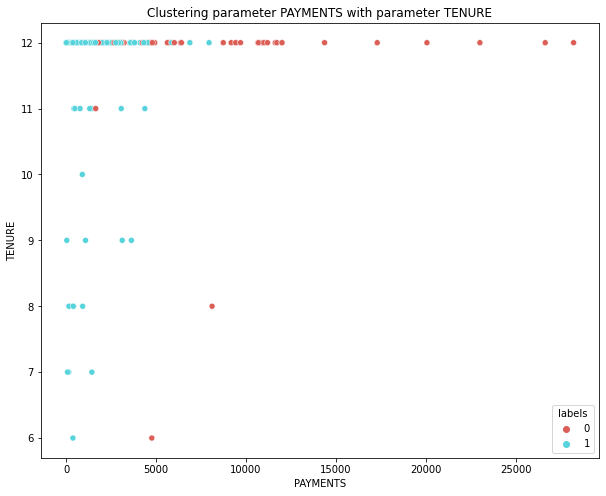

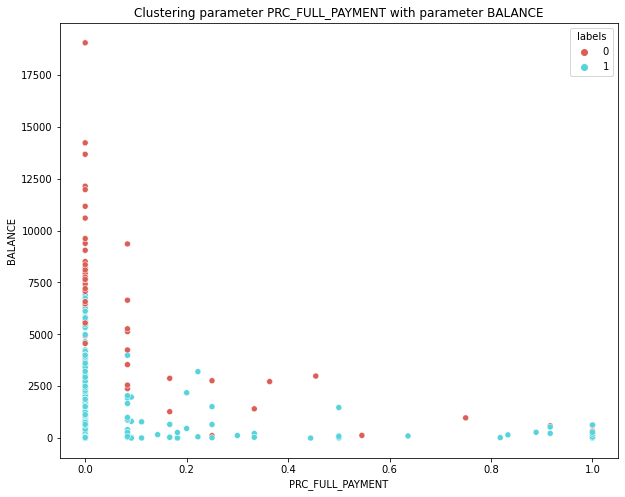

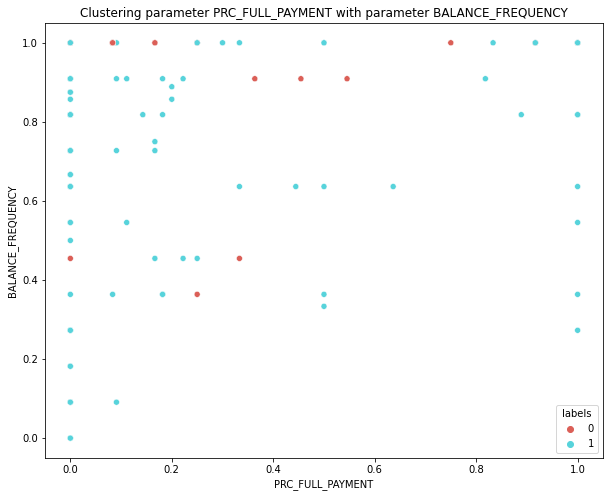

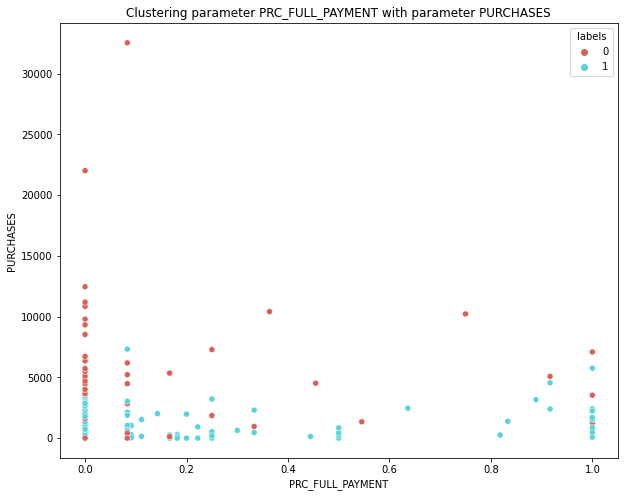

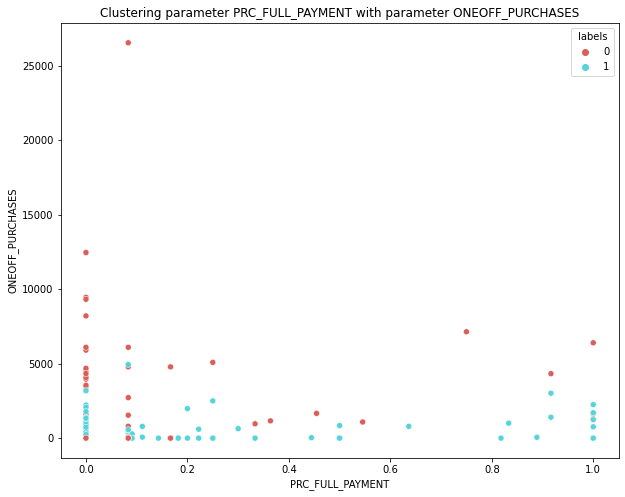

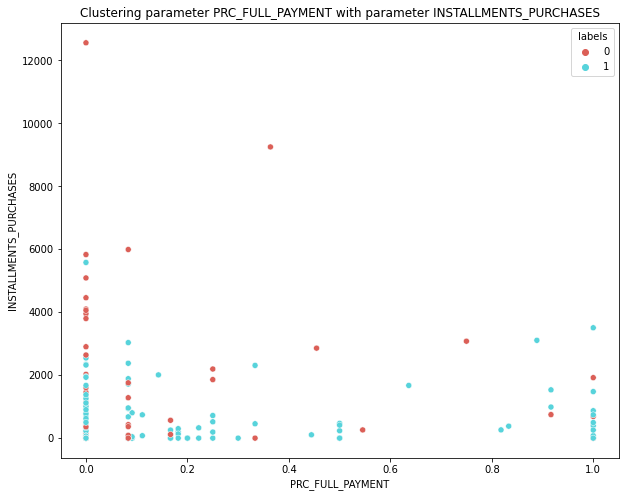

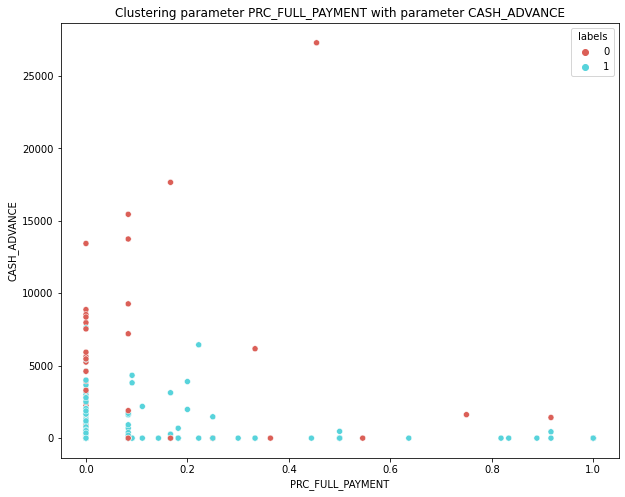

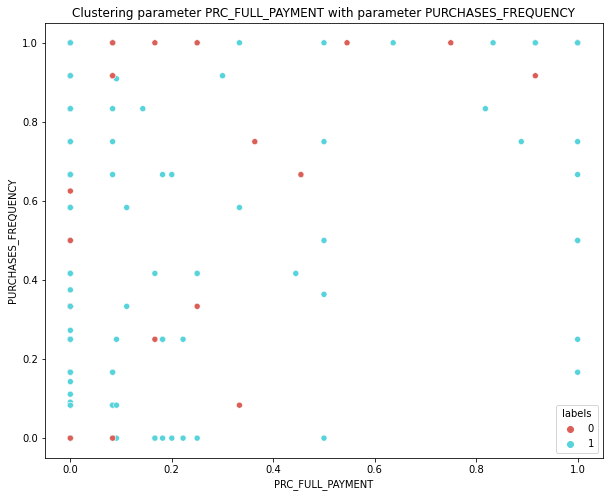

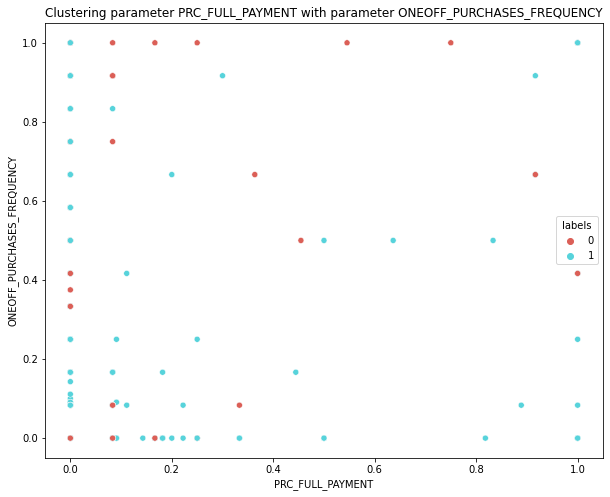

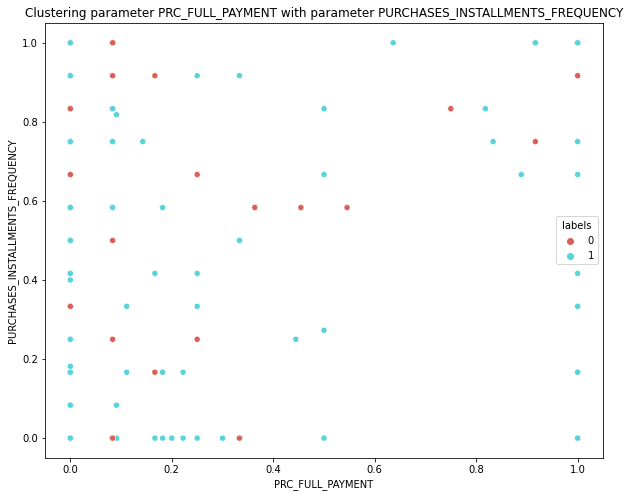

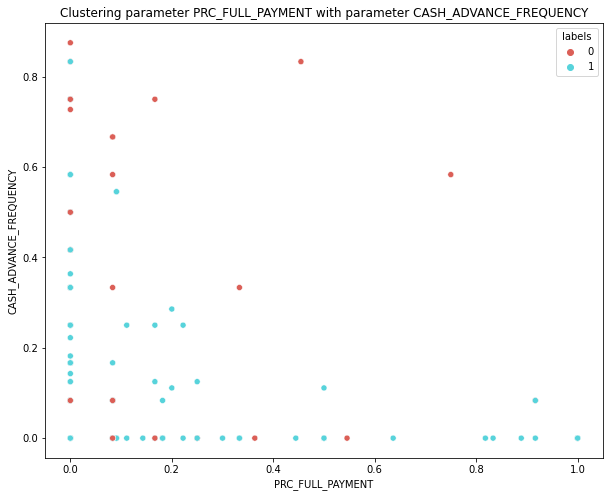

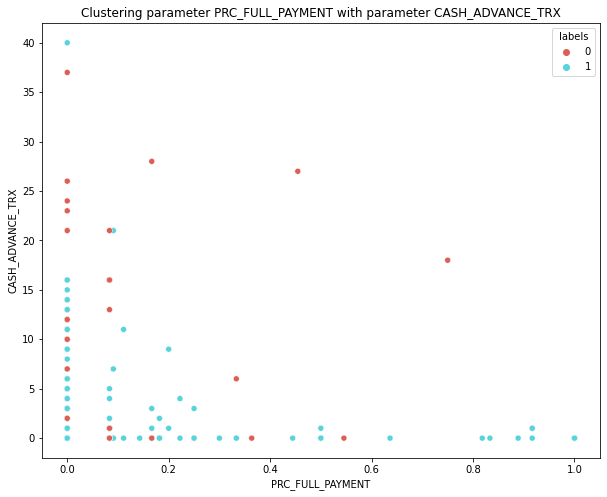

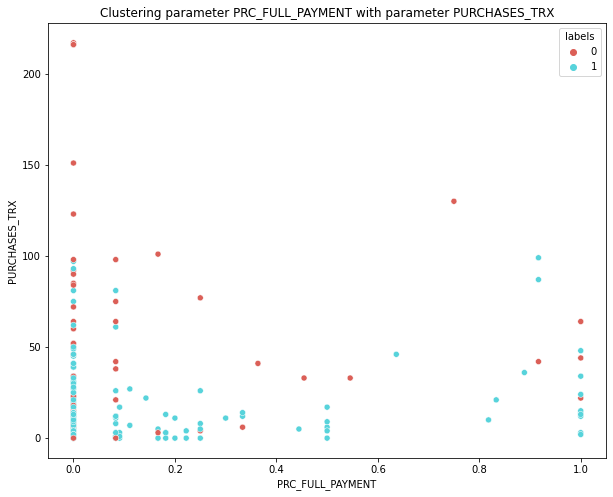

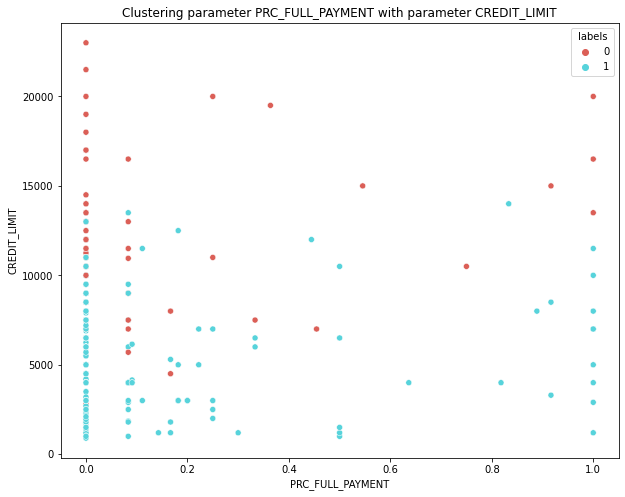

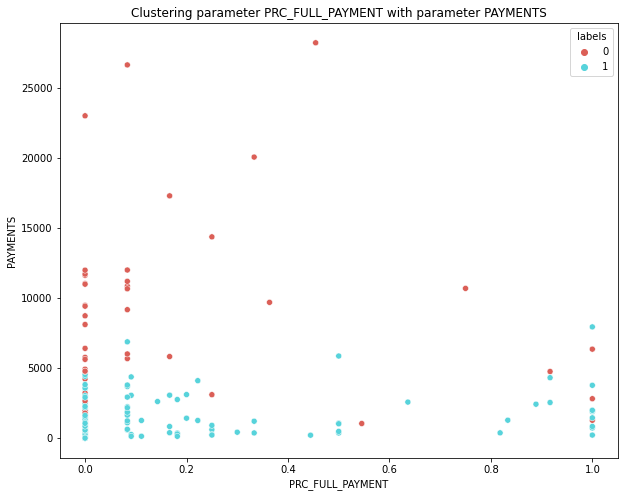

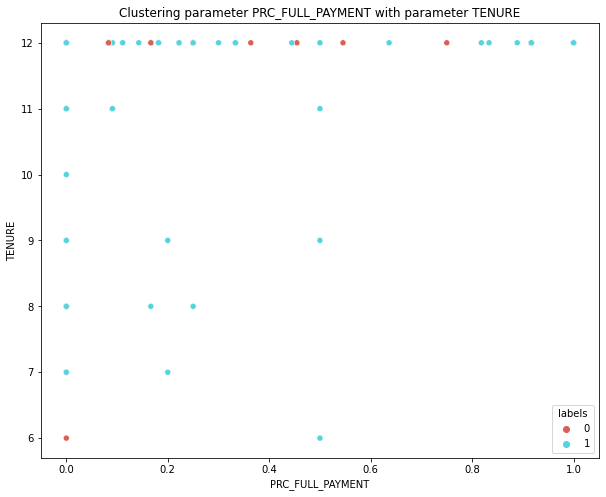

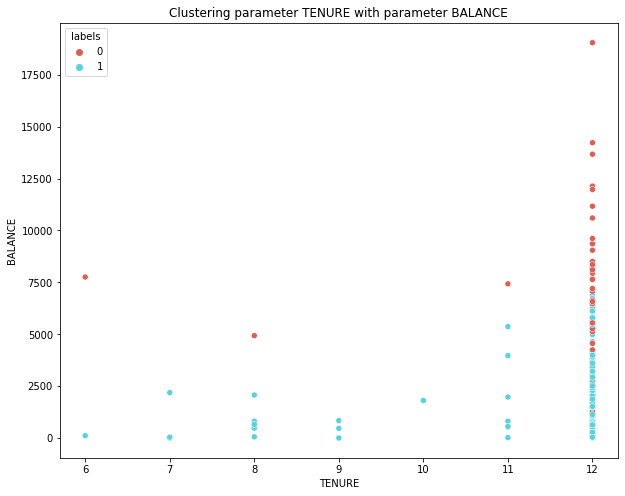

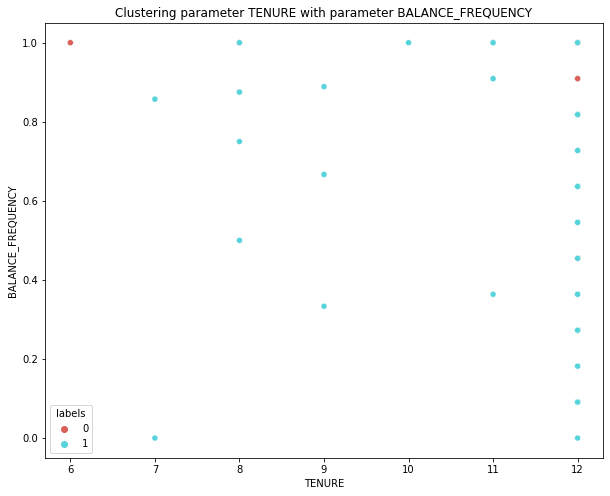

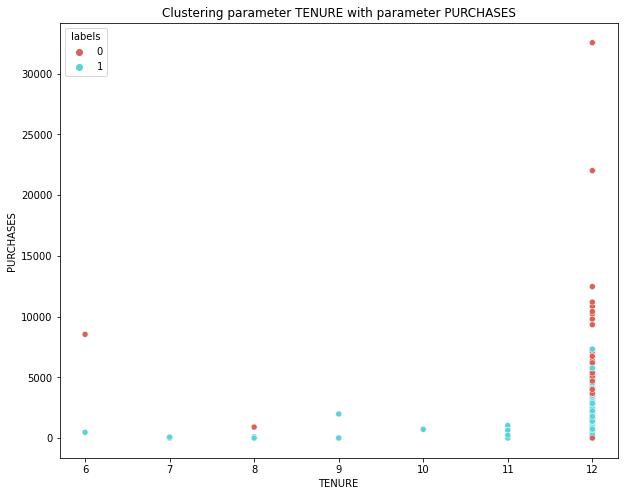

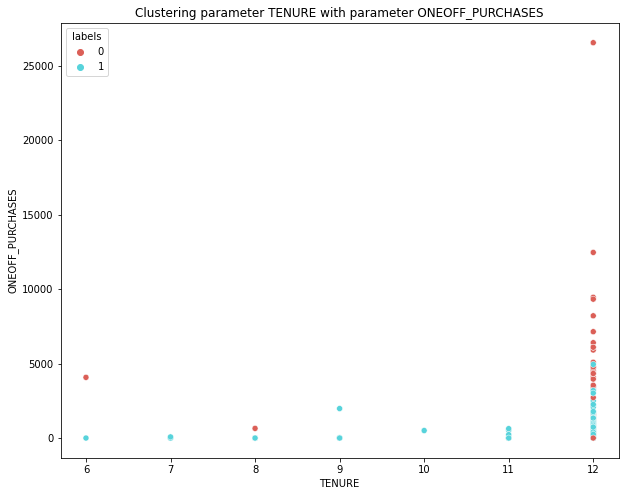

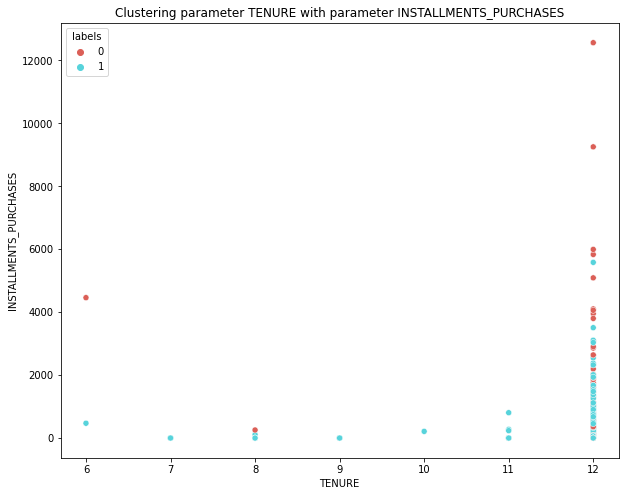

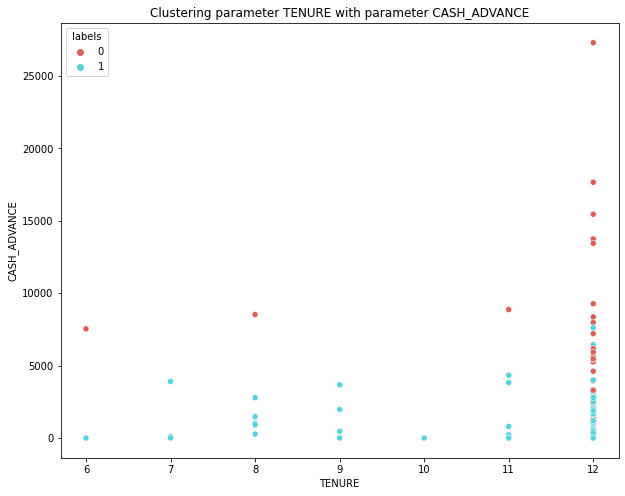

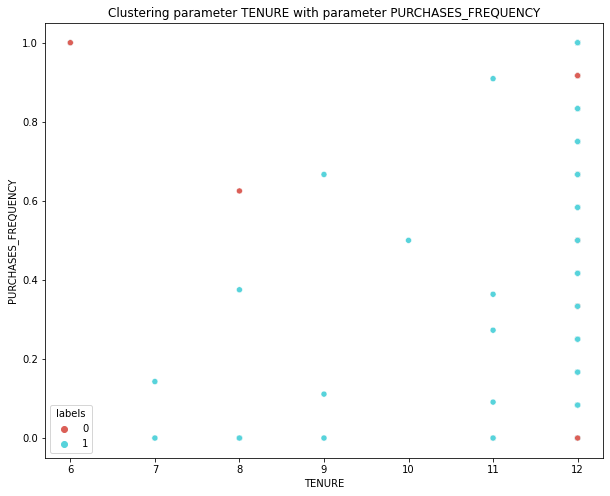

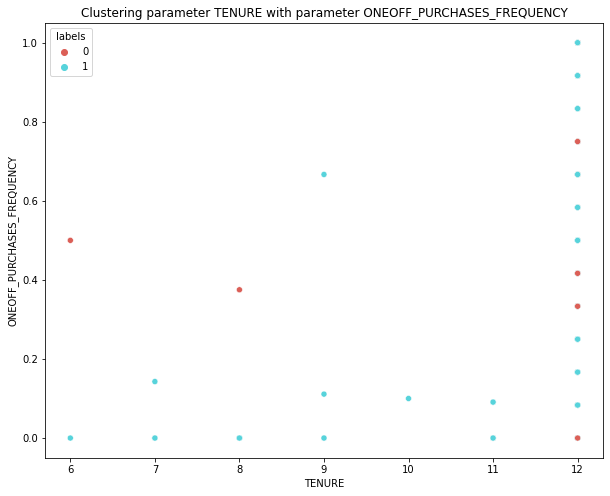

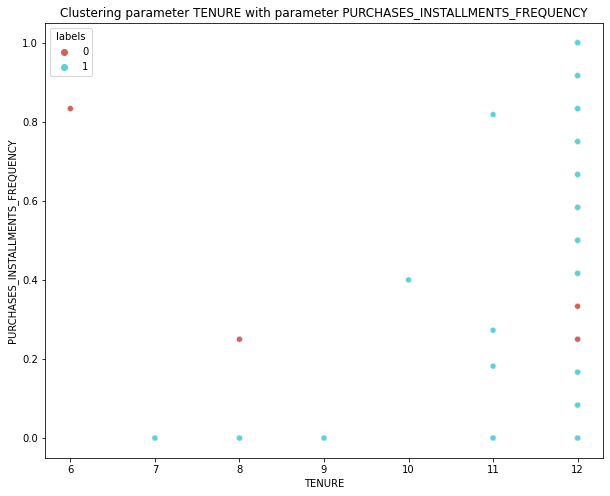

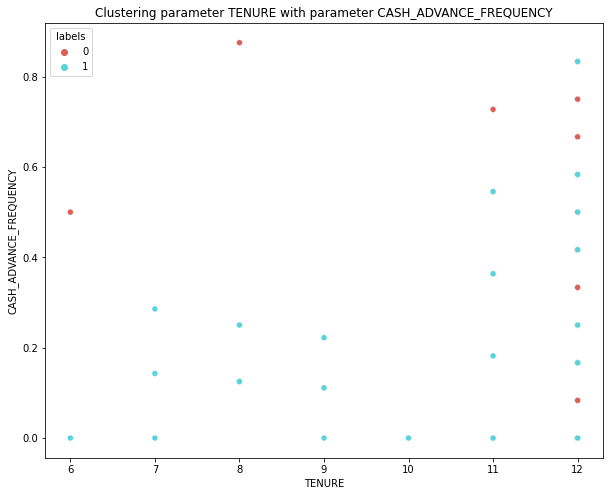

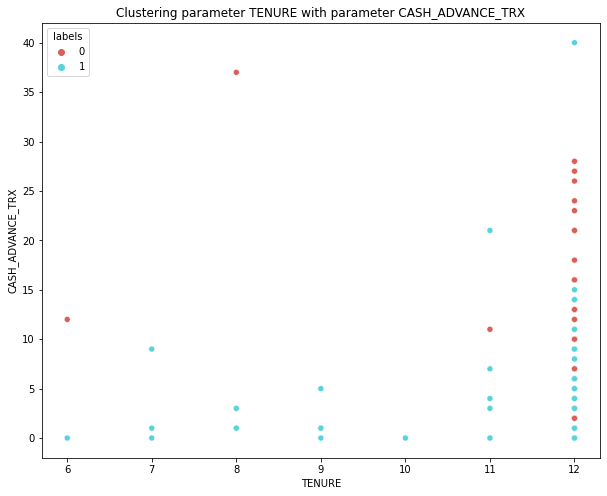

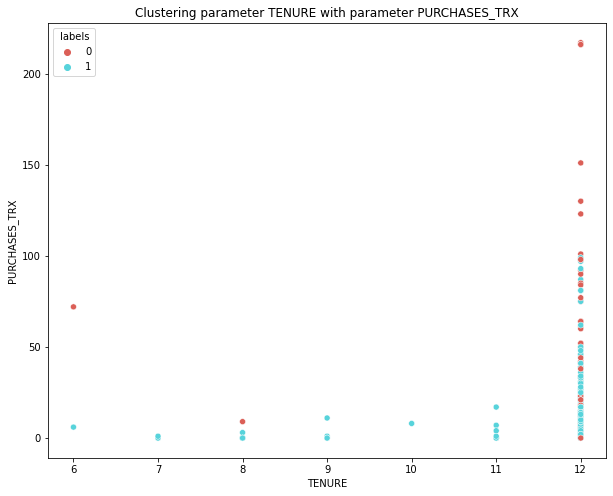

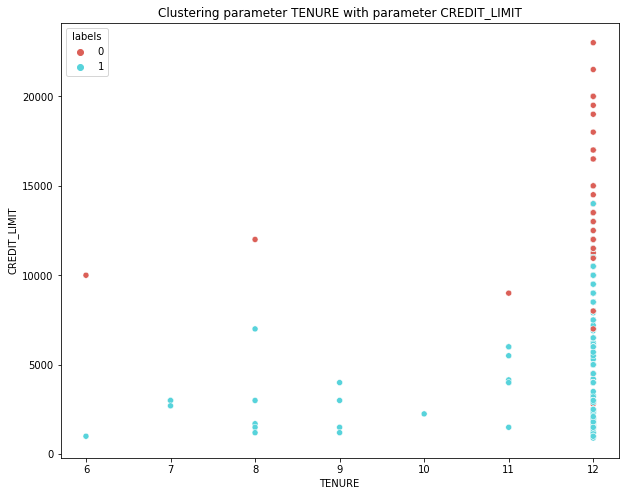

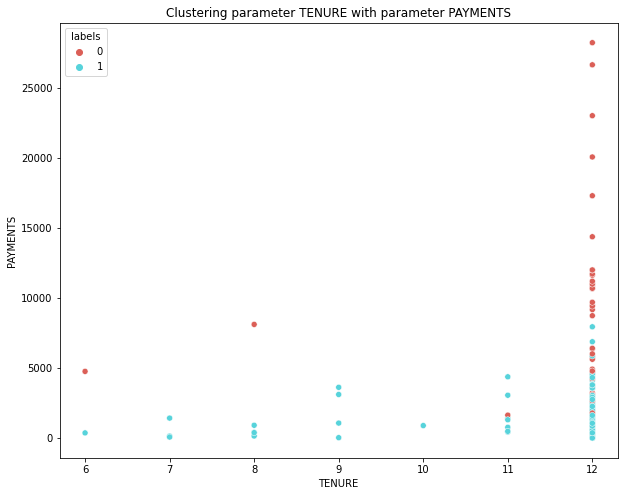

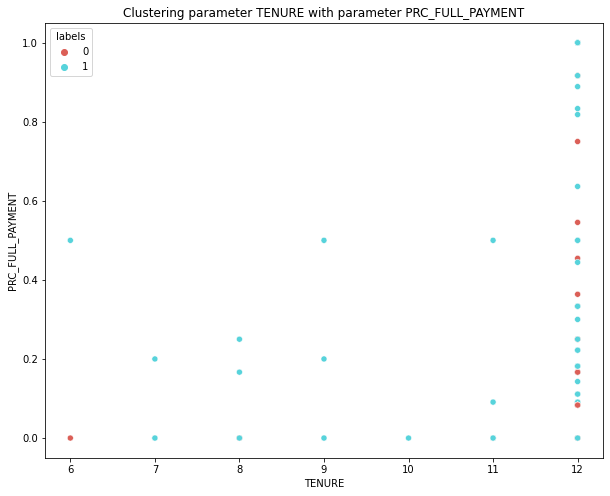

In [ ]:
for i in list_column:
    for j in list_column:
        if i == j:
            continue
        plt.figure(figsize = (10,8))
        sns.scatterplot(x=data[i],y=data[j],hue=after_segmentation["labels"], palette = sns.color_palette("hls",2))
        plt.title('Clustering parameter {} with parameter {}'.format(i,j))